# Функция для визуализации кривых роста опухоли CT26 с обозначением данных мыши, используемой для обучения модели, а также среднего±<i>SD</i> во всей группе (Рисунок 2.4.5.2 А, Б, В, Г, Д и Рисунок 2.4.5.3 А, Б, В, Г, Д)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Optional, Union, Any
import string

def plot_tumor_growth_comparison_grid(
    excel_path: Union[str, List[str]],
    exp_sheet_names: Optional[List[str]] = None,
    sim_sheets: Optional[List[str]] = None,  # NEW: Simulation sheets
    sim_sheet_x_col: Optional[str] = None,  # NEW: X column for simulation data
    sim_sheet_y_col: Optional[str] = None,  # NEW: Y column for simulation data
    Titles: Optional[List[str]] = None,
    xlabels: Optional[List[str]] = None,
    ylabels: Optional[List[str]] = None,
    highlight_mouse_ids: Optional[List[Any]] = None,
    show_mouse_id_flags: Optional[List[bool]] = None,
    line_indicators: Optional[List[List[Optional[str]]]] = None,
    line_indicator_offset_x: Optional[List[List[Optional[float]]]] = None,
    line_indicator_offset_y: Optional[List[List[Optional[float]]]] = None,
    line_indicator_fontsize: Union[int, List[int], List[List[int]]] = 9,
    langs: Optional[List[str]] = None,
    legend_fontsize: int = 12,
    xlabel_fontsize: Union[int, List[int]] = 12,
    ylabel_fontsize: Union[int, List[int]] = 12,
    title_fontsize: Union[int, List[int]] = 14,
    ymaxs: Optional[List[Optional[float]]] = None,
    ymins: Optional[List[Optional[float]]] = None,
    xmaxs: Optional[List[Optional[float]]] = None,
    xmins: Optional[List[Optional[float]]] = None,
    n_cols: int = 2,
    figsize_per_plot: tuple = (6, 4),
    sharex: bool = False,
    sharey: bool = False,
    constrained_layout: bool = True,
    subplot_signs: Optional[List[str]] = None,
    show_mean: Union[bool, List[bool]] = False,
    show_mean_corrected: Union[bool, List[bool]] = False,
    show_SD_on_mean_corrected: Union[bool, List[bool]] = False,
    subplot_signs_fontsize: int = 16,
    force_show_zero_on_x: bool = False,
    validation_mouse_lines: Optional[Union[str, List[str]]] = None,
    legend_type: str = 'every'  # NEW PARAMETER
):
    """
    Creates a grid of plots comparing experimental tumor growth data with optional simulation data.
    
    Parameters:
    -----------
    excel_path : str or List[str]
        Path(s) to Excel file(s) containing experimental and simulation data.
    exp_sheet_names : List[str], optional
        Sheet names for experimental data for each subplot.
    sim_sheets : List[str], optional
        Sheet names for simulation data for each subplot.
    sim_sheet_x_col : str, optional
        Name of the column containing x-values (e.g., time) for simulation data.
    sim_sheet_y_col : str, optional
        Name of the column containing y-values (e.g., tumor volume) for simulation data.
    Titles : List[str], optional
        Titles for each subplot.
    xlabels : List[str], optional
        X-axis labels for each subplot.
    ylabels : List[str], optional
        Y-axis labels for each subplot.
    highlight_mouse_ids : List[Any], optional
        IDs of mice to highlight with special colors in each subplot.
    show_mouse_id_flags : List[bool], optional
        Whether to show mouse IDs on the plot for each subplot.
    line_indicators : List[List[str]], optional
        Text indicators to display at the end of each mouse's line.
    line_indicator_offset_x : List[List[float]], optional
        X-offsets for line indicators for each mouse in each subplot.
    line_indicator_offset_y : List[List[float]], optional
        Y-offsets for line indicators for each mouse in each subplot.
    line_indicator_fontsize : int, List[int], or List[List[int]], optional
        Font size for line indicator labels.
    langs : List[str], optional
        Language codes for legend labels ('en' or 'ru') for each subplot.
    legend_fontsize : int, optional
        Font size for legend text.
    xlabel_fontsize : int or List[int], optional
        Font size for x-axis labels.
    ylabel_fontsize : int or List[int], optional
        Font size for y-axis labels.
    title_fontsize : int or List[int], optional
        Font size for plot titles.
    ymaxs : List[float], optional
        Maximum y-axis limits for each subplot.
    ymins : List[float], optional
        Minimum y-axis limits for each subplot.
    xmaxs : List[float], optional
        Maximum x-axis limits for each subplot.
    xmins : List[float], optional
        Minimum x-axis limits for each subplot.
    n_cols : int, optional
        Number of columns in the subplot grid.
    figsize_per_plot : tuple, optional
        Figure size per individual subplot (width, height).
    sharex : bool, optional
        Whether to share x-axis across subplots.
    sharey : bool, optional
        Whether to share y-axis across subplots.
    constrained_layout : bool, optional
        Whether to use constrained layout for better spacing.
    subplot_signs : List[str], optional
        Letters or symbols to label each subplot (e.g., ['A', 'B', 'C']).
    show_mean : bool or List[bool], optional
        Whether to show mean lines for each subplot.
    show_mean_corrected : bool or List[bool], optional
        Whether to show corrected mean lines (with last observation carried forward).
    show_SD_on_mean_corrected : bool or List[bool], optional
        Whether to show standard deviation error bars on corrected mean lines.
    subplot_signs_fontsize : int, optional
        Font size for subplot sign labels.
    force_show_zero_on_x : bool, optional
        Whether to force 0 to be visible on the x-axis even if data starts later.
    validation_mouse_lines : str or List[str], optional
        Color(s) for validation mouse lines in each subplot.
        If str, single color for all subplots. If List[str], colors per subplot.
        Default is 'b' (blue).
    legend_type : str, optional
        Controls where the legend is displayed:
        - 'every': Legend appears on each subplot (default).
        - 'one': A single shared legend is placed below the entire figure.
    
    Returns:
    --------
    matplotlib.figure.Figure
        The generated figure with multiple subplots.
    """
    
    if legend_type not in ('every', 'one'):
        raise ValueError("legend_type must be either 'every' or 'one'")
    
    # Determine the number of plots based on input parameters
    n_plots = 0
    if exp_sheet_names is not None:
        n_plots = max(n_plots, len(exp_sheet_names))
    if sim_sheets is not None:
        n_plots = max(n_plots, len(sim_sheets))
    if Titles is not None:
        n_plots = max(n_plots, len(Titles))
    
    if n_plots == 0:
        raise ValueError("No data specified for plotting")
    
    # Prepare simulation sheets parameter
    if sim_sheets is None:
        sim_sheets_list = [None] * n_plots
    elif len(sim_sheets) < n_plots:
        sim_sheets_list = sim_sheets + [None] * (n_plots - len(sim_sheets))
    else:
        sim_sheets_list = sim_sheets[:n_plots]
    
    # Prepare validation mouse colors parameter
    if validation_mouse_lines is None:
        validation_mouse_colors = ['b'] * n_plots
    elif isinstance(validation_mouse_lines, str):
        validation_mouse_colors = [validation_mouse_lines] * n_plots
    elif isinstance(validation_mouse_lines, list):
        if len(validation_mouse_lines) < n_plots:
            if len(validation_mouse_lines) > 0:
                last_color = validation_mouse_lines[-1]
                validation_mouse_colors = validation_mouse_lines + [last_color] * (n_plots - len(validation_mouse_lines))
            else:
                validation_mouse_colors = ['b'] * n_plots
        else:
            validation_mouse_colors = validation_mouse_lines[:n_plots]
    else:
        validation_mouse_colors = ['b'] * n_plots
    
    # Prepare line_indicator_fontsize parameter
    line_indicator_fontsizes = []
    
    if isinstance(line_indicator_fontsize, int):
        line_indicator_fontsizes = [[line_indicator_fontsize]] * n_plots
    elif isinstance(line_indicator_fontsize, list):
        if len(line_indicator_fontsize) >= n_plots:
            if all(isinstance(item, int) for item in line_indicator_fontsize):
                line_indicator_fontsizes = [[fs] for fs in line_indicator_fontsize[:n_plots]]
            elif all(isinstance(item, list) for item in line_indicator_fontsize):
                line_indicator_fontsizes = line_indicator_fontsize[:n_plots]
            else:
                line_indicator_fontsizes = []
                for item in line_indicator_fontsize[:n_plots]:
                    if isinstance(item, int):
                        line_indicator_fontsizes.append([item])
                    elif isinstance(item, list):
                        line_indicator_fontsizes.append(item)
                    else:
                        line_indicator_fontsizes.append([9])
        else:
            if line_indicator_fontsize and isinstance(line_indicator_fontsize[0], list):
                line_indicator_fontsizes = line_indicator_fontsize + [[9]] * (n_plots - len(line_indicator_fontsize))
            else:
                line_indicator_fontsizes = [[fs] if isinstance(fs, int) else [9] for fs in line_indicator_fontsize]
                line_indicator_fontsizes += [[9]] * (n_plots - len(line_indicator_fontsize))
    else:
        line_indicator_fontsizes = [[9]] * n_plots
    
    # Prepare line_indicator_offset_x parameter
    if line_indicator_offset_x is None:
        line_indicator_offsets_x = [None] * n_plots
    elif len(line_indicator_offset_x) < n_plots:
        line_indicator_offsets_x = line_indicator_offset_x + [None] * (n_plots - len(line_indicator_offset_x))
    else:
        line_indicator_offsets_x = line_indicator_offset_x[:n_plots]
    
    # Prepare line_indicator_offset_y parameter
    if line_indicator_offset_y is None:
        line_indicator_offsets_y = [None] * n_plots
    elif len(line_indicator_offset_y) < n_plots:
        line_indicator_offsets_y = line_indicator_offset_y + [None] * (n_plots - len(line_indicator_offset_y))
    else:
        line_indicator_offsets_y = line_indicator_offset_y[:n_plots]
    
    # Prepare subplot signs (letters A, B, C, etc.)
    if subplot_signs is None:
        subplot_signs = list(string.ascii_uppercase[:n_plots])
    elif len(subplot_signs) < n_plots:
        existing_signs = subplot_signs.copy()
        if existing_signs:
            last_char = existing_signs[-1]
            if last_char in string.ascii_uppercase:
                start_idx = string.ascii_uppercase.index(last_char) + 1
            else:
                start_idx = 0
        else:
            start_idx = 0
        
        additional_signs = list(string.ascii_uppercase[start_idx:start_idx + (n_plots - len(existing_signs))])
        subplot_signs = existing_signs + additional_signs
    elif len(subplot_signs) > n_plots:
        subplot_signs = subplot_signs[:n_plots]
    
    # Prepare show_mean parameter
    if isinstance(show_mean, bool):
        show_mean_flags = [show_mean] * n_plots
    elif isinstance(show_mean, list):
        if len(show_mean) < n_plots:
            show_mean_flags = show_mean + [False] * (n_plots - len(show_mean))
        else:
            show_mean_flags = show_mean[:n_plots]
    else:
        show_mean_flags = [False] * n_plots
    
    # Prepare show_mean_corrected parameter
    if isinstance(show_mean_corrected, bool):
        show_mean_corrected_flags = [show_mean_corrected] * n_plots
    elif isinstance(show_mean_corrected, list):
        if len(show_mean_corrected) < n_plots:
            show_mean_corrected_flags = show_mean_corrected + [False] * (n_plots - len(show_mean_corrected))
        else:
            show_mean_corrected_flags = show_mean_corrected[:n_plots]
    else:
        show_mean_corrected_flags = [False] * n_plots
    
    # Prepare show_SD_on_mean_corrected parameter
    if isinstance(show_SD_on_mean_corrected, bool):
        show_SD_on_mean_corrected_flags = [show_SD_on_mean_corrected] * n_plots
    elif isinstance(show_SD_on_mean_corrected, list):
        if len(show_SD_on_mean_corrected) < n_plots:
            show_SD_on_mean_corrected_flags = show_SD_on_mean_corrected + [False] * (n_plots - len(show_SD_on_mean_corrected))
        else:
            show_SD_on_mean_corrected_flags = show_SD_on_mean_corrected[:n_plots]
    else:
        show_SD_on_mean_corrected_flags = [False] * n_plots
    
    # Validate dependency: SD can only be shown if mean_corrected is shown
    for i in range(n_plots):
        if show_SD_on_mean_corrected_flags[i] and not show_mean_corrected_flags[i]:
            print(f"Warning: show_SD_on_mean_corrected=True for plot {i+1}, but show_mean_corrected=False. SD will not be displayed.")
            show_SD_on_mean_corrected_flags[i] = False
    
    # Prepare lists of parameters for each plot
    excel_paths = excel_path if isinstance(excel_path, list) else [excel_path] * n_plots
    
    # Use provided values or defaults
    exp_sheet_names = exp_sheet_names or [None] * n_plots
    Titles = Titles or [f"Tumor Growth Comparison {i+1}" for i in range(n_plots)]
    xlabels = xlabels or ["Days after tumor inoculation"] * n_plots
    ylabels = ylabels or ["Tumor volume, mm³"] * n_plots
    highlight_mouse_ids = highlight_mouse_ids or [None] * n_plots
    show_mouse_id_flags = show_mouse_id_flags or [False] * n_plots
    langs = langs or ["en"] * n_plots
    ymaxs = ymaxs or [None] * n_plots
    ymins = ymins or [None] * n_plots
    xmaxs = xmaxs or [None] * n_plots
    xmins = xmins or [None] * n_plots
    
    # Calculate number of rows and columns for subplot grid
    n_rows = (n_plots + n_cols - 1) // n_cols
    total_width = figsize_per_plot[0] * n_cols
    total_height = figsize_per_plot[1] * n_rows
    
    # Create the subplot grid
    fig, axes = plt.subplots(n_rows, n_cols, 
                             figsize=(total_width, total_height),
                             sharex=sharex, 
                             sharey=sharey,
                             squeeze=False,
                             constrained_layout=constrained_layout)
    
    axes_flat = axes.flatten()
    
    # Prepare xlabel_fontsize parameter
    if isinstance(xlabel_fontsize, int):
        xlabel_fontsizes = [xlabel_fontsize] * n_plots
    elif isinstance(xlabel_fontsize, list):
        if len(xlabel_fontsize) < n_plots:
            xlabel_fontsizes = xlabel_fontsize + [12] * (n_plots - len(xlabel_fontsize))
        else:
            xlabel_fontsizes = xlabel_fontsize[:n_plots]
    else:
        xlabel_fontsizes = [12] * n_plots
    
    # Prepare ylabel_fontsize parameter
    if isinstance(ylabel_fontsize, int):
        ylabel_fontsizes = [ylabel_fontsize] * n_plots
    elif isinstance(ylabel_fontsize, list):
        if len(ylabel_fontsize) < n_plots:
            ylabel_fontsizes = ylabel_fontsize + [12] * (n_plots - len(ylabel_fontsize))
        else:
            ylabel_fontsizes = ylabel_fontsize[:n_plots]
    else:
        ylabel_fontsizes = [12] * n_plots
    
    # Prepare title_fontsize parameter
    if isinstance(title_fontsize, int):
        title_fontsizes = [title_fontsize] * n_plots
    elif isinstance(title_fontsize, list):
        if len(title_fontsize) < n_plots:
            title_fontsizes = title_fontsize + [14] * (n_plots - len(title_fontsize))
        else:
            title_fontsizes = title_fontsize[:n_plots]
    else:
        title_fontsizes = [14] * n_plots
    
    # Prepare line_indicators parameter
    if line_indicators is None:
        line_indicators = [None] * n_plots
    elif len(line_indicators) < n_plots:
        line_indicators = line_indicators + [None] * (n_plots - len(line_indicators))
    
    # Collect global legend handles/labels if legend_type == 'one'
    global_legend_handles = []
    global_legend_labels = []
    global_lang = langs[0] if langs else "en"  # fallback language
    
    # Create each subplot
    for idx in range(n_plots):
        ax = axes_flat[idx]
        
        try:
            # Load experimental and simulation data
            exp_df = None
            sim_df = None
            
            # Experimental data
            if exp_sheet_names[idx] is not None:
                try:
                    exp_df = pd.read_excel(excel_paths[idx], sheet_name=exp_sheet_names[idx])
                except Exception as e:
                    print(f"Error loading experimental data for plot {idx+1}: {e}")
                    exp_df = None
            
            # Simulation data (NEW)
            if sim_sheets_list[idx] is not None and sim_sheet_x_col is not None and sim_sheet_y_col is not None:
                try:
                    sim_df = pd.read_excel(excel_paths[idx], sheet_name=sim_sheets_list[idx])
                except Exception as e:
                    print(f"Error loading simulation data for plot {idx+1}: {e}")
                    sim_df = None
            
            has_normal_mouse = False
            has_highlighted_mouse = False
            has_simulation = False  # NEW: Flag for simulation data
            mean_line = None
            mean_corrected_auto_line = None
            sd_errorbars = None
            all_x_values = []
            all_y_values = []
            
            validation_color = validation_mouse_colors[idx]
            
            all_mouse_data_raw = []
            all_mouse_data_complete = []
            
            # Plot simulation data if available (NEW)
            if sim_df is not None and len(sim_df) > 0:
                if sim_sheet_x_col in sim_df.columns and sim_sheet_y_col in sim_df.columns:
                    # Clean simulation data
                    sim_df_clean = sim_df.dropna(subset=[sim_sheet_x_col, sim_sheet_y_col])
                    if len(sim_df_clean) > 0:
                        # Plot simulation line
                        ax.plot(sim_df_clean[sim_sheet_x_col], sim_df_clean[sim_sheet_y_col], 
                                color='red', linewidth=2.5, linestyle='--', alpha=0.8)
                        has_simulation = True
                        
                        # Add simulation data to all_x_values and all_y_values for axis limits
                        all_x_values.extend(sim_df_clean[sim_sheet_x_col].tolist())
                        all_y_values.extend(sim_df_clean[sim_sheet_y_col].tolist())
                else:
                    print(f"Warning: Simulation columns '{sim_sheet_x_col}' or '{sim_sheet_y_col}' not found in sheet '{sim_sheets_list[idx]}' for plot {idx+1}")
            
            # Plot experimental data
            if exp_df is not None and len(exp_df) > 0:
                days = exp_df.columns[1:]  # Assume first column is mouse IDs
                
                # Determine last day with at least one data point
                last_day_with_data = None
                for day_idx, day in enumerate(days):
                    column_data = exp_df.iloc[:, day_idx + 1]
                    if not column_data.isna().all():
                        last_day_with_data = day
                
                current_indicators = line_indicators[idx] if idx < len(line_indicators) else None
                current_offsets_x = line_indicator_offsets_x[idx] if idx < len(line_indicator_offsets_x) else None
                current_offsets_y = line_indicator_offsets_y[idx] if idx < len(line_indicator_offsets_y) else None
                
                for mouse_idx in range(len(exp_df)):
                    mouse_id = exp_df.iloc[mouse_idx, 0]
                    tumor_sizes = exp_df.iloc[mouse_idx, 1:].values
                    
                    try:
                        float(mouse_id)
                        is_digit = True
                    except (ValueError, TypeError):
                        is_digit = False
                    
                    if not is_digit:
                        continue
                    
                    mouse_data_raw = {}
                    for day_idx, (day, size) in enumerate(zip(days, tumor_sizes)):
                        if not pd.isna(size):
                            mouse_data_raw[day] = size
                    all_mouse_data_raw.append(mouse_data_raw)
                    
                    if show_mean_corrected_flags[idx]:
                        mouse_data_complete = {}
                        last_valid_value = None
                        for day_idx, (day, size) in enumerate(zip(days, tumor_sizes)):
                            if day == last_day_with_data:
                                if not pd.isna(size):
                                    mouse_data_complete[day] = size
                                    last_valid_value = size
                                elif last_valid_value is not None:
                                    mouse_data_complete[day] = last_valid_value
                                else:
                                    mouse_data_complete[day] = np.nan
                                break
                            
                            if not pd.isna(size):
                                mouse_data_complete[day] = size
                                last_valid_value = size
                            elif last_valid_value is not None:
                                mouse_data_complete[day] = last_valid_value
                            else:
                                mouse_data_complete[day] = np.nan
                        
                        all_mouse_data_complete.append(mouse_data_complete)
                    
                    valid_days = []
                    valid_sizes = []
                    
                    for day_idx, size in enumerate(tumor_sizes):
                        if not pd.isna(size):
                            if last_day_with_data and days[day_idx] == last_day_with_data:
                                valid_days.append(days[day_idx])
                                valid_sizes.append(size)
                                all_x_values.append(days[day_idx])
                                all_y_values.append(size)
                                break
                            valid_days.append(days[day_idx])
                            valid_sizes.append(size)
                            all_x_values.append(days[day_idx])
                            all_y_values.append(size)
                    
                    if len(valid_days) == 0:
                        continue
                    
                    if highlight_mouse_ids[idx] is not None and mouse_id == highlight_mouse_ids[idx]:
                        color = validation_color
                        linewidth = 2
                        alpha = 1.0
                        has_highlighted_mouse = True
                    else:
                        color = 'k'
                        linewidth = 1
                        alpha = 0.7
                        has_normal_mouse = True
                    
                    ax.plot(valid_days, valid_sizes, color=color, linewidth=linewidth, alpha=alpha)
                    
                    if (current_indicators is not None and 
                        mouse_idx < len(current_indicators) and 
                        len(valid_days) > 0):
                        
                        indicator = current_indicators[mouse_idx]
                        
                        if (indicator is not None and 
                            not (isinstance(indicator, float) and np.isnan(indicator)) and
                            str(indicator).strip() != ''):
                            
                            last_day = valid_days[-1]
                            last_size = valid_sizes[-1]
                            
                            if (current_offsets_x is not None and 
                                mouse_idx < len(current_offsets_x)):
                                
                                offset_x = current_offsets_x[mouse_idx]
                                if (offset_x is not None and 
                                    not (isinstance(offset_x, float) and np.isnan(offset_x)) and
                                    isinstance(offset_x, (int, float))):
                                    text_x = last_day + offset_x
                                else:
                                    text_x = last_day
                            else:
                                text_x = last_day
                            
                            if (current_offsets_y is not None and 
                                mouse_idx < len(current_offsets_y)):
                                
                                offset_y = current_offsets_y[mouse_idx]
                                if (offset_y is not None and 
                                    not (isinstance(offset_y, float) and np.isnan(offset_y)) and
                                    isinstance(offset_y, (int, float))):
                                    text_y = last_size + offset_y
                                else:
                                    text_y = last_size
                            else:
                                text_y = last_size
                            
                            text_color = color
                            
                            current_fontsize = 9
                            if (line_indicator_fontsizes is not None and 
                                idx < len(line_indicator_fontsizes)):
                                
                                graph_fontsizes = line_indicator_fontsizes[idx]
                                if (mouse_idx < len(graph_fontsizes) and 
                                    graph_fontsizes[mouse_idx] is not None):
                                    current_fontsize = graph_fontsizes[mouse_idx]
                                elif len(graph_fontsizes) > 0:
                                    current_fontsize = graph_fontsizes[0]
                            
                            fontweight = 'bold' if highlight_mouse_ids[idx] is not None and mouse_id == highlight_mouse_ids[idx] else 'normal'
                            
                            ax.text(text_x, text_y, str(indicator),
                                   color=text_color,
                                   fontsize=current_fontsize,
                                   fontweight=fontweight,
                                   verticalalignment='center',
                                   horizontalalignment='left',
                                   alpha=alpha)
            
            # Automatically calculate and plot corrected mean line
            if show_mean_corrected_flags[idx] and all_mouse_data_complete and len(all_mouse_data_complete) > 1:
                all_days = []
                if last_day_with_data and exp_df is not None:
                    for day in exp_df.columns[1:]:
                        all_days.append(day)
                        if str(day) == str(last_day_with_data):
                            break
                
                if all_days:
                    mean_corrected_sizes = []
                    sd_values = []
                    valid_days_corrected = []
                    
                    for day in all_days:
                        sizes_for_day = []
                        for mouse_data in all_mouse_data_complete:
                            if day in mouse_data and not np.isnan(mouse_data[day]):
                                sizes_for_day.append(mouse_data[day])
                        
                        if sizes_for_day and len(sizes_for_day) > 1:
                            mean_size = np.nanmean(sizes_for_day)
                            sd_size = np.nanstd(sizes_for_day, ddof=1)
                            
                            mean_corrected_sizes.append(mean_size)
                            sd_values.append(sd_size)
                            valid_days_corrected.append(day)
                            all_x_values.append(day)
                            all_y_values.extend([mean_size - sd_size, mean_size + sd_size])
                        elif sizes_for_day:
                            mean_size = np.nanmean(sizes_for_day)
                            mean_corrected_sizes.append(mean_size)
                            sd_values.append(0)
                            valid_days_corrected.append(day)
                            all_x_values.append(day)
                            all_y_values.append(mean_size)
                    
                    if len(valid_days_corrected) > 0:
                        mean_corrected_auto_line = ax.plot(
                            valid_days_corrected, mean_corrected_sizes, 
                            color='purple', 
                            linewidth=3, 
                            linestyle='-',
                            marker='o',
                            markersize=6,
                            markerfacecolor='purple',
                            markeredgecolor='darkviolet',
                            markeredgewidth=1.5,
                            alpha=0.9,
                            zorder=11
                        )[0]
                        
                        if show_SD_on_mean_corrected_flags[idx] and sd_values:
                            days_numeric = [pd.to_numeric(day, errors='coerce') for day in valid_days_corrected]
                            mean_corrected_sizes_np = np.array(mean_corrected_sizes)
                            sd_values_np = np.array(sd_values)
                            
                            sd_errorbars = ax.errorbar(
                                days_numeric,
                                mean_corrected_sizes_np,
                                yerr=sd_values_np,
                                fmt='none',
                                ecolor='purple',
                                elinewidth=1.5,
                                capsize=4,
                                capthick=1.5,
                                alpha=0.7,
                                zorder=9
                            )
            
            ax.set_xlabel(xlabels[idx], fontsize=xlabel_fontsizes[idx])
            ax.set_ylabel(ylabels[idx], fontsize=ylabel_fontsizes[idx])
            ax.set_title(Titles[idx], fontsize=title_fontsizes[idx])
            ax.grid(True, alpha=0.3)
            
            # Combine x and y values from both experimental and simulation data
            if not all_x_values and sim_df is not None:
                # If no experimental data but simulation data exists
                if sim_sheet_x_col in sim_df.columns and sim_sheet_y_col in sim_df.columns:
                    all_x_values = sim_df[sim_sheet_x_col].dropna().tolist()
                    all_y_values = sim_df[sim_sheet_y_col].dropna().tolist()
            
            if all_x_values:
                auto_xmax = max(all_x_values)
                auto_xmax_with_margin = auto_xmax * 1.05
                auto_xmin = min(all_x_values)
                auto_xmin_with_margin = auto_xmin * 0.95 if auto_xmin > 0 else auto_xmin * 1.05
            else:
                auto_xmax_with_margin = 100
                auto_xmin_with_margin = 0
            
            if xmaxs[idx] is not None:
                ax.set_xlim(right=xmaxs[idx])
            else:
                ax.set_xlim(right=auto_xmax_with_margin)
            
            if xmins[idx] is not None:
                ax.set_xlim(left=xmins[idx])
            else:
                ax.set_xlim(left=auto_xmin_with_margin)
            
            if force_show_zero_on_x:
                current_xlim = ax.get_xlim()
                xmin, xmax = current_xlim
                
                if xmin > 0:
                    ax.set_xlim(left=0, right=xmax)
                elif xmax < 0:
                    ax.set_xlim(left=xmin, right=0)
                
                xticks = list(ax.get_xticks())
                if 0 not in xticks:
                    xticks.append(0)
                    xticks.sort()
                    ax.set_xticks(xticks)
            
            if all_y_values:
                auto_ymax = max(all_y_values)
                auto_ymax_with_margin = auto_ymax * 1.25
                auto_ymin = min(all_y_values)
                auto_ymin_with_margin = auto_ymin * 0.9 if auto_ymin > 0 else auto_ymin * 1.1
            else:
                auto_ymax_with_margin = 100
                auto_ymin_with_margin = 0
            
            if ymaxs[idx] is not None:
                ax.set_ylim(top=ymaxs[idx])
            else:
                ax.set_ylim(top=auto_ymax_with_margin)
            
            if ymins[idx] is not None:
                user_ymin = ymins[idx]
                ax.set_ylim(bottom=user_ymin)
                if user_ymin < 0:
                    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
            else:
                ax.set_ylim(bottom=auto_ymin_with_margin)
            
            # Build legend entries per subplot
            legend_handles = []
            legend_labels = []
            
            if has_normal_mouse:
                legend_handles.append(plt.Line2D([0], [0], color='k', linewidth=1, alpha=0.7))
                if langs[idx] == "en":
                    legend_labels.append("Individual mice")
                elif langs[idx] == "ru":
                    legend_labels.append("Отдельная мышь")
            
            if has_highlighted_mouse:
                legend_handles.append(plt.Line2D([0], [0], color=validation_color, linewidth=2, alpha=1.0))
                if langs[idx] == "en":
                    legend_labels.append("Validation mouse")
                elif langs[idx] == "ru":
                    legend_labels.append("Мышь для оптимизации")
            
            if has_simulation:  # NEW: Add simulation to legend
                legend_handles.append(plt.Line2D([0], [0], color='red', linewidth=2.5, linestyle='--', alpha=0.8))
                if langs[idx] == "en":
                    legend_labels.append("Simulation")
                elif langs[idx] == "ru":
                    legend_labels.append("Симуляция")
            
            if show_mean_corrected_flags[idx] and mean_corrected_auto_line is not None:
                legend_handles.append(mean_corrected_auto_line)
                if show_SD_on_mean_corrected_flags[idx] and sd_errorbars is not None:
                    sd_legend = plt.Line2D([0], [0], color='purple', linewidth=1.5, 
                                          marker='|', markersize=8, markeredgewidth=1.5)
                    legend_handles.append(sd_legend)
                    if langs[idx] == "en":
                        legend_labels.append("Mean ± $SD$")
                    elif langs[idx] == "ru":
                        legend_labels.append("Среднее ± $SD$")
                else:
                    if langs[idx] == "en":
                        legend_labels.append("Mean Corrected")
                    elif langs[idx] == "ru":
                        legend_labels.append("Скорректированное среднее")
            
            # Store for global legend if needed
            if legend_type == 'one':
                for h, l in zip(legend_handles, legend_labels):
                    label_str = str(l)
                    if label_str not in global_legend_labels:
                        global_legend_labels.append(label_str)
                        global_legend_handles.append(h)
                # Do NOT add legend to individual subplot
            else:
                # Add legend to each subplot
                if legend_handles:
                    ax.legend(legend_handles, legend_labels, loc='best', fontsize=legend_fontsize)
            
            if idx < len(subplot_signs):
                sign = subplot_signs[idx]
                ax.text(-0.1, 1.05, f"{sign}", transform=ax.transAxes,
                       fontsize=subplot_signs_fontsize, fontweight='bold', va='top', ha='right')
            
        except Exception as e:
            ax.text(0.5, 0.5, f"Error in plot {idx+1}:\n{str(e)}", 
                   transform=ax.transAxes, ha='center', va='center',
                   fontsize=10, color='red')
            ax.set_title(f"Plot {idx+1} - Error", fontsize=12, color='red')
    
    # Remove empty subplots
    for i in range(n_plots, len(axes_flat)):
        fig.delaxes(axes_flat[i])
    
    # Add global legend if requested
    if legend_type == 'one' and global_legend_handles:
        fig.legend(global_legend_handles, global_legend_labels, 
                   loc='lower center', 
                   fontsize=legend_fontsize,
                   ncol=len(global_legend_handles),
                   bbox_to_anchor=(0.5, -0.1))
    
    return fig

## Рисунок 2.4.5.2 А, Б, В, Г, Д

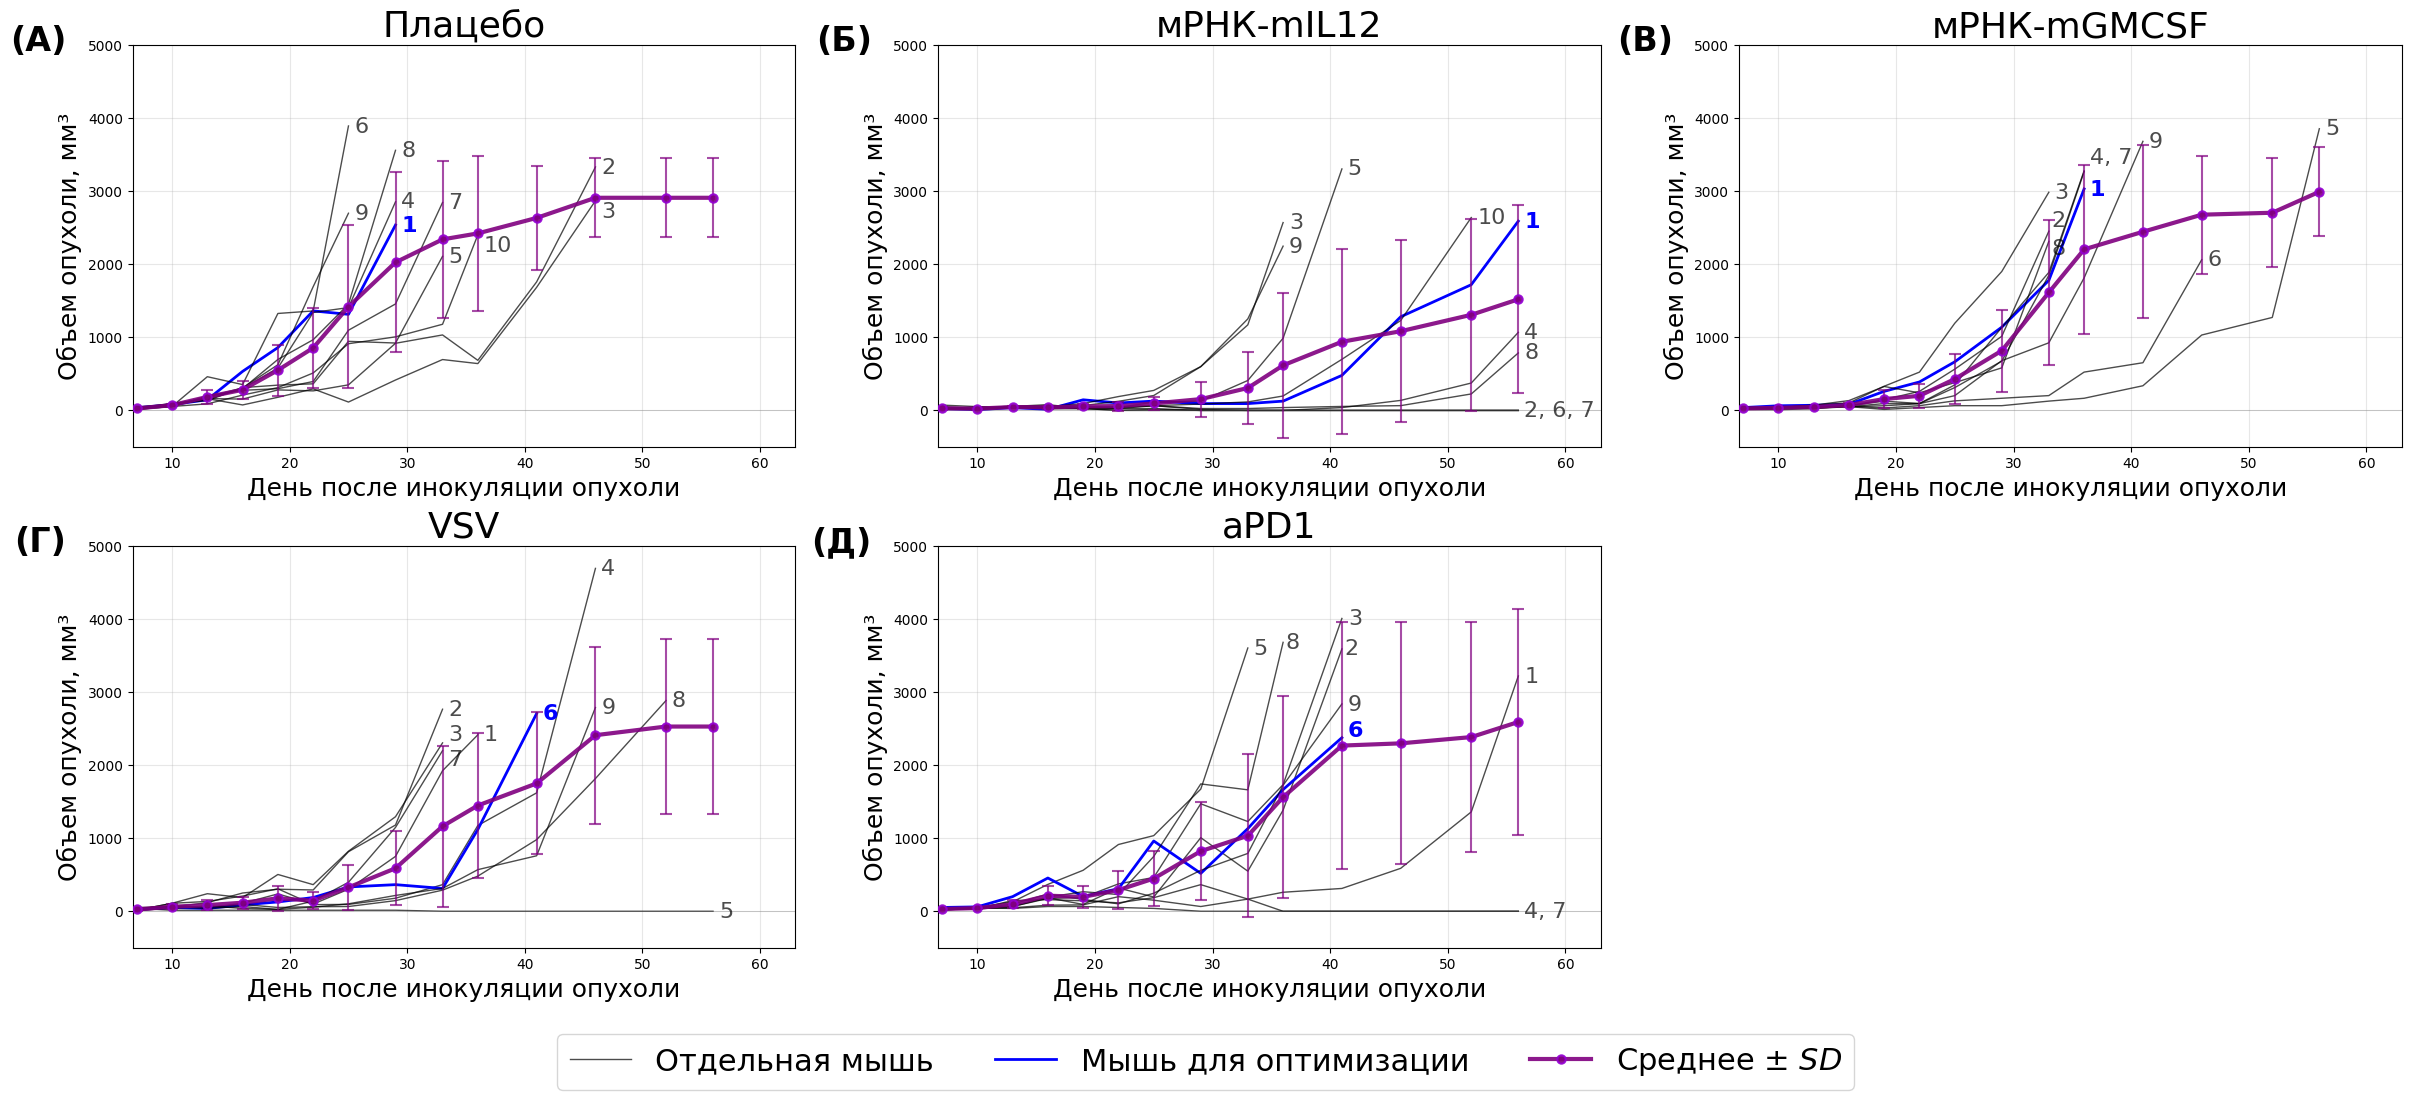

In [2]:
fig = plot_tumor_growth_comparison_grid(
                                excel_path = 'Tables/mouse_data_individual_curves.xlsx',
                                exp_sheet_names = ['PBS_exp', 'IL12_exp', 'GMCSF_exp', 'VSV_exp', 'aPD1_exp'],
                                xlabels = ["День после инокуляции опухоли",
                                           "День после инокуляции опухоли",
                                           "День после инокуляции опухоли",
                                           "День после инокуляции опухоли",
                                           "День после инокуляции опухоли"],
                                xlabel_fontsize = 18,
                                ylabels=["Объем опухоли, мм³",
                                         "Объем опухоли, мм³",
                                         "Объем опухоли, мм³",
                                         "Объем опухоли, мм³",
                                         "Объем опухоли, мм³"],
                                ylabel_fontsize = 18,
                                Titles = ["Плацебо",
                                          "мРНК-mIL12",
                                          "мРНК-mGMCSF",
                                          "VSV",
                                          "aPD1"],
                                title_fontsize=26, 
                                highlight_mouse_ids = [1,1,1,6,6],
                                line_indicators=[
                                                    ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
                                                    ['1', '2, 6, 7', '3', '4', '5', None, None, '8', '9', '10'],
                                                    ['1', '2', '3', '4, 7', '5', '6', None, '8', '9'],
                                                    ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
                                                    ['1', '2', '3', '4, 7', '5', '6', None, '8', '9'],
                                                ],
                                line_indicator_offset_x=[
                                                            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                                                            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                                                            [0.5, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.5],
                                                            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                                                            [0.5, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.5],
                                                        ],
                                line_indicator_offset_y=[
                                                            [0,0,-150,0,0,0,0,0,0,-150],
                                                            [0,0,0,0,0,0,0,0,0,0],
                                                            [0,150,0,200,0,0,0,-100,0],
                                                            [0,0,120,0,0,0,-120,0,0,],
                                                            [0,0,0,0,0,100,0,0,0]
                                                        ],
                                line_indicator_fontsize=[
                                                            [16,16,16,16,16,16,16,16,16,16],
                                                            [16,16,16,16,16,16,16,16,16,16],
                                                            [16,16,16,16,16,16,16,16,16],
                                                            [16,16,16,16,16,16,16,16,16],
                                                            [16,16,16,16,16,16,16,16,16]
                                                        ],
                                legend_fontsize = 22,
                                show_mouse_id_flags = [True,True,True,True,True],
                                langs=["ru","ru","ru","ru","ru"],
                                ymaxs=[5000, 5000, 5000, 5000, 5000],
                                ymins=[-500, -500, -500, -500, -500],
                                xmaxs=[63, 63, 63, 63, 63],
                                figsize_per_plot = (8, 5),
                                n_cols = 3,
                                subplot_signs=['(А)', '(Б)', '(В)', '(Г)', '(Д)'],
                                subplot_signs_fontsize=24,
                                validation_mouse_lines = ['blue', 'blue', 'blue', 'blue', 'blue'],
                                show_mean=False,
                                show_mean_corrected=True,
                                show_SD_on_mean_corrected=True,
                                legend_type='one'
                                )

# Функция для визуализации сравнения кривых роста опухоли CT26, предсказанных моделью, с экспериментальными данными, используемых для ее обучения (Рисунок 2.4.5.2 Е)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Optional, Union
import string

def plot_experiment_vs_simulation_comparison_single(
    excel_paths: Union[str, List[str]],
    sheet_names: Union[str, List[str]] = "Comparing",
    exp_column_name: str = "Experiment",
    sim_column_name: str = "Simulation",
    days_column_name: str = "Days",
    group_names: Optional[List[str]] = None,
    colors: Optional[List[str]] = None,
    exp_markers: Optional[List[str]] = None,
    Title: str = "Experiment vs Simulation Comparison",
    xlabel: str = "Days after tumor inoculation",
    ylabel: str = "Tumor volume, mm³",
    legend_fontsize: int = 12,
    xlabel_fontsize: int = 12,
    ylabel_fontsize: int = 12,
    title_fontsize: int = 14,
    ymax: Optional[float] = None,
    ymin: Optional[float] = None,
    xmax: Optional[float] = None,
    xmin: Optional[float] = None,
    figsize: tuple = (10, 6),
    exp_line_style: str = '-',
    exp_line_width: int = 2,
    exp_markersize: int = 8,
    sim_line_style: Union[str, List[str]] = '--',  # CHANGED: Can be string or list
    sim_line_width: int = 2,
    show_legend: bool = True,
    legend_position: str = 'best',
    grid_alpha: float = 0.3,
    plot_sign: Optional[str] = None,
    plot_sign_fontsize: int = 16,
    plot_sign_fontweight: str = 'bold',
    plot_sign_xoffset: float = -0.1,
    plot_sign_yoffset: float = 1.05
):
    """
    Creates a single plot comparing experimental and simulated data for multiple groups.
    
    This function reads data from Excel files and creates a plot showing both experimental
    (with markers) and simulated (dashed lines) data for multiple treatment groups or
    experimental conditions. Each group gets a unique color, and experimental data points
    have distinct markers for easy differentiation.
    
    Parameters:
    -----------
    excel_paths : str or List[str]
        Path(s) to Excel file(s) containing the data. Can be a single string for one file
        or a list of strings for multiple files.
    sheet_names : str or List[str], optional
        Sheet name(s) within the Excel file(s) containing the data. Default is "Comparing".
        If a single string is provided, it will be used for all files.
    exp_column_name : str, optional
        Name of the column containing experimental data. Default is "Experiment".
    sim_column_name : str, optional
        Name of the column containing simulation data. Default is "Simulation".
    days_column_name : str, optional
        Name of the column containing day/time data. Default is "Days".
    group_names : List[str], optional
        Names for each group/condition. If not provided, defaults to "Group 1", "Group 2", etc.
    colors : List[str], optional
        Colors for each group's lines. If not provided, uses a default color palette.
    exp_markers : List[str], optional
        Marker styles for experimental data points for each group. If not provided,
        uses a sequence of different markers.
    Title : str, optional
        Title for the plot. Default is "Experiment vs Simulation Comparison".
    xlabel : str, optional
        Label for the x-axis. Default is "Days after tumor inoculation".
    ylabel : str, optional
        Label for the y-axis. Default is "Tumor volume, mm³".
    legend_fontsize : int, optional
        Font size for the legend text. Default is 12.
    xlabel_fontsize : int, optional
        Font size for the x-axis label. Default is 12.
    ylabel_fontsize : int, optional
        Font size for the y-axis label. Default is 12.
    title_fontsize : int, optional
        Font size for the plot title. Default is 14.
    ymax : float, optional
        Maximum value for the y-axis. If not provided, calculated from data.
    ymin : float, optional
        Minimum value for the y-axis. If not provided, calculated from data.
    xmax : float, optional
        Maximum value for the x-axis. If not provided, calculated from data.
    xmin : float, optional
        Minimum value for the x-axis. If not provided, calculated from data.
    figsize : tuple, optional
        Figure size as (width, height) in inches. Default is (10, 6).
    exp_line_style : str, optional
        Line style for experimental data lines. Default is solid line ('-').
    exp_line_width : int, optional
        Line width for experimental data lines. Default is 2.
    exp_markersize : int, optional
        Size of markers for experimental data points. Default is 8.
    sim_line_style : str or List[str], optional
        Line style for simulated data lines. Can be:
        - Single string: Same style for all groups (e.g., '--')
        - List of strings: Different style for each group (e.g., ['--', ':', '-.', '-'])
        Default is dashed line ('--').
    sim_line_width : int, optional
        Line width for simulated data lines. Default is 2.
    show_legend : bool, optional
        Whether to show the legend. Default is True.
    legend_position : str, optional
        Position of the legend. Default is 'best' (matplotlib automatically chooses).
    grid_alpha : float, optional
        Transparency of the grid lines (0 = transparent, 1 = opaque). Default is 0.3.
    plot_sign : str, optional
        Letter or symbol to label the plot (e.g., 'A', 'B'). If None, no label is added.
    plot_sign_fontsize : int, optional
        Font size for the plot sign label. Default is 16.
    plot_sign_fontweight : str, optional
        Font weight for the plot sign label. Default is 'bold'.
    plot_sign_xoffset : float, optional
        X-offset for the plot sign label in axes coordinates (0-1). Default is -0.1.
    plot_sign_yoffset : float, optional
        Y-offset for the plot sign label in axes coordinates (0-1). Default is 1.05.
    
    Returns:
    --------
    matplotlib.figure.Figure
        The generated figure object.
    matplotlib.axes.Axes
        The axes object containing the plot.
    """
    
    # ==================== PARAMETER PREPARATION ====================
    
    # Convert single file path to list for uniform processing
    if isinstance(excel_paths, str):
        excel_paths = [excel_paths]
    
    # Convert single sheet name to list for uniform processing
    if isinstance(sheet_names, str):
        sheet_names = [sheet_names] * len(excel_paths)
    
    # Determine number of groups to plot (minimum of available files and sheet names)
    n_groups = min(len(excel_paths), len(sheet_names))
    
    # ==================== SIM_LINE_STYLE PROCESSING ====================
    
    # Process sim_line_style parameter (CHANGED: now can be string or list)
    if isinstance(sim_line_style, str):
        # Single string: use same style for all groups
        sim_line_styles = [sim_line_style] * n_groups
    elif isinstance(sim_line_style, list):
        if len(sim_line_style) >= n_groups:
            # List has enough elements for all groups
            sim_line_styles = sim_line_style[:n_groups]
        else:
            # Not enough elements: use provided styles, then fill with default
            default_style = '--'  # Default dashed line
            sim_line_styles = sim_line_style + [default_style] * (n_groups - len(sim_line_style))
            print(f"Warning: sim_line_style list has {len(sim_line_style)} elements but {n_groups} groups are needed.")
            print(f"Filling missing styles with default: '{default_style}'")
    else:
        # Invalid type: use default for all groups
        sim_line_styles = ['--'] * n_groups
        print(f"Warning: sim_line_style must be str or List[str]. Using default '--' for all groups.")
    
    # ==================== OTHER PARAMETER PREPARATION ====================
    
    # Create default group names if not provided
    if group_names is None:
        group_names = [f"Group {i+1}" for i in range(n_groups)]
    # If provided but insufficient, create additional names
    elif len(group_names) < n_groups:
        group_names = group_names + [f"Group {i+1}" for i in range(len(group_names), n_groups)]
    
    # Set colors for each group
    if colors is None:
        # Default Matplotlib color palette for good contrast
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        colors = colors[:n_groups]  # Take only as many as needed
    # If provided but insufficient, pad with default colors
    elif len(colors) < n_groups:
        default_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
        needed = n_groups - len(colors)
        additional_colors = default_colors * ((needed // len(default_colors)) + 1)
        colors = colors + additional_colors[:needed]
    
    # Set markers for experimental data points
    if exp_markers is None:
        # Default sequence of marker styles
        exp_markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', 'X', 'd', '<', '>', '1', '2', '3', '4']
        exp_markers = exp_markers[:n_groups]  # Take only as many as needed
    # If provided but insufficient, pad with default markers
    elif len(exp_markers) < n_groups:
        default_markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', 'X', 'd']
        needed = n_groups - len(exp_markers)
        additional_markers = default_markers * ((needed // len(default_markers)) + 1)
        exp_markers = exp_markers + additional_markers[:needed]
    
    # ==================== CREATE FIGURE ====================
    
    # Create figure and axes with specified size
    fig, ax = plt.subplots(figsize=figsize)
    
    # Lists to collect all data points for automatic axis limit calculation
    all_x_values = []
    all_y_values = []
    
    # ==================== PLOT DATA FOR EACH GROUP ====================
    
    for group_idx in range(n_groups):
        try:
            # Read data from Excel file
            df = pd.read_excel(excel_paths[group_idx], sheet_name=sheet_names[group_idx])
            
            # ==================== COLUMN IDENTIFICATION ====================
            
            # Initialize variables to store column names
            days_col = None
            exp_col = None
            sim_col = None
            
            # Search for columns by name (case-insensitive)
            for col in df.columns:
                if col.lower() == days_column_name.lower():
                    days_col = col
                elif col.lower() == exp_column_name.lower():
                    exp_col = col
                elif col.lower() == sim_column_name.lower():
                    sim_col = col
            
            # Fallback: if columns not found by name, use positional defaults
            if days_col is None and len(df.columns) > 0:
                days_col = df.columns[0]  # First column assumed to be days
            if exp_col is None and len(df.columns) > 1:
                exp_col = df.columns[1]  # Second column assumed to be experimental data
            if sim_col is None and len(df.columns) > 2:
                sim_col = df.columns[2]  # Third column assumed to be simulation data
            
            # Skip this group if no days column found
            if days_col is None:
                continue
            
            # ==================== DATA EXTRACTION ====================
            
            # Extract days data and convert to numeric, handling errors
            days = pd.to_numeric(df[days_col], errors='coerce').values
            
            # ==================== PLOT EXPERIMENTAL DATA ====================
            
            if exp_col is not None and exp_col in df.columns:
                # Extract experimental data and convert to numeric
                exp_data = pd.to_numeric(df[exp_col], errors='coerce').values
                
                # Find indices where both days and experimental data are valid (not NaN)
                exp_valid_idx = ~np.isnan(exp_data) & ~np.isnan(days[:len(exp_data)])
                exp_days_valid = days[:len(exp_data)][exp_valid_idx]
                exp_data_valid = exp_data[exp_valid_idx]
                
                # Plot experimental data if valid points exist
                if len(exp_days_valid) > 0:
                    ax.plot(exp_days_valid, exp_data_valid, 
                           color=colors[group_idx], 
                           linewidth=exp_line_width, 
                           linestyle=exp_line_style,
                           marker=exp_markers[group_idx],
                           markersize=exp_markersize,
                           markerfacecolor=colors[group_idx],
                           markeredgecolor='black',  # Black edge for better visibility
                           markeredgewidth=1,
                           alpha=0.9,
                           zorder=10,  # High zorder to ensure experimental data is on top
                           label=f"{group_names[group_idx]} (эксп.)")
                    
                    # Add to lists for axis limit calculation
                    all_x_values.extend(exp_days_valid)
                    all_y_values.extend(exp_data_valid)
            
            # ==================== PLOT SIMULATION DATA ====================
            
            if sim_col is not None and sim_col in df.columns:
                # Extract simulation data and convert to numeric
                sim_data = pd.to_numeric(df[sim_col], errors='coerce').values
                
                # Find indices where both days and simulation data are valid (not NaN)
                sim_valid_idx = ~np.isnan(sim_data) & ~np.isnan(days[:len(sim_data)])
                sim_days_valid = days[:len(sim_data)][sim_valid_idx]
                sim_data_valid = sim_data[sim_valid_idx]
                
                # Plot simulation data if valid points exist
                if len(sim_days_valid) > 0:
                    ax.plot(sim_days_valid, sim_data_valid, 
                           color=colors[group_idx], 
                           linewidth=sim_line_width, 
                           linestyle=sim_line_styles[group_idx],  # CHANGED: use individual style
                           alpha=0.7,
                           zorder=5,  # Lower zorder than experimental data
                           label=f"{group_names[group_idx]} (сим.)")
                    
                    # Add to lists for axis limit calculation
                    all_x_values.extend(sim_days_valid)
                    all_y_values.extend(sim_data_valid)
                    
        except Exception as e:
            # Handle errors gracefully and continue with other groups
            print(f"Error processing group {group_idx+1} ({group_names[group_idx]}): {str(e)}")
    
    # ==================== PLOT CONFIGURATION ====================
    
    # Set axis labels and title with specified font sizes
    ax.set_xlabel(xlabel, fontsize=xlabel_fontsize)
    ax.set_ylabel(ylabel, fontsize=ylabel_fontsize)
    ax.set_title(Title, fontsize=title_fontsize)
    
    # Add grid with specified transparency
    ax.grid(True, alpha=grid_alpha)
    
    # ==================== AXIS LIMITS CALCULATION ====================
    
    # Calculate automatic axis limits based on data
    if all_x_values:
        auto_xmax = max(all_x_values)
        auto_xmax_with_margin = auto_xmax * 1.05  # Add 5% margin
        auto_xmin = min(all_x_values)
        # Add margin, but handle negative values differently
        auto_xmin_with_margin = auto_xmin * 0.95 if auto_xmin > 0 else auto_xmin * 1.05
    else:
        # Default values if no data points
        auto_xmax_with_margin = 100
        auto_xmin_with_margin = 0
    
    # Set maximum x-axis limit (user-specified or automatic)
    if xmax is not None:
        ax.set_xlim(right=xmax)
    else:
        ax.set_xlim(right=auto_xmax_with_margin)
    
    # Set minimum x-axis limit (user-specified or automatic)
    if xmin is not None:
        ax.set_xlim(left=xmin)
    else:
        ax.set_xlim(left=auto_xmin_with_margin)
    
    # Calculate automatic y-axis limits based on data
    if all_y_values:
        auto_ymax = max(all_y_values)
        auto_ymax_with_margin = auto_ymax * 1.1  # Add 10% margin
        auto_ymin = min(all_y_values)
        # Add margin, but handle negative values differently
        auto_ymin_with_margin = auto_ymin * 0.9 if auto_ymin > 0 else auto_ymin * 1.1
    else:
        # Default values if no data points
        auto_ymax_with_margin = 100
        auto_ymin_with_margin = 0
    
    # Set maximum y-axis limit (user-specified or automatic)
    if ymax is not None:
        ax.set_ylim(top=ymax)
    else:
        ax.set_ylim(top=auto_ymax_with_margin)
    
    # Set minimum y-axis limit (user-specified or automatic)
    if ymin is not None:
        user_ymin = ymin
        ax.set_ylim(bottom=user_ymin)
        
        # Add a reference line at y=0 if ymin is negative
        if user_ymin < 0:
            ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    else:
        ax.set_ylim(bottom=auto_ymin_with_margin)
    
    # ==================== LEGEND ====================
    
    # Add legend if requested
    if show_legend:
        ax.legend(loc=legend_position, fontsize=legend_fontsize)
    
    # ==================== PLOT SIGNATURE ====================
    
    # Add plot sign (e.g., 'A', 'B') for multi-plot figures
    if plot_sign is not None:
        # Plot sign is positioned in axes coordinates (0-1 range, not data coordinates)
        ax.text(plot_sign_xoffset, plot_sign_yoffset, plot_sign, 
               transform=ax.transAxes,  # Use axes coordinates
               fontsize=plot_sign_fontsize,
               fontweight=plot_sign_fontweight,
               verticalalignment='top',
               horizontalalignment='right')
    
    # Return figure and axes objects for further customization if needed
    return fig, ax

## Рисунок 2.4.5.2 Е

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Кривые роста опухоли: эксперимент и симуляция'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>)

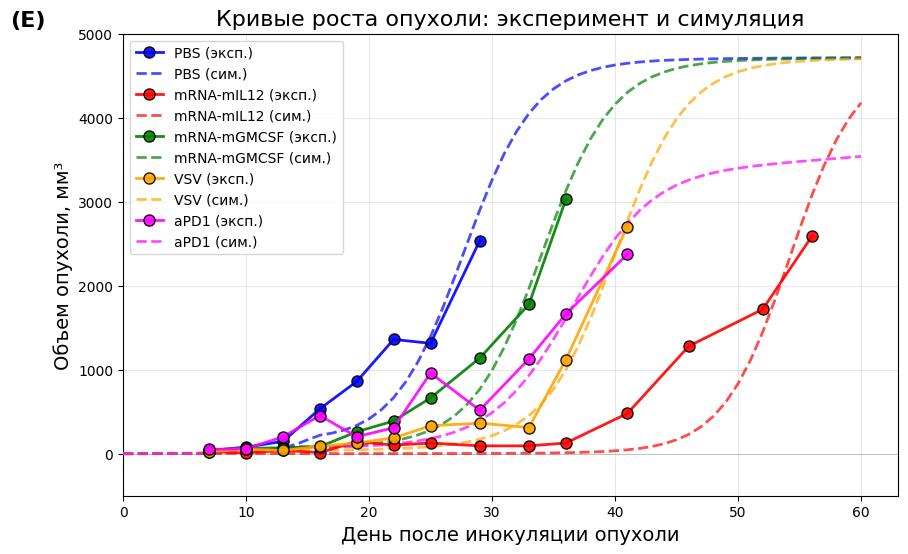

In [4]:
plot_experiment_vs_simulation_comparison_single(
    excel_paths=["Tables/Validation_mice.xlsx",
                 "Tables/Validation_mice.xlsx",
                 "Tables/Validation_mice.xlsx",
                 "Tables/Validation_mice.xlsx",
                 "Tables/Validation_mice.xlsx",
                 ],
    sheet_names=["Comparing PBS",
                 "Comparing mRNA-mIL12",
                 "Comparing mRNA-mGMCSF",
                 "Comparing VSV",
                 "Comparing aPD1"],
    group_names=["PBS",
                 "mRNA-mIL12",
                 "mRNA-mGMCSF",
                 "VSV",
                 "aPD1"],
    colors=['blue',
            'red',
            'green',
            'orange',
            'magenta'],
    exp_markers=['o',
                 'o',
                 'o',
                 'o',
                 'o'],
    Title="Кривые роста опухоли: эксперимент и симуляция",
    xlabel="День после инокуляции опухоли",
    ylabel="Объем опухоли, мм³",
    figsize=(10, 6),
    legend_position='upper left',
    legend_fontsize=10,
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    title_fontsize=16,
    ymax=5000,
    ymin= -500,
    xmax=63,
    xmin= 0,
    plot_sign = '(Е)',
)

# Функция для визуализации значений целевой функции для оптимизации для пяти изучаемых групп (Рисунок 2.4.5.2 Ж)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from typing import List, Optional, Union, Tuple, Any

def barplot_simple(file_paths, sheet_names, exp_col, sim_col, time_col='Days', 
                     figsize=(14, 7), labels=None, x_label='Datasets', 
                     x_label_fontsize=12, y_label='RMSE', y_label_fontsize=12,
                     show_values=True, values_fontsize=12, title=None, title_fontsize=14, 
                     labels_fontsize=11, sign=None, bars_delimiter=0.8,
                     sign_fontsize=16, sign_fontweight='bold',
                     sign_xoffset=-0.1, sign_yoffset=1.05,
                     bars_colors: Optional[Union[str, List[str], List[Tuple[float, float, float]]]] = None,
                     method: str = "RMSE",
                     manual_values: Optional[List[float]] = None,
                     y_axis_type: str = "number"):
    """
    Simplified version of a function for plotting various error metrics as bar charts.
    
    This function reads experimental and simulated data from Excel files, calculates error metrics
    (RMSE, distance, or objective function), and displays them as a bar chart. It can also display
    manually provided values without calculation.
    
    Parameters:
    -----------
    file_paths : List[str]
        List of paths to Excel files containing data.
    sheet_names : List[str]
        List of sheet names for each Excel file.
    exp_col : str
        Name of the column containing experimental data.
    sim_col : str
        Name of the column containing simulated data.
    time_col : str, optional
        Name of the column containing time points. Default is 'Days'.
    figsize : Tuple[float, float], optional
        Size of the figure (width, height) in inches. Default is (14, 7).
    labels : List[str], optional
        Custom labels for each dataset (bar). If None, automatic labels are generated.
    x_label : str, optional
        Label for the x-axis. Default is 'Datasets'.
    x_label_fontsize : int, optional
        Font size for the x-axis label. Default is 12.
    y_label : str, optional
        Label for the y-axis. Default is 'RMSE' (will adapt to method if default is used).
    y_label_fontsize : int, optional
        Font size for the y-axis label. Default is 12.
    show_values : bool, optional
        Whether to display metric values above each bar. Default is True.
    values_fontsize : int, optional
        Font size for values displayed above bars. Default is 12.
    title : str, optional
        Title for the plot. If None, no title is displayed.
    title_fontsize : int, optional
        Font size for the plot title. Default is 14.
    labels_fontsize : int, optional
        Font size for x-axis labels. Default is 11.
    sign : str, optional
        Letter or symbol to label the plot (e.g., 'A', 'B'). Displayed in top-left corner.
    bars_delimiter : float, optional
        Width of each bar (spacing between bars). Default is 0.8.
    sign_fontsize : int, optional
        Font size for the plot sign. Default is 16.
    sign_fontweight : str, optional
        Font weight for the plot sign. Default is 'bold'.
    sign_xoffset : float, optional
        X-offset for the plot sign in axes coordinates. Default is -0.1 (left of axis).
    sign_yoffset : float, optional
        Y-offset for the plot sign in axes coordinates. Default is 1.05 (above axis).
    bars_colors : str, List[str], or List[Tuple[float, float, float]], optional
        Colors for the bars. Can be:
        - str: Single color for all bars (e.g., 'blue', '#FF5733')
        - List[str]: List of colors for each bar
        - List[Tuple]: List of RGB/RGBA tuples
        If None, uses a default color palette.
    method : str, optional
        Error metric calculation method:
        - "RMSE": Root Mean Square Error (default)
        - "DISTANCE": Distance between simulated and experimental points 
          (square root of sum of squared differences)
        - "OBJECTIVE_FUNCTION": Objective function (sum of squared differences)
          according to formula: f = Σ (Q_i - Q_i_exp)²
    manual_values : List[float], optional
        Array of values to display directly without calculation. If provided, metric
        calculation is skipped and these values are used for plotting.
    y_axis_type : str, optional
        Type of y-axis scaling:
        - "number": Linear scale (default)
        - "log10": Logarithmic scale (base 10)
        - "log": Alias for log10
        - "symlog": Symmetrical logarithmic scale (handles negative values)
    
    Returns:
    --------
    pd.DataFrame
        DataFrame containing calculation results for each file, including:
        - File name
        - Sheet name
        - Calculated metric value
        - Number of data points
    """
    
    # ==================== INPUT VALIDATION ====================
    
    # Check that number of files matches number of sheet names
    if len(file_paths) != len(sheet_names):
        raise ValueError("Number of files must match number of sheet names")
    
    # Validate the method parameter
    method = method.upper()
    valid_methods = ["RMSE", "DISTANCE", "OBJECTIVE_FUNCTION", "OBJ_FUNC"]
    if method not in valid_methods:
        raise ValueError(f"Invalid method parameter: {method}. Valid values: {valid_methods}")
    
    # Allow shorthand for objective function
    if method == "OBJ_FUNC":
        method = "OBJECTIVE_FUNCTION"
    
    # Validate y_axis_type parameter
    y_axis_type = y_axis_type.lower()
    valid_y_axis_types = ["number", "log", "log10", "symlog"]
    if y_axis_type not in valid_y_axis_types:
        raise ValueError(f"Invalid y_axis_type: '{y_axis_type}'. Valid values: {valid_y_axis_types}")
    
    # Alias 'log' to 'log10'
    if y_axis_type == "log":
        y_axis_type = "log10"
    
    # Initialize storage for results
    results = []
    metric_values = []
    generated_labels = []
    
    # ==================== PROCESSING LOGIC ====================
    
    # If manual values are provided, use them directly
    if manual_values is not None:
        print(f"Using manual values: {manual_values}")
        metric_values = manual_values.copy()
        
        # Generate labels for manual values
        for idx, (file_path, sheet_name) in enumerate(zip(file_paths, sheet_names)):
            file_name = Path(file_path).stem
            
            # Use provided labels or generate automatic ones
            if labels and idx < len(labels):
                generated_labels.append(labels[idx])
            else:
                # Create a readable label from file and sheet names
                short_name = sheet_name if len(sheet_name) < 20 else sheet_name[:17] + "..."
                generated_labels.append(f"{file_name}\n{short_name}")
            
            # Create results entries for manual values
            results.append({
                'File': file_name,
                'Sheet': sheet_name,
                'Manual_Value': manual_values[idx] if idx < len(manual_values) else None,
                'Data_Points': 0  # Not applicable for manual values
            })
        
        # Validate that number of manual values matches number of files
        if len(metric_values) != len(file_paths):
            print(f"Warning: Number of manual values ({len(metric_values)}) doesn't match number of files ({len(file_paths)})")
    
    else:
        # ==================== METRIC CALCULATION ====================
        # Process each file and calculate the selected error metric
        
        for idx, (file_path, sheet_name) in enumerate(zip(file_paths, sheet_names)):
            try:
                # Read data from Excel file
                df = pd.read_excel(file_path, sheet_name=sheet_name)
            except Exception as e:
                print(f"Error reading {file_path} ({sheet_name}): {e}")
                continue
            
            # Check if required columns exist
            if exp_col not in df.columns or sim_col not in df.columns:
                print(f"Warning: {file_path} ({sheet_name}) missing required columns")
                continue
            
            # Clean data by removing rows with NaN in experimental or simulated columns
            df_clean = df.dropna(subset=[exp_col, sim_col])
            
            if len(df_clean) > 0:
                # Calculate metric based on selected method
                if method == "RMSE":
                    # Calculate Root Mean Square Error
                    # RMSE = sqrt(mean((experimental - simulated)²))
                    mse = np.mean((df_clean[exp_col] - df_clean[sim_col]) ** 2)
                    metric = np.sqrt(mse)
                    metric_name = "RMSE"
                    
                elif method == "DISTANCE":
                    # Calculate Euclidean distance between experimental and simulated points
                    # Distance = sqrt(Σ(experimental - simulated)²)
                    squared_diff_sum = np.sum((df_clean[exp_col] - df_clean[sim_col]) ** 2)
                    metric = np.sqrt(squared_diff_sum)
                    metric_name = "Distance"
                    
                elif method == "OBJECTIVE_FUNCTION":
                    # Calculate objective function (unweighted sum of squared differences)
                    # f = Σ (Q_i - Q_i_exp)²
                    # This is the same as the sum of squared errors (SSE)
                    
                    # Get experimental and simulated values
                    exp_values = df_clean[exp_col].values
                    sim_values = df_clean[sim_col].values
                    
                    # Calculate sum of squared differences
                    # This is simply the squared differences between simulated and experimental values
                    squared_diff_sum = np.sum((sim_values - exp_values) ** 2)
                    
                    metric = squared_diff_sum
                    metric_name = "Objective_Function"
                
                # Store calculated metric
                metric_values.append(metric)
                
                # Generate file name without extension
                file_name = Path(file_path).stem
                
                # Create labels for this dataset
                if labels and idx < len(labels):
                    generated_labels.append(labels[idx])
                else:
                    # Truncate long sheet names for readability
                    short_name = sheet_name if len(sheet_name) < 20 else sheet_name[:17] + "..."
                    generated_labels.append(f"{file_name}\n{short_name}")
                
                # Store results with appropriate information
                results.append({
                    'File': file_name,
                    'Sheet': sheet_name,
                    metric_name: metric,
                    'Data_Points': len(df_clean)
                })
    
    # Check if any data was successfully processed
    if not metric_values:
        print("No data available for plotting")
        return pd.DataFrame()
    
    # ==================== Y-AXIS TYPE VALIDATION ====================
    
    # Check if logarithmic scale is appropriate for the data
    if y_axis_type in ["log10", "symlog"]:
        # Convert to numpy array for easier processing
        metric_array = np.array(metric_values)
        
        if y_axis_type == "log10":
            # Check for negative or zero values that would break log10
            if np.any(metric_array <= 0):
                negative_or_zero = metric_array[metric_array <= 0]
                print(f"Warning: Cannot use log10 scale with non-positive values.")
                print(f"Found {len(negative_or_zero)} non-positive values: {negative_or_zero}")
                print(f"Minimum value: {np.min(metric_array)}")
                print("Switching to symlog scale.")
                y_axis_type = "symlog"
        
        if y_axis_type == "symlog":
            # Check if all values are zero (would still break symlog)
            if np.all(metric_array == 0):
                print("Warning: All values are zero. Cannot use logarithmic scale.")
                print("Switching to linear scale.")
                y_axis_type = "number"
    
    # ==================== LABEL PROCESSING ====================
    
    # Determine final labels for x-axis
    if labels and len(labels) != len(metric_values):
        print(f"Warning: Provided labels count ({len(labels)}) doesn't match bars count ({len(metric_values)})")
        # Fall back to generated labels
        final_labels = generated_labels
    elif labels:
        # Use provided labels
        final_labels = labels
    else:
        # Use automatically generated labels
        final_labels = generated_labels
    
    # ==================== COLOR PROCESSING ====================
    
    # Determine colors for bars based on user input or defaults
    if bars_colors is None:
        # Use default color palette
        if len(metric_values) <= 10:
            colors = plt.cm.Set3(np.linspace(0, 1, len(metric_values)))
        else:
            colors = plt.cm.tab20(np.linspace(0, 1, len(metric_values)))
    elif isinstance(bars_colors, str):
        # Single color for all bars
        colors = [bars_colors] * len(metric_values)
    elif isinstance(bars_colors, list) and len(bars_colors) == len(metric_values):
        # List of colors matching number of bars
        colors = bars_colors
    elif isinstance(bars_colors, list) and len(bars_colors) < len(metric_values):
        # Fewer colors than bars - repeat colors
        colors = []
        for i in range(len(metric_values)):
            colors.append(bars_colors[i % len(bars_colors)])
        print(f"Warning: Fewer colors ({len(bars_colors)}) than bars ({len(metric_values)}). Colors will repeat.")
    elif isinstance(bars_colors, list) and len(bars_colors) > len(metric_values):
        # More colors than bars - use only needed colors
        colors = bars_colors[:len(metric_values)]
        print(f"Warning: More colors ({len(bars_colors)}) than bars ({len(metric_values)}). Using first {len(metric_values)} colors.")
    else:
        # Invalid format - use defaults
        print("Warning: Invalid bars_colors format. Using default color palette.")
        if len(metric_values) <= 10:
            colors = plt.cm.Set3(np.linspace(0, 1, len(metric_values)))
        else:
            colors = plt.cm.tab20(np.linspace(0, 1, len(metric_values)))
    
    # ==================== Y-AXIS LABEL ADAPTATION ====================
    
    # Adapt y-axis label based on method or user input
    if manual_values is not None:
        # For manual values, use custom label or default to 'Values'
        y_axis_label = y_label if y_label != 'RMSE' else 'Values'
    elif y_label == 'RMSE':
        # If user used default label, adapt it to the method
        if method == "RMSE":
            y_axis_label = 'RMSE'
        elif method == "DISTANCE":
            y_axis_label = 'Distance'
        else:  # OBJECTIVE_FUNCTION
            y_axis_label = 'Objective Function (SSE)'
    else:
        # User provided custom label - use it as is
        y_axis_label = y_label
    
    # Add scale indication to y-axis label if using logarithmic scale
    if y_axis_type == "log10":
        y_axis_label = y_axis_label if y_axis_label else "log10(Values)"
    elif y_axis_type == "symlog":
        y_axis_label = f"symlog({y_axis_label})" if y_axis_label else "symlog(Values)"
    
    # ==================== PLOTTING ====================
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create bar positions (equally spaced)
    x_positions = np.arange(len(metric_values))
    
    # Create bars with specified colors and width
    bars = ax.bar(x_positions, metric_values, 
                  color=colors, 
                  edgecolor='black', 
                  width=bars_delimiter)
    
    # ==================== VALUES DISPLAY ====================
    
    # Add values above bars if requested
    if show_values:
        for bar, value in zip(bars, metric_values):
            # Format number based on magnitude and axis type
            if y_axis_type == "log10":
                # For log scale, show both log and original values
                if value > 0:
                    log_value = np.log10(value)
                    text = f'{value:.2e}'
                else:
                    text = f'{value:.2f}'
            elif abs(value) < 0.01 or abs(value) > 1000:
                # Scientific notation for extreme values
                text = f'{value:.2e}'
            else:
                # Two decimal places for normal values
                text = f'{value:.2f}'
            
            # Position text above bar
            # Adjust position for log scale
            if y_axis_type == "log10" and value > 0:
                # For log scale, position is different
                height = value
                text_y = height * 1.05  # Small offset
            else:
                height = bar.get_height()
                # Handle negative values for symlog
                if y_axis_type == "symlog" and value < 0:
                    text_y = height * 0.95  # Below the bar for negative values
                else:
                    text_y = height * 1.01  # 1% above bar
            
            ax.text(bar.get_x() + bar.get_width()/2, 
                    text_y, 
                    text, 
                    ha='center', 
                    va='bottom' if text_y >= height else 'top',
                    fontsize=values_fontsize,
                    linespacing=0.8)  # Tighter line spacing for multi-line text
    
    # ==================== PLOT CONFIGURATION ====================
    
    # Set axis labels with specified font sizes
    ax.set_xlabel(x_label, fontsize=x_label_fontsize)
    ax.set_ylabel(y_axis_label, fontsize=y_label_fontsize)
    
    # Add title if provided
    if title:
        ax.set_title(title, fontsize=title_fontsize, pad=20)
    
    # Configure x-axis tick labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(final_labels, 
                       rotation=45,  # Rotate for readability
                       ha='right',  # Align to right for better spacing
                       fontsize=labels_fontsize)
    
    # Add grid for better readability
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Set y-axis scale based on y_axis_type
    if y_axis_type == "log10":
        ax.set_yscale('log')
        # Configure log scale ticks
        ax.tick_params(axis='y', which='both', direction='in')
    elif y_axis_type == "symlog":
        ax.set_yscale('symlog')
        # Configure symlog parameters for better display
        # Use auto linthresh for automatic threshold determination
        ax.tick_params(axis='y', which='both', direction='in')
    
    # Add plot sign (e.g., 'A', 'B') for multi-plot figures
    if sign is not None:
        ax.text(sign_xoffset, sign_yoffset, sign, 
               transform=ax.transAxes,  # Use axes coordinates (0-1)
               fontsize=sign_fontsize,
               fontweight=sign_fontweight,
               va='top',  # Vertical alignment
               ha='right')  # Horizontal alignment
    
    # ==================== AXIS LIMITS ====================
    
    # Auto-adjust y-axis limits for better visualization
    max_value = max(metric_values)
    min_value = min(metric_values)
    
    if y_axis_type == "log10":
        # For log scale, ensure positive values
        if min_value > 0:
            # Set limits with logarithmic margins
            lower_limit = min_value / 2  # Half of minimum value
            upper_limit = max_value * 2  # Double the maximum value
            ax.set_ylim(lower_limit, upper_limit)
        else:
            # Fallback to linear if data invalid for log scale
            print("Warning: Data contains non-positive values, cannot set log scale limits.")
            if max_value > 0:
                ax.set_ylim(0, max_value * 1.15)
    
    elif y_axis_type == "symlog":
        # For symlog, handle both positive and negative values
        if max_value > 0 and min_value < 0:
            # Data spans both positive and negative
            margin = max(abs(max_value), abs(min_value)) * 0.15
            ax.set_ylim(min_value - margin, max_value + margin)
        elif max_value > 0:
            # All positive values
            ax.set_ylim(0, max_value * 1.15)
        else:
            # All negative values
            ax.set_ylim(min_value * 1.15, 0)
    
    else:  # Linear scale
        if max_value > 0:
            # Add 15% margin above highest value
            ax.set_ylim(0, max_value * 1.15)
        else:
            # Handle case with all negative or zero values
            ax.set_ylim(min_value * 1.15, 0)
    
    # Adjust layout to prevent label clipping
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    # ==================== RESULTS PROCESSING ====================
    
    # Create DataFrame from results
    results_df = pd.DataFrame(results)
    
    # ==================== SUMMARY STATISTICS ====================
    
    # Print comprehensive summary
    print("\n" + "="*60)
    if manual_values is not None:
        print("RESULTS SUMMARY (Manual Values):")
    else:
        print(f"RESULTS SUMMARY (Method: {method}):")
    print(f"Y-axis type: {y_axis_type}")
    print("="*60)
    
    if manual_values is not None:
        # Statistics for manual values
        print(f"Number of values: {len(results_df)}")
        print(f"Mean value: {np.mean(manual_values):.4f}")
        print(f"Standard deviation: {np.std(manual_values):.4f}")
        print(f"Minimum value: {min(manual_values):.4f}")
        print(f"Maximum value: {max(manual_values):.4f}")
        print(f"Sum of values: {sum(manual_values):.4f}")
        
        # Additional statistics for log scale if applicable
        if y_axis_type == "log10":
            positive_values = [v for v in manual_values if v > 0]
            if positive_values:
                log_values = np.log10(positive_values)
                print(f"Geometric mean (for positive values): {10**np.mean(log_values):.4f}")
                print(f"Mean of log10 values: {np.mean(log_values):.4f}")
    else:
        # Statistics for calculated metrics
        metric_column = metric_name
        print(f"Total number of datasets: {len(results_df)}")
        print(f"Total data points across all datasets: {results_df['Data_Points'].sum()}")
        print(f"Mean {metric_column}: {results_df[metric_column].mean():.4f}")
        print(f"Standard deviation of {metric_column}: {results_df[metric_column].std():.4f}")
        print(f"Minimum {metric_column}: {results_df[metric_column].min():.4f}")
        print(f"Maximum {metric_column}: {results_df[metric_column].max():.4f}")
        
        # Additional statistics for log scale if applicable
        if y_axis_type == "log10":
            positive_values = [v for v in results_df[metric_column] if v > 0]
            if positive_values:
                log_values = np.log10(positive_values)
                print(f"Geometric mean (for positive values): {10**np.mean(log_values):.4f}")
                print(f"Mean of log10 values: {np.mean(log_values):.4f}")
    
    # Print detailed results table
    print("\nDetailed results:")
    if manual_values is not None:
        print(results_df[['File', 'Sheet', 'Manual_Value']].to_string(index=False))
    else:
        print(results_df[['File', 'Sheet', metric_column, 'Data_Points']].to_string(index=False))
    
    return results_df

## Рисунок 2.4.5.2 Ж

Using manual values: [20567.770595215836, 1193550.747202153, 11601.229670517487, 7661.760191592942, 32193.85869540926]


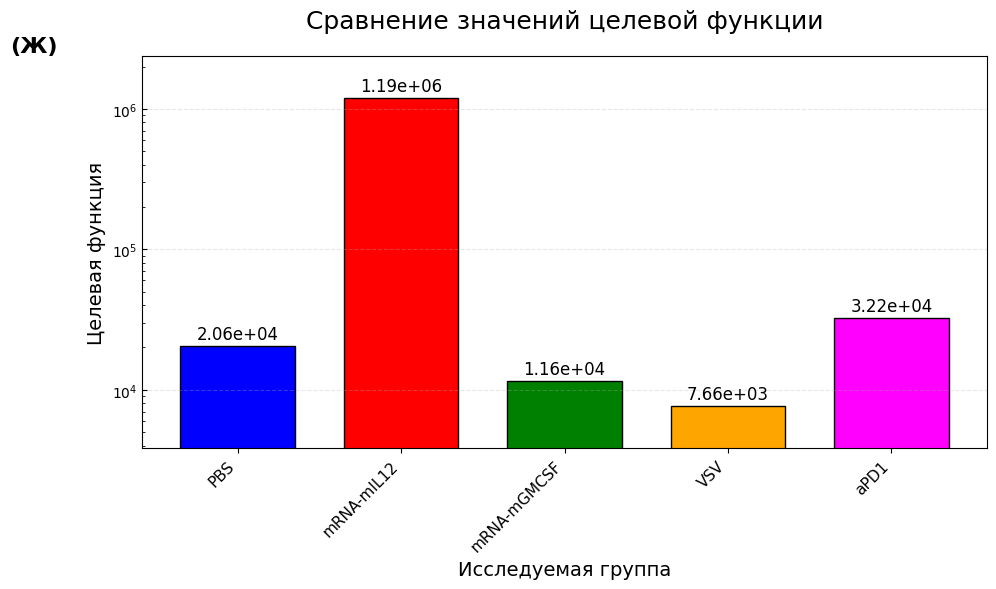


RESULTS SUMMARY (Manual Values):
Y-axis type: log10
Number of values: 5
Mean value: 253115.0733
Standard deviation: 470293.5155
Minimum value: 7661.7602
Maximum value: 1193550.7472
Sum of values: 1265575.3664
Geometric mean (for positive values): 37095.9711
Mean of log10 values: 4.5693

Detailed results:
           File                 Sheet  Manual_Value
Validation_mice         Comparing PBS  2.056777e+04
Validation_mice  Comparing mRNA-mIL12  1.193551e+06
Validation_mice Comparing mRNA-mGMCSF  1.160123e+04
Validation_mice         Comparing VSV  7.661760e+03
Validation_mice        Comparing aPD1  3.219386e+04


File                  Sheet  Manual_Value  Data_Points
0  Validation_mice          Comparing PBS  2.056777e+04            0
1  Validation_mice   Comparing mRNA-mIL12  1.193551e+06            0
2  Validation_mice  Comparing mRNA-mGMCSF  1.160123e+04            0
3  Validation_mice          Comparing VSV  7.661760e+03            0
4  Validation_mice         Comparing aPD1  3.219386e+04            0

In [6]:
barplot_simple(
        file_paths=["Tables/Validation_mice.xlsx",
                     "Tables/Validation_mice.xlsx",
                     "Tables/Validation_mice.xlsx",
                     "Tables/Validation_mice.xlsx",
                     "Tables/Validation_mice.xlsx",
                    ],
        sheet_names=["Comparing PBS",
                     "Comparing mRNA-mIL12",
                     "Comparing mRNA-mGMCSF",
                     "Comparing VSV",
                     "Comparing aPD1"
                    ],
        exp_col='Experiment',
        sim_col='Simulation',
        time_col='Days',
        x_label='Исследуемая группа',
        y_label='Целевая функция',
        labels = ['PBS',
                  "mRNA-mIL12",
                  "mRNA-mGMCSF",
                  "VSV",
                  "aPD1"],
        x_label_fontsize=14,
        y_label_fontsize=14,
        figsize=(10, 6),
        show_values=True,
        title='Сравнение значений целевой функции',
        labels_fontsize=11,
        sign='(Ж)',
        bars_delimiter=0.7,
        title_fontsize = 18,
        bars_colors=['blue',
            'red',
            'green',
            'orange',
            'magenta'],
        manual_values = [20567.770595215836, 1193550.747202153, 11601.229670517487, 7661.760191592942, 32193.85869540926],
        y_axis_type='log10'
    )

# Функция для визуализации графиков идентифицируемости подгоняемых параметров модели (Рисунок 2.4.5.2 З, И, К, Л, М, Н)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Optional, Union, Any
import string

def plot_identifiability_fixed(
    excel_files: Union[str, List[str]],
    sheet_names: List[str],
    start_param_col: str,
    start_obj_col: str,
    bound_line_col: str,
    param_values_col: str,
    obj_values_col: str,
    xmin_col: str,
    xmax_col: str,
    ymin_col: str,
    ymax_col: str,
    ylabels: List[str],
    ylabel_fontsize: Union[int, List[int]],
    xlabels: List[str],
    xlabel_fontsize: Union[int, List[int]],
    subplot_signs: Optional[List[str]] = None,
    n_cols: int = 2,
    subplot_signs_fontsize: int = 16,
    lines_colors: Optional[Union[str, List[str]]] = None
):
    """
    Fixed version of the plot_identifiability function.
    
    This function creates a grid of identifiability plots showing objective function
    values versus parameter values. Each plot displays how the objective function 
    changes as a parameter is varied, with a reference line indicating an acceptability
    threshold. This is useful for parameter identifiability analysis in optimization.
    
    Parameters:
    -----------
    excel_files : str or List[str]
        Path(s) to Excel file(s) containing the data. If a single string is provided,
        the same file is used for all plots.
    sheet_names : List[str]
        List of sheet names within the Excel file(s) for each plot.
    start_param_col : str
        Column name for the starting parameter value (optimal parameter).
    start_obj_col : str
        Column name for the starting objective function value (optimal objective).
    bound_line_col : str
        Column name for the bound line value (horizontal reference line threshold).
    param_values_col : str
        Column name for parameter values (x-axis values for the curve).
    obj_values_col : str
        Column name for objective function values (y-axis values for the curve).
    xmin_col : str
        Column name for x-axis minimum limit.
    xmax_col : str
        Column name for x-axis maximum limit.
    ymin_col : str
        Column name for y-axis minimum limit.
    ymax_col : str
        Column name for y-axis maximum limit.
    ylabels : List[str]
        Y-axis labels for each subplot.
    ylabel_fontsize : int or List[int]
        Font size(s) for y-axis labels. If int, same size for all plots.
    xlabels : List[str]
        X-axis labels for each subplot.
    xlabel_fontsize : int or List[int]
        Font size(s) for x-axis labels. If int, same size for all plots.
    subplot_signs : List[str], optional
        Letters or symbols to label each subplot (e.g., ['A', 'B', 'C']).
        If None, automatically generates letters from the alphabet.
    n_cols : int, optional
        Number of columns in the subplot grid. Default is 2.
    subplot_signs_fontsize : int, optional
        Font size for subplot sign labels. Default is 16.
    lines_colors : str or List[str], optional
        Color(s) for lines and points on each subplot.
        If str - single color for all plots.
        If List[str] - list of colors for each plot separately.
        Default is 'b' (blue).
    
    Returns:
    --------
    matplotlib.figure.Figure
        The generated figure with multiple identifiability plots.
    """
    
    # Determine number of plots from sheet names list
    n_plots = len(sheet_names)
    
    # Handle single file input by repeating it for all plots
    if isinstance(excel_files, str):
        excel_files = [excel_files] * n_plots
    elif len(excel_files) != n_plots:
        # If number of files doesn't match plots, use first file for all plots
        excel_files = [excel_files[0]] * n_plots
    
    # ==================== LINE COLORS PREPARATION ====================
    
    # Prepare the lines_colors parameter
    if lines_colors is None:
        line_colors_list = ['b'] * n_plots  # Default blue for all plots
    elif isinstance(lines_colors, str):
        line_colors_list = [lines_colors] * n_plots  # Single color for all plots
    elif isinstance(lines_colors, list):
        if len(lines_colors) < n_plots:
            # If fewer colors than plots, repeat the last color or use blue
            if len(lines_colors) > 0:
                last_color = lines_colors[-1]
                line_colors_list = lines_colors + [last_color] * (n_plots - len(lines_colors))
            else:
                line_colors_list = ['b'] * n_plots
        else:
            # Use provided colors, trim if more than needed
            line_colors_list = lines_colors[:n_plots]
    else:
        # Fallback to default blue
        line_colors_list = ['b'] * n_plots
    
    # ==================== SUBPLOT SIGNS PREPARATION ====================
    
    # Prepare subplot signs (letters A, B, C, etc.) 
    if subplot_signs is None:
        # Default: use first N letters of alphabet
        subplot_signs = list(string.ascii_uppercase[:n_plots])
    elif len(subplot_signs) < n_plots:
        # If fewer signs than plots, extend the sequence
        existing_signs = subplot_signs.copy()
        if existing_signs:
            last_char = existing_signs[-1]
            if last_char in string.ascii_uppercase:
                # Find position of last character and continue from next one
                start_idx = string.ascii_uppercase.index(last_char) + 1
            else:
                start_idx = 0
        else:
            start_idx = 0
        
        # Generate additional signs
        additional_signs = list(string.ascii_uppercase[start_idx:start_idx + (n_plots - len(existing_signs))])
        subplot_signs = existing_signs + additional_signs
    elif len(subplot_signs) > n_plots:
        # Trim if more signs than plots
        subplot_signs = subplot_signs[:n_plots]
    
    # ==================== FONT SIZE PREPARATION ====================
    
    # Prepare ylabel font sizes
    if isinstance(ylabel_fontsize, int):
        ylabel_fontsizes = [ylabel_fontsize] * n_plots  # Same size for all plots
    elif isinstance(ylabel_fontsize, list):
        # Use provided sizes, pad with default (12) if not enough
        ylabel_fontsizes = ylabel_fontsize[:n_plots] + [12] * (n_plots - len(ylabel_fontsize))
    else:
        ylabel_fontsizes = [12] * n_plots  # Default size
    
    # Prepare xlabel font sizes
    if isinstance(xlabel_fontsize, int):
        xlabel_fontsizes = [xlabel_fontsize] * n_plots  # Same size for all plots
    elif isinstance(xlabel_fontsize, list):
        # Use provided sizes, pad with default (12) if not enough
        xlabel_fontsizes = xlabel_fontsize[:n_plots] + [12] * (n_plots - len(xlabel_fontsize))
    else:
        xlabel_fontsizes = [12] * n_plots  # Default size
    
    # ==================== FIGURE AND SUBPLOT CREATION ====================
    
    # Calculate number of rows needed for the grid
    n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division
    
    # Set consistent figure size per plot
    figsize_per_plot = (6, 4)
    total_width = figsize_per_plot[0] * n_cols
    total_height = figsize_per_plot[1] * n_rows
    
    # Create the subplot grid
    fig, axes = plt.subplots(n_rows, n_cols, 
                            figsize=(total_width, total_height),
                            squeeze=False,  # Always return 2D array of axes
                            constrained_layout=True)  # Better spacing
    
    # Flatten the axes array for easier indexing
    axes_flat = axes.flatten()
    
    # ==================== PLOT EACH SUBPLOT ====================
    
    for idx, sheet_name in enumerate(sheet_names):
        ax = axes_flat[idx]
        
        try:
            # Read data from Excel file
            df = pd.read_excel(excel_files[idx], sheet_name=sheet_name)
            
            # ==================== EXTRACT SINGLE VALUES ====================
            
            # Extract single-value parameters (from first row)
            start_param = df.at[0, start_param_col]      # Optimal parameter value
            start_obj = df.at[0, start_obj_col]          # Optimal objective value
            bound_value = df.at[0, bound_line_col]       # Threshold line value
            
            # ==================== EXTRACT CURVE DATA ====================
            
            # Drop NaN values from parameter column to get valid data points
            param_series = df[param_values_col].dropna()
            # Get corresponding objective values for the same rows
            obj_series = df.loc[param_series.index, obj_values_col]
            
            # Convert to numpy arrays for plotting
            param_values = param_series.values.astype(float)
            obj_values = obj_series.values.astype(float)
            
            # ==================== EXTRACT AXIS LIMITS ====================
            
            # Extract axis limits from first row
            xmin = df.at[0, xmin_col]
            xmax = df.at[0, xmax_col]
            ymin = df.at[0, ymin_col]
            ymax = df.at[0, ymax_col]
            
            # ==================== SORT DATA FOR SMOOTH PLOTTING ====================
            
            # Sort by parameter values for a smooth curve
            sorted_indices = np.argsort(param_values)
            param_sorted = param_values[sorted_indices]
            obj_sorted = obj_values[sorted_indices]
            
            # ==================== COLOR PREPARATION ====================
            
            # Get color for current plot
            line_color = line_colors_list[idx]
            
            # Determine colors for points based on line color
            # Create darker versions for point edges for better visibility
            if line_color == 'b':
                point_edgecolor = 'darkblue'
                point_facecolor = 'blue'
            elif line_color == 'r':
                point_edgecolor = 'darkred'
                point_facecolor = 'red'
            elif line_color == 'g':
                point_edgecolor = 'darkgreen'
                point_facecolor = 'green'
            else:
                # For custom colors, use the same color with alpha
                point_edgecolor = line_color
                point_facecolor = line_color
            
            # ==================== PLOT ELEMENTS ====================
            
            # 1. Horizontal bound line (threshold line)
            ax.axhline(y=bound_value, color='red', linestyle='-', 
                      linewidth=1.5, alpha=0.7)
            
            # 2. Main curve showing objective vs parameter
            ax.plot(param_sorted, obj_sorted, color=line_color, 
                   linewidth=2, alpha=0.7, zorder=10)
            
            # 3. Optimal point (starting parameter/objective) - black square
            ax.scatter([start_param], [start_obj], color='black', s=75, 
                      marker='s', zorder=5, edgecolors='black', linewidths=2)
            
            # 4. Data points along the curve (using determined colors)
            ax.scatter(param_sorted, obj_sorted, color=point_facecolor, s=50, 
                      zorder=15, edgecolors=point_edgecolor, linewidths=1)
            
            # ==================== AXIS CONFIGURATION ====================
            
            # Set axis limits from data
            ax.set_xlim(xmin, xmax)
            ax.set_ylim(ymin, ymax)
            
            # Set axis labels with appropriate font sizes
            ax.set_xlabel(xlabels[idx], fontsize=xlabel_fontsizes[idx])
            ax.set_ylabel(ylabels[idx], fontsize=ylabel_fontsizes[idx])
            
            # Add grid for better readability
            ax.grid(True, alpha=0.3, linestyle='--')
            
            # ==================== ADD SUBPLOT SIGNATURE ====================
            
            if idx < len(subplot_signs):
                sign = subplot_signs[idx]
                # Position: -0.1, 1.05 in axes coordinates (left of axis, above plot)
                # Alignment: right horizontally, top vertically
                ax.text(-0.1, 1.05, f"{sign}", transform=ax.transAxes,
                       fontsize=subplot_signs_fontsize, 
                       fontweight='bold', 
                       va='top',     # vertical alignment: top
                       ha='right')   # horizontal alignment: right
            
        except Exception as e:
            # Handle errors gracefully - show error message in the plot
            print(f"Error processing sheet '{sheet_name}': {e}")
            ax.text(0.5, 0.5, f"Error", 
                   transform=ax.transAxes, 
                   ha='center', va='center',
                   fontsize=12, color='red')
    
    # ==================== CLEAN UP EMPTY SUBPLOTS ====================
    
    # Remove any empty subplots beyond the number of plots we have
    for i in range(n_plots, len(axes_flat)):
        fig.delaxes(axes_flat[i])
    
    return fig

## Рисунок 2.4.5.2 З, И, К, Л, М, Н

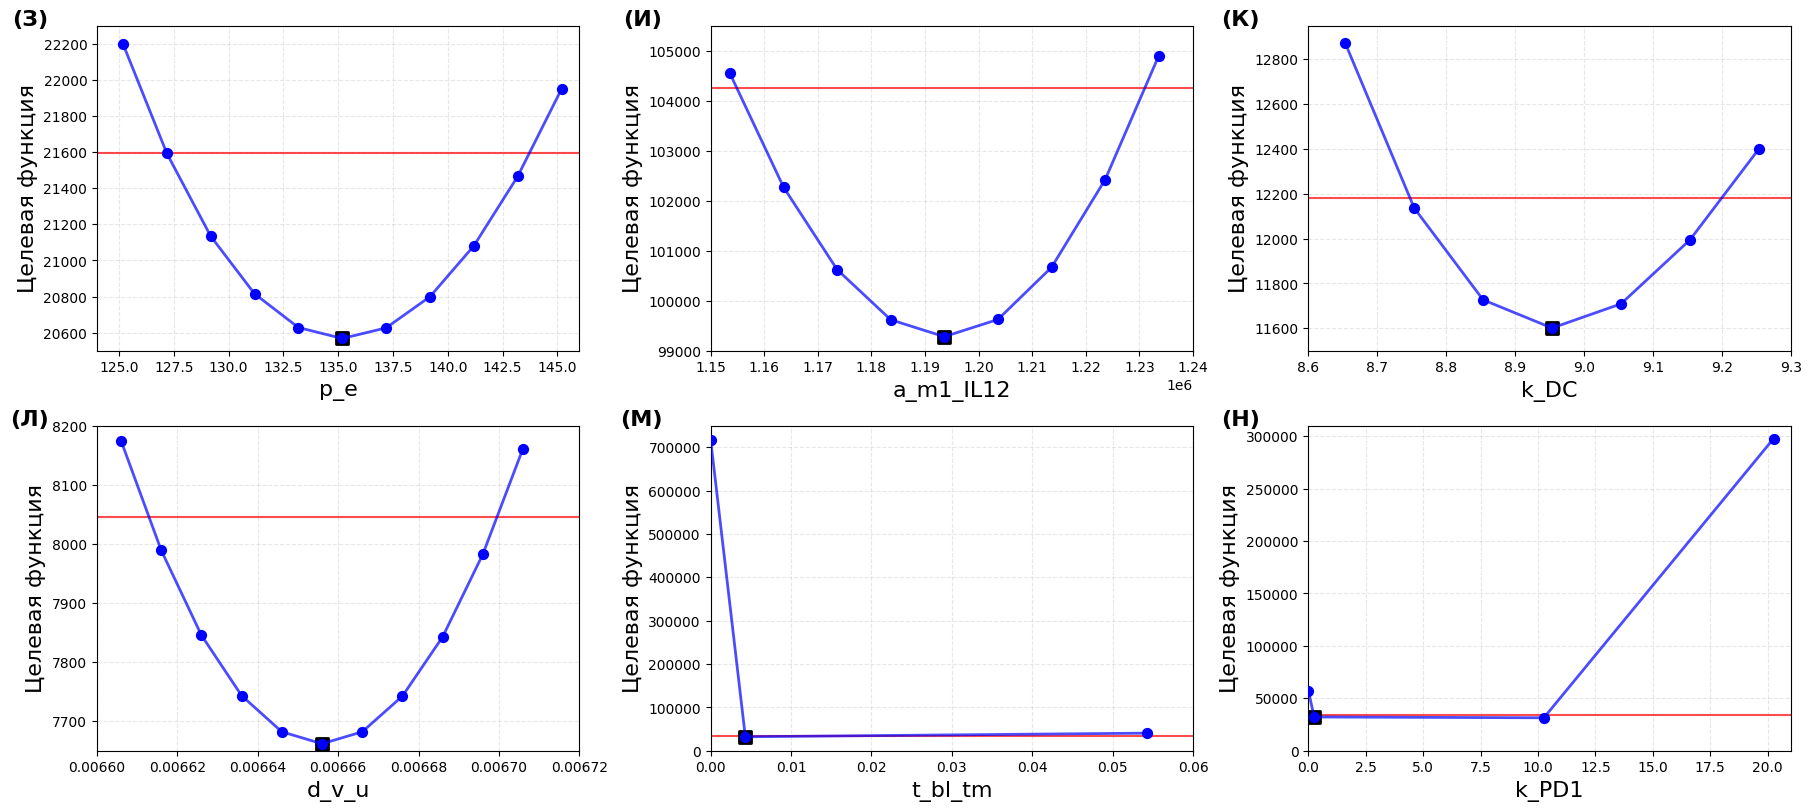

In [8]:
fig = plot_identifiability_fixed(
    excel_files=['Tables/Identifiability plots.xlsx',
                 'Tables/Identifiability plots.xlsx',
                 'Tables/Identifiability plots.xlsx',
                 'Tables/Identifiability plots.xlsx',
                 'Tables/Identifiability plots.xlsx',
                 'Tables/Identifiability plots.xlsx'
                 ],
    sheet_names=['p_e',
                 'a_m1_IL12',
                 'k_DC',
                 'd_v_u',
                 't_bl_tm',
                 'k_PD1'
                 ],
    start_param_col='Start estimation value',
    start_obj_col='Start estimation Obj. function',
    bound_line_col='Bound',
    param_values_col='Value',
    obj_values_col='Obj. function',
    xmin_col='Xmin',
    xmax_col='Xmax',
    ymin_col='Ymin',
    ymax_col='Ymax',
    ylabels=['Целевая функция',
             'Целевая функция',
             'Целевая функция',
             'Целевая функция',
             'Целевая функция',
             'Целевая функция'],
    ylabel_fontsize=16,
    xlabels=['p_e',
             'a_m1_IL12',
             'k_DC',
             'd_v_u',
             't_bl_tm',
             'k_PD1'
             ],
    xlabel_fontsize=16,
    subplot_signs=['(З)', '(И)', '(К)', '(Л)', '(М)', '(Н)'],
    n_cols=3,
    subplot_signs_fontsize=16,
    lines_colors=['blue', 'blue', 'blue', 'blue', 'blue', 'blue']
)

## Рисунок 2.4.5.3 А, Б, В, Г, Д

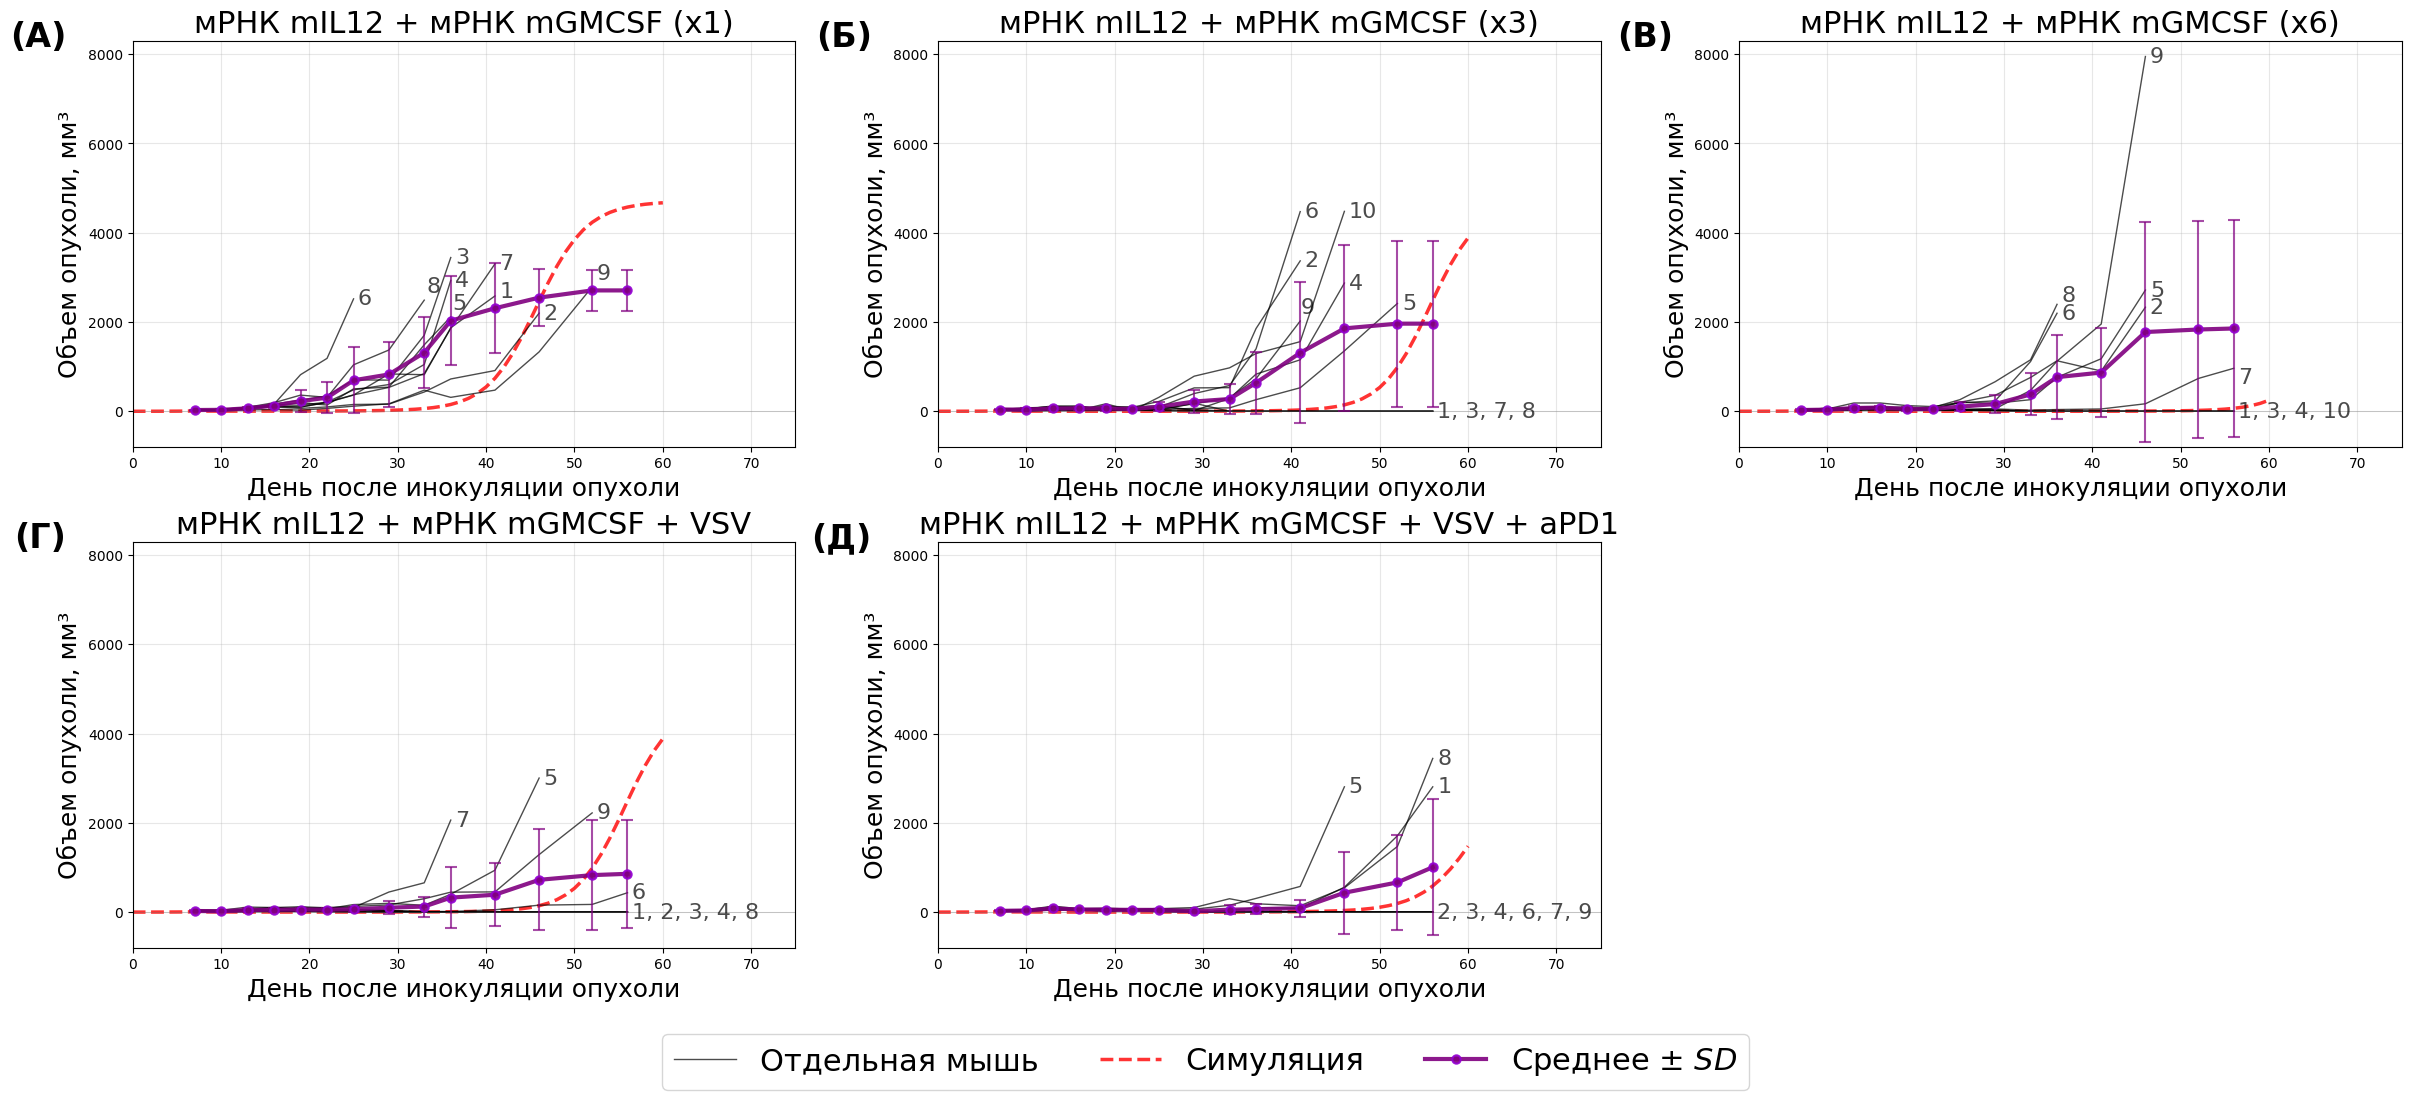

In [9]:
fig = plot_tumor_growth_comparison_grid(
                                excel_path = 'Tables/mouse_data_individual_curves.xlsx',
                                exp_sheet_names = ['IL12_GMCSF_x1_exp', 'IL12_GMCSF_x3_exp', 'IL12_GMCSF_x6_exp', 'IL12_GMCSF_VSV_exp', 'IL12_GMCSF_VSV_aPD1_exp'],
                                xlabels = ["День после инокуляции опухоли",
                                           "День после инокуляции опухоли",
                                           "День после инокуляции опухоли",
                                           "День после инокуляции опухоли",
                                           "День после инокуляции опухоли"],
                                xlabel_fontsize = 18,
                                ylabels=["Объем опухоли, мм³",
                                         "Объем опухоли, мм³",
                                         "Объем опухоли, мм³",
                                         "Объем опухоли, мм³",
                                         "Объем опухоли, мм³"],
                                ylabel_fontsize = 18,
                                Titles = ["мРНК mIL12 + мРНК mGMCSF (x1)",
                                          "мРНК mIL12 + мРНК mGMCSF (x3)",
                                          "мРНК mIL12 + мРНК mGMCSF (x6)",
                                          "мРНК mIL12 + мРНК mGMCSF + VSV",
                                          "мРНК mIL12 + мРНК mGMCSF + VSV + aPD1"],
                                title_fontsize=22, 
                                highlight_mouse_ids = [None,None,None,None,None],
                                sim_sheets=['IL12_GMCSF_x1_sim', 'IL12_GMCSF_x3_sim', 'IL12_GMCSF_x6_sim', 'IL12_GMCSF_VSV_sim', 'IL12_GMCSF_VSV_aPD1_sim'],
                                sim_sheet_x_col = 'Days',
                                sim_sheet_y_col = 'Simulation',
                                line_indicators=[
                                                    ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
                                                    ['1, 3, 7, 8', '2', None, '4', '5', '6', None, None, '9', '10'],
                                                    ['1, 3, 4, 10', '2', None, None, '5', '6', '7', '8', '9', None],
                                                    ['1, 2, 3, 4, 8', None, None, None, '5', '6', '7', None, '9'],
                                                    ['1', '2, 3, 4, 6, 7, 9', None, None, '5', None, None, '8', None]
                                                ],
                                line_indicator_offset_x=[
                                                            [0.5, 0.5, 0.5, 0.5, 0.2, 0.5, 0.5, 0.2, 0.5],
                                                            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5],
                                                            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                                                            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                                                            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                                                        ],
                                line_indicator_offset_y=[
                                                            [100,0,0,0,300,0,0,300,300],
                                                            [0,0,0,0,0,0,0,0,300,0],
                                                            [0,0,0,0,0,0,-200,200,0,0],
                                                            [0,0,0,0,0,0,0,0,0],
                                                            [0,0,0,0,0,0,0,0,0]
                                                        ],
                                line_indicator_fontsize=[
                                                            [16,16,16,16,16,16,16,16,16],
                                                            [16,16,16,16,16,16,16,16,16,16],
                                                            [16,16,16,16,16,16,16,16,16,16],
                                                            [16,16,16,16,16,16,16,16,16],
                                                            [16,16,16,16,16,16,16,16,16]
                                                        ],
                                legend_fontsize = 22,
                                show_mouse_id_flags = [True,True,True,True,True],
                                langs=["ru","ru","ru","ru","ru"],
                                ymaxs=[8300,8300,8300,8300,8300],
                                ymins=[-800, -800, -800, -800, -800],
                                xmaxs=[75, 75, 75, 75, 75],
                                figsize_per_plot = (8, 5),
                                n_cols = 3,
                                subplot_signs=['(А)', '(Б)', '(В)', '(Г)', '(Д)'],
                                subplot_signs_fontsize=24,
                                validation_mouse_lines = ['blue', 'blue', 'blue', 'blue', 'blue'],
                                show_mean=False,
                                show_mean_corrected=True,
                                show_SD_on_mean_corrected=True,
                                legend_type='one'
                                )

## Рисунок 2.4.5.3 Е

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Кривые роста опухоли для комбинированных терапий'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>)

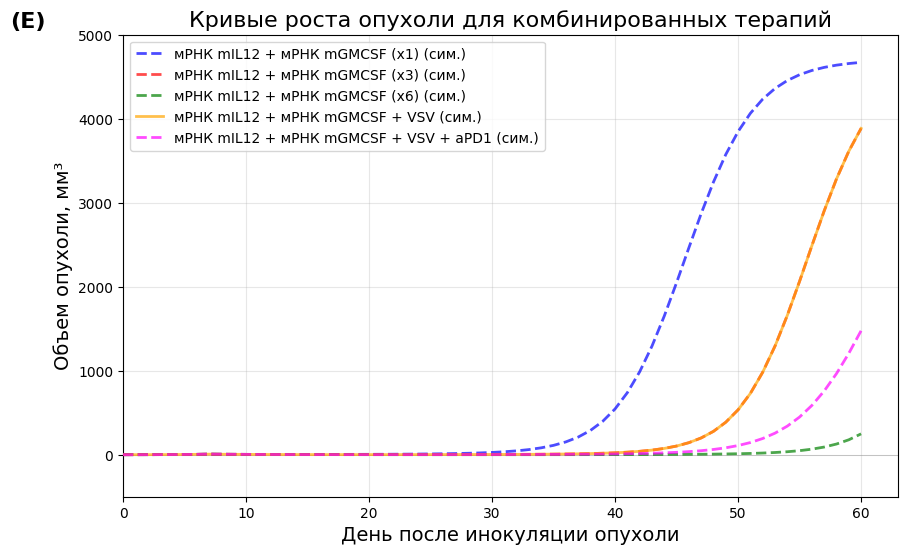

In [10]:
plot_experiment_vs_simulation_comparison_single(
    excel_paths=['Tables/mouse_data_individual_curves.xlsx',
                 'Tables/mouse_data_individual_curves.xlsx',
                 'Tables/mouse_data_individual_curves.xlsx',
                 'Tables/mouse_data_individual_curves.xlsx',
                 'Tables/mouse_data_individual_curves.xlsx',
                 ],
    sheet_names=['IL12_GMCSF_x1_sim', 'IL12_GMCSF_x3_sim', 'IL12_GMCSF_x6_sim', 'IL12_GMCSF_VSV_sim', 'IL12_GMCSF_VSV_aPD1_sim'],
    group_names=["мРНК mIL12 + мРНК mGMCSF (x1)",
                 "мРНК mIL12 + мРНК mGMCSF (x3)",
                 "мРНК mIL12 + мРНК mGMCSF (x6)",
                 "мРНК mIL12 + мРНК mGMCSF + VSV",
                 "мРНК mIL12 + мРНК mGMCSF + VSV + aPD1"],
    colors=['blue',
            'red',
            'green',
            'orange',
            'magenta'],
    exp_markers=['o',
                 'o',
                 'o',
                 'o',
                 'o'],
    Title="Кривые роста опухоли для комбинированных терапий",
    xlabel="День после инокуляции опухоли",
    ylabel="Объем опухоли, мм³",
    figsize=(10, 6),
    legend_position='upper left',
    legend_fontsize=10,
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    title_fontsize=16,
    ymax=5000,
    ymin= -500,
    xmax=63,
    xmin= 0,
    plot_sign = '(Е)',
    sim_line_style=['--','--','--','-','--']
)

# Функция для визуализации результатов анализа чувствительности модели (Рисунок 2.4.5.4)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_subplots_from_excel(
    excel_file: str,
    sheet_name: str,
    ylabel: str,
    subplot_columns: list,
    subplot_titles: list,
    subplots_in_row: int = 2,
    plot_title: str = None,
    colors: list = None,
    param_captions: list = None,
    xlabel: str = None,
):
    """
    Строит столбчатые диаграммы на нескольких subplot'ах на основе данных из Excel.

    Параметры:
    ----------
    excel_file : str
        Путь к Excel-файлу.
    sheet_name : str
        Название листа в Excel-файле.
    plot_title : str
        Общий заголовок для всей фигуры.
    xlabel : str, optional
        Подпись оси X (единая для всех subplot'ов). Если None — не отображается.
    ylabel : str
        Подпись оси Y (единая для всех subplot'ов).
    subplot_columns : list of list of str
        Список списков столбцов. Каждый внутренний список — столбцы для одного subplot'а.
    subplot_titles : list of str
        Список заголовков для каждого subplot'а. Должен совпадать по длине с subplot_columns.
    colors : list, optional
        Список цветов для столбцов. Если None, используются цвета по умолчанию.
    subplots_in_row : int, optional (по умолчанию 2)
        Количество subplot'ов в одном ряду.
    param_captions : list of str, optional
        Список пояснений для параметров (столбцов) в порядке их следования в subplot_columns.
        Если длина меньше общего числа столбцов — подписываются только первые len(param_captions) параметров.
        Если None — подписи не добавляются.
    """
    # Проверка согласованности входных данных
    n_subplots = len(subplot_columns)
    if n_subplots == 0:
        raise ValueError("Список subplot_columns пуст.")
    if len(subplot_titles) != n_subplots:
        raise ValueError("Длина subplot_titles должна совпадать с длиной subplot_columns.")

    # Чтение данных
    df = pd.read_excel(excel_file, sheet_name=sheet_name)

    # Проверка наличия всех столбцов
    all_columns = [col for sublist in subplot_columns for col in sublist]
    missing = [col for col in all_columns if col not in df.columns]
    if missing:
        raise ValueError(f"Следующие столбцы отсутствуют в листе '{sheet_name}': {missing}")

    # Цвета по умолчанию
    if colors is None:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']

    # Расчёт сетки
    rows = (n_subplots + subplots_in_row - 1) // subplots_in_row

    # Создание фигуры и осей
    fig, axes = plt.subplots(
        nrows=rows,
        ncols=subplots_in_row,
        figsize=(5 * subplots_in_row, 8 * rows),
        squeeze=False
    )
    if plot_title is not None:
        fig.suptitle(plot_title, fontsize=16)

    axes_flat = axes.flatten()

    # Глобальный индекс для отслеживания позиции в param_captions
    global_col_index = 0
    total_captions = len(param_captions) if param_captions is not None else 0

    # Построение каждого subplot'а
    for idx in range(n_subplots):
        ax = axes_flat[idx]
        cols = subplot_columns[idx]
        title = subplot_titles[idx]

        # Получаем данные из первой строки
        data = df[cols].iloc[0]
        values = data.values
        x_pos = np.arange(len(cols))

        # Цвета для текущего subplot'а
        subplot_colors = [colors[i % len(colors)] for i in range(len(cols))]

        # Строим столбцы
        bars = ax.bar(x_pos, values, width=0.8, color=subplot_colors)

        # Настройки осей
        if xlabel is not None:
            ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel, fontsize = 14)
        ax.set_title(title, fontsize = 16)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(cols, rotation=45, ha='right', fontsize = 12)
        ax.axhline(y=0, color='black', linewidth=1)
        ax.tick_params(axis='x', which='both', length=0)

        # Добавляем подписи из param_captions, если заданы и есть для текущего столбца
        if param_captions is not None:
            for j, (x, val) in enumerate(zip(x_pos, values)):
                if global_col_index >= total_captions:
                    break
                if pd.isna(val):
                    global_col_index += 1
                    continue

                caption = param_captions[global_col_index]
                ylim = ax.get_ylim()
                y_range = ylim[1] - ylim[0]
                offset = 0.02 * y_range

                if val >= 0:
                    ax.text(x, -offset, caption, ha='center', va='top', fontsize=10)
                else:
                    ax.text(x, offset, caption, ha='center', va='bottom', fontsize=10)

                global_col_index += 1

    # Скрыть лишние subplot'ы
    for idx in range(n_subplots, len(axes_flat)):
        fig.delaxes(axes_flat[idx])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Рисунок 2.4.5.4

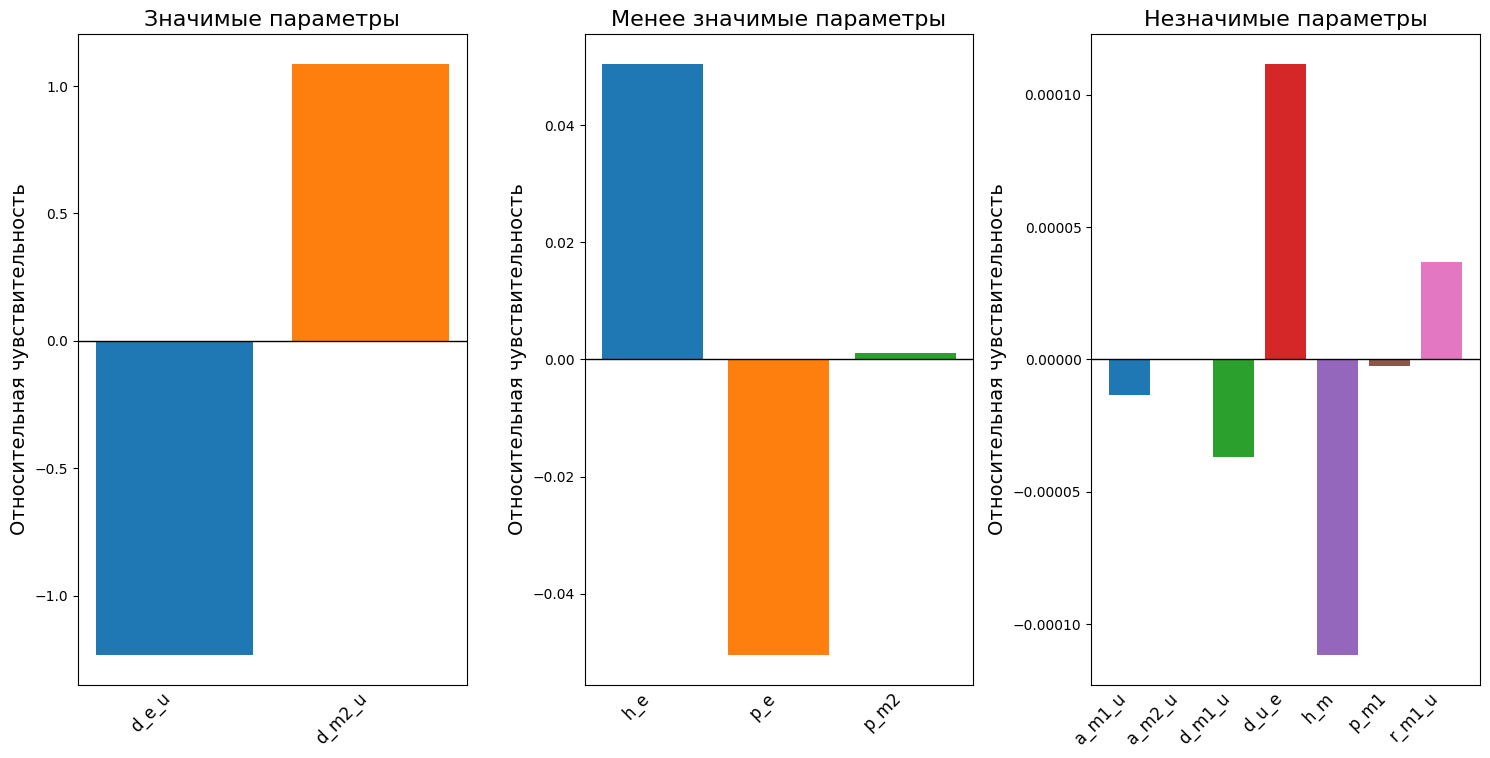

In [12]:
# Создаем график
data = plot_subplots_from_excel(
        excel_file = "Tables/Sensetivity analysis.xlsx",
        sheet_name = "Лист1",
        #plot_title="Sensitivity analysis",
        #xlabel="Parameters",
        ylabel="Относительная чувствительность",
        subplot_columns = [["d_e_u", "d_m2_u"], ["h_e", "p_e", "p_m2"], ["a_m1_u", "a_m2_u", "d_m1_u", "d_u_e", "h_m", "p_m1", "r_m1_u"]],
        subplot_titles = ["Значимые параметры", "Менее значимые параметры", "Незначимые параметры"],
        subplots_in_row = 3,
        #param_captions=['Cкорость уничтожения\n незараженных\n опухолевых клеток\n эффекторными\n T-клетками', 'Скорость поддержки\n роста незараженных\n опухолевых клеток\n M2-макрофагами']
        )

# Функция для визуализации значений целевой функции для каждой мыши с помощью варьирования параметров <i>d_e_u</i> and <i>d_m2_u</i> по всем исследуемым группам (Рисунок 2.4.5.6)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import FancyBboxPatch

def plot_grouped_ofv_comparison(excel_file, sheet_name='Лист1', orientation='vertical', 
                                figsize=(14, 8), value_format='scientific',
                                legend_labels=None,
                                extra_textbox=None,  # добавлен: дополнительный текст
                                extra_textbox_coor=(0.02, 0.98)  # добавлен: координаты текстового блока (x, y) в долях от размеров графика
                                ):
    """
    Строит сгруппированную столбчатую диаграмму сравнения OFV по методам лечения.
    
    Параметры:
    ----------
    excel_file : str
        Путь к Excel-файлу
    sheet_name : str, optional
        Название листа в Excel-файле (по умолчанию 'Лист1')
    orientation : str, optional
        Ориентация столбцов: 'vertical' (вертикальная) или 'horizontal' (горизонтальная)
        По умолчанию 'vertical'
    figsize : tuple, optional
        Размер фигуры (ширина, высота) в дюймах
    value_format : str, optional
        Формат отображения значений: 'scientific' (экспоненциальная форма) или 'standard' (стандартный)
    legend_labels : list of str, optional
        Массив подписей для легенды. Если None, используются названия из файла.
        Должен соответствовать количеству типов OFV.
    extra_textbox : str or list of str, optional
        Дополнительный текст для отображения на графике в виде текстового блока.
        Может быть строкой или списком строк.
    extra_textbox_coor : tuple, optional
        Координаты текстового блока (x, y) в долях от размеров графика (от 0 до 1).
        По умолчанию (0.02, 0.98) - левый верхний угол.
    """
    
    # Проверка допустимых значений параметров
    if orientation not in ['vertical', 'horizontal']:
        raise ValueError(f"Недопустимое значение orientation: '{orientation}'. "
                         f"Допустимые значения: 'vertical', 'horizontal'")
    
    if value_format not in ['scientific', 'standard']:
        raise ValueError(f"Недопустимое значение value_format: '{value_format}'. "
                         f"Допустимые значения: 'scientific', 'standard'")
    
    # Проверка координат текстового блока
    if not isinstance(extra_textbox_coor, (tuple, list)) or len(extra_textbox_coor) != 2:
        raise ValueError("extra_textbox_coor должен быть кортежем или списком из двух элементов")
    
    if not (0 <= extra_textbox_coor[0] <= 1 and 0 <= extra_textbox_coor[1] <= 1):
        raise ValueError("Координаты extra_textbox_coor должны быть в диапазоне от 0 до 1")
    
    # Загрузка данных
    df = pd.read_excel(excel_file, sheet_name=sheet_name, index_col=0)
    
    # Определяем названия методов лечения (исключаем служебные столбцы)
    treatment_methods = []
    for col in df.columns:
        if col not in ['Total','макс', ''] and not str(col).startswith('='):
            treatment_methods.append(col)
    
    # Фильтруем строки с OFV значениями
    ofv_rows = []
    ofv_labels = []
    for idx in df.index:
        if 'OFV' in str(idx):
            ofv_rows.append(idx)
            ofv_labels.append(idx)
    
    if not ofv_rows:
        raise ValueError("Не найдены строки с OFV значениями в данных")
    
    # Проверка и применение legend_labels
    if legend_labels is not None:
        if len(legend_labels) != len(ofv_labels):
            raise ValueError(f"Количество подписей в legend_labels ({len(legend_labels)}) "
                           f"не совпадает с количеством типов OFV ({len(ofv_labels)})")
        # Используем переданные подписи для легенды
        legend_titles = legend_labels
    else:
        # Используем исходные названия из файла
        legend_titles = ofv_labels
    
    # Извлекаем данные для графиков
    data = {}
    for method in treatment_methods:
        method_values = []
        for row in ofv_rows:
            value = df.loc[row, method]
            method_values.append(value)
        data[method] = method_values
    
    # Создаем DataFrame для удобства работы
    plot_df = pd.DataFrame(data, index=ofv_labels)
    
    # Параметры для графиков
    n_treatments = len(treatment_methods)  # количество методов лечения (11)
    n_ofv_types = len(ofv_labels)  # количество типов OFV (2)
    
    # Настройка положения столбцов
    if orientation == 'vertical':
        x = np.arange(n_treatments)  # позиции для групп
        width = 0.35  # ширина столбцов
        offset = width / 2  # смещение для второго столбца
    else:  # horizontal
        y = np.arange(n_treatments)
        height = 0.35
        offset = height / 2
    
    # Цвета для разных типов OFV
    colors = ['#1f77b4', '#ff7f0e']  # синий и оранжевый для двух типов OFV
    
    # Создание фигуры
    fig, ax = plt.subplots(figsize=figsize)
    
    # Рисование столбцов
    bars = []
    for i, (ofv_label, color, legend_title) in enumerate(zip(ofv_labels, colors, legend_titles)):
        values = plot_df.loc[ofv_label].values
        
        if orientation == 'vertical':
            positions = x - offset + i * width
            bar = ax.bar(positions, values, width, label=legend_title,  # <-- Используем legend_title
                         color=color, alpha=0.8, edgecolor='black')
        else:  # horizontal
            positions = y - offset + i * height
            bar = ax.barh(positions, values, height, label=legend_title,  # <-- Используем legend_title
                         color=color, alpha=0.8, edgecolor='black')
        
        bars.append(bar)
        
        # Добавление значений на столбцы (закомментировано, как в исходной функции)
        # for j, (pos, val) in enumerate(zip(positions, values)):
        #     if orientation == 'vertical':
        #         # Для вертикальных столбцов
        #         ax.text(pos, val + max(values) * 0.01, 
        #                f'{val:.2e}' if value_format == 'scientific' else f'{val:.0f}',
        #                ha='center', va='bottom', fontsize=9, rotation=90)
        #     else:
        #         # Для горизонтальных столбцов
        #         ax.text(val + max(values) * 0.01, pos,
        #                f'{val:.2e}' if value_format == 'scientific' else f'{val:.0f}',
        #                ha='left', va='center', fontsize=9)

    # Настройка осей и подписей
    if orientation == 'vertical':
        ax.set_xlabel('Метод терапии', fontsize=18)
        ax.set_ylabel('Значение целевой функции', fontsize=18)
        ax.set_xticks(x)
        ax.set_xticklabels(treatment_methods, fontsize=16, rotation=45, ha='right')
        ax.set_title('Сравнение целевой функции по методам лечения', fontsize=26, pad=20)
    else:
        ax.set_ylabel('Метод терапии', fontsize=16, fontweight='bold')
        ax.set_xlabel('Значение целевой функции', fontsize=16, fontweight='bold')
        ax.set_yticks(y)
        ax.set_yticklabels(treatment_methods, fontsize=10)
        #ax.set_title('Сравнение OFV по методам лечения', fontsize=14, fontweight='bold', pad=20)
    
    # Настройка форматирования значений на оси
    if value_format == 'scientific':
        if orientation == 'vertical':
            # Создаем кастомный форматтер, который отображает 0 как "0"
            def scientific_formatter(x, p):
                if abs(x) < 1e-10:  # проверяем, близко ли значение к нулю
                    return '0'
                else:
                    return f'{x:.1e}'
            ax.yaxis.set_major_formatter(FuncFormatter(scientific_formatter))
        else:
            # Создаем кастомный форматтер, который отображает 0 как "0"
            def scientific_formatter(x, p):
                if abs(x) < 1e-10:  # проверяем, близко ли значение к нулю
                    return '0'
                else:
                    return f'{x:.1e}'
            ax.xaxis.set_major_formatter(FuncFormatter(scientific_formatter))
    
    # Добавление сетки
    if orientation == 'vertical':
        ax.yaxis.grid(True, alpha=0.3, linestyle='--')
    else:
        ax.xaxis.grid(True, alpha=0.3, linestyle='--')
    
    # Добавление легенды
    ax.legend(title='Варьируемый параметр', fontsize=16, title_fontsize=16, loc='upper right')
    
    # Добавление дополнительного текстового блока, если указан
    if extra_textbox is not None:
        # Преобразуем текст в список строк, если это не список
        if isinstance(extra_textbox, str):
            text_lines = [extra_textbox]
        elif isinstance(extra_textbox, list):
            text_lines = extra_textbox
        else:
            raise ValueError("extra_textbox должен быть строкой или списком строк")
        
        # Создаем текст с переносами строк
        text_content = '\n'.join(text_lines)
        
        # Параметры текстового блока
        bbox_props = dict(
            boxstyle="round,pad=0.5",  # скругленный прямоугольник
            facecolor="white",  # белый фон
            alpha=0.8,  # небольшая прозрачность
            edgecolor="black",  # черная рамка
            linewidth=1  # толщина рамки
        )
        
        # Добавляем текстовый блок
        ax.text(
            extra_textbox_coor[0],  # x координата
            extra_textbox_coor[1],  # y координата
            text_content,
            transform=ax.transAxes,  # координаты в долях от размеров графика
            fontsize=16,
            verticalalignment='top',  # выравнивание по верху
            horizontalalignment='left',  # выравнивание по левому краю
            bbox=bbox_props,
            fontfamily='monospace'  # моноширинный шрифт для лучшей читаемости
        )
    
    # Настройка отступов для предотвращения обрезания текста
    plt.tight_layout()
    
    # Добавление информации о данных
    print(f"Количество методов лечения: {n_treatments}")
    print(f"Методы лечения: {treatment_methods}")
    print(f"Типы OFV (исходные): {ofv_labels}")
    if legend_labels is not None:
        print(f"Подписи в легенде: {legend_labels}")
    else:
        print("Подписи в легенде: (использованы исходные названия)")
    
    if extra_textbox is not None:
        print(f"\nДополнительный текст на графике: {text_content}")
    
    print("\nЗначения OFV:")
    print(plot_df)
    
    plt.show()
    
    return fig, ax, plot_df

## Рисунок 2.4.5.6

Количество методов лечения: 10
Методы лечения: ['Плацебо', 'mIL12', 'mGMCSF', 'VSV', 'aPD1', 'mIL12-mGMCSF (x1)', 'mIL12-mGMCSF (x3)', 'mIL12-mGMCSF (x6)', 'mIL12-mGMCSF-VSV', 'mIL12-mGMCSF-VSV-aPD1']
Типы OFV (исходные): ['OFV_d_e_u', 'OFV_d_m2_u']
Подписи в легенде: ['d_e_u', 'd_m2_u']

Дополнительный текст на графике: ИТОГОВЫЙ РЕЗУЛЬТАТ
d_e_u (3.039e+06) < d_m2_u (5.953e+06)

Значения OFV:
                  Плацебо          mIL12         mGMCSF           VSV  \
OFV_d_e_u   137076.291938  220588.190320  163981.509669  1.610003e+05   
OFV_d_m2_u  205858.085481  248119.320511  306323.049310  1.965606e+06   

                    aPD1  mIL12-mGMCSF (x1)  mIL12-mGMCSF (x3)  \
OFV_d_e_u   3.115896e+05      863518.177443      346303.402491   
OFV_d_m2_u  1.382459e+06      642624.714721      404223.712846   

            mIL12-mGMCSF (x6)  mIL12-mGMCSF-VSV  mIL12-mGMCSF-VSV-aPD1  
OFV_d_e_u       501262.175593     164570.527116          168692.530118  
OFV_d_m2_u      465570.903850     17380

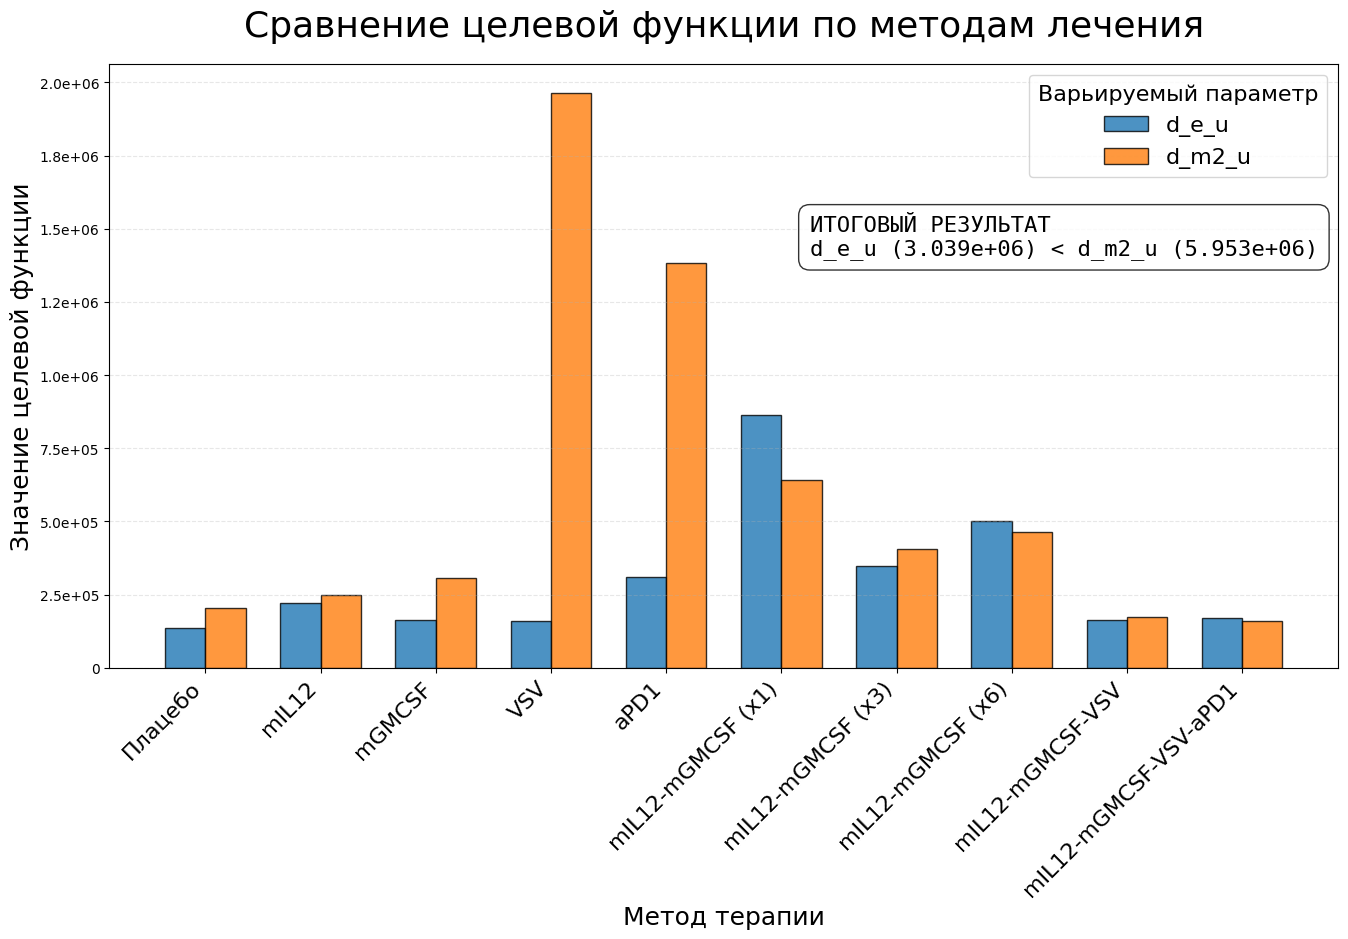

In [14]:
fig1, ax1, df1 = plot_grouped_ofv_comparison(
        excel_file='Tables/Compare_OFV.xlsx',
        sheet_name='Лист1',
        orientation='vertical',
        figsize=(14, 9.5),
        value_format='scientific',
        legend_labels = ['d_e_u', 'd_m2_u'],
        extra_textbox=[
        "ИТОГОВЫЙ РЕЗУЛЬТАТ",
        "d_e_u (3.039e+06) < d_m2_u (5.953e+06)",
        ],
        extra_textbox_coor=(0.57, 0.75)
    )

# Функция для создания графика с множеством панелей

## Каждая панель соответствует одной исследуемой группе и содержит следующие данные для каждой мыши из этой группы:
<ul>
    <li>Экспериментально полученный размер опухоли в разных временных точках</li>
    <li>Симуляция модели с индивидуальным параметров <i>d_e_u</i> для каждой мыши</li>
    <li>Симуляция модели с индивидуальным параметров <i>d_m2_u</i> для каждой мыши</li>
</ul>

### Рисунки 2.4.5.5 и 2.4.5.7

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import transforms

def plot_all_mice_together_subplots_multifile(
    excel_files,  # ИЗМЕНЕНО: теперь список/массив файлов
    sheet_names_list,
    x_col_list,
    exp_col_list=None,  # ИЗМЕНЕНО: теперь опциональный параметр
    sim_col_list=None,  # ИЗМЕНЕНО: теперь опциональный параметр (но хотя бы один из exp_col_list или sim_col_list должен быть задан)
    sim2_col_list=None,
    plot_titles="",
    xlabels="",
    ylabels="",
    colors_list=None,
    exp_type_list=".",  # может быть списком или строкой
    y_upper_limits=None,
    legend_labels_list=None,
    legend_ncol=3,
    legend_fontsize=12,
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    title_fontsize=20,
    plot_width=16,
    plot_height=12,
    legend_type="default",
    sim2_linestyle=":",
    sim2_linewidth=2,
    sim2_alpha=0.8,
    sim2_label_suffix=" (модель 2)",
    n_cols=2,
    subplot_figsize=None,
    subplot_signs=None,
    sharex=False,
    sharey=False,
    subplot_sign_fontsize=16,
    subplot_sign_fontweight='bold',
    subplot_sign_x_offset=-0.08,
    subplot_sign_y_offset=1.0,
    file_read_mode='per_subplot'  # добавлен: режим чтения файлов
):
    """
    Строит несколько графиков с данными по нескольким мышам в виде subplots.
    Теперь принимает массив файлов Excel (отдельный файл для каждого подграфика).
    
    Параметры:
    ----------
    excel_files : str or list of str
        Путь к Excel-файлу или список путей к Excel-файлам.
        Может быть:
        - Один файл (str): используется для всех подграфиков
        - Список файлов (list): отдельный файл для каждого подграфика
        - Список списков файлов: несколько файлов для каждого подграфика
    sheet_names_list : list of list of str
        Список списков имён листов для каждого подграфика.
    x_col_list : list of str
        Список названий столбцов с данными по оси X для каждого подграфика.
    exp_col_list : list of str or None, optional
        Список названий столбцов с экспериментальными данными для каждого подграфика.
        Если None, экспериментальные данные не отображаются.
    sim_col_list : list of str or None, optional
        Список названий столбцов с симуляционными данными (первая модель) для каждого подграфика.
        Если None, симуляционные данные первой модели не отображаются.
        Хотя бы один из exp_col_list или sim_col_list должен быть задан.
    sim2_col_list : list of str or None, optional
        Список названий столбцов с симуляционными данными второй модели для каждого подграфика.
    plot_titles : str or list of str
        Заголовки графиков. Если строка - будет использоваться для всех подграфиков.
    xlabels : str or list of str
        Подписи оси X. Если строка - будет использоваться для всех подграфиков.
    ylabels : str or list of str
        Подписи оси Y. Если строка - будет использоваться для всех подграфиков.
    colors_list : list of list of str or None
        Список списков цветов для каждого подграфика.
    exp_type_list : str or list of str, optional
        Тип отображения экспериментальных данных для каждого подграфика.
        "." — точки, "--" — пунктирная линия.
    y_upper_limits : float or list of float or None, optional
        Верхние пределы оси Y для каждого подграфика.
    legend_labels_list : list of list of str or None, optional
        Произвольные названия для легенды для каждого подграфика.
    legend_ncol : int, optional
        Количество колонок в легенде (по умолчанию 3).
    legend_fontsize : int, optional
        Размер шрифта легенды (по умолчанию 12).
    xlabel_fontsize : int, optional
        Размер шрифта подписи оси X (по умолчанию 14).
    ylabel_fontsize : int, optional
        Размер шрифта подписи оси Y (по умолчанию 14).
    title_fontsize : int, optional
        Размер шрифта заголовка (по умолчанию 20).
    plot_width : int, optional
        Ширина общего графика в дюймах (по умолчанию 16).
    plot_height : int, optional
        Высота общего графика в дюймах (по умолчанию 12).
    legend_type : str or list of str, optional
        Тип легенды для каждого подграфика:
        - "default": стандартная легенда со всеми мышами снизу
        - "simple": упрощенная легенда на графике
    sim2_linestyle : str or list of str, optional
        Стиль линии для второй модели симуляции для каждого подграфика.
    sim2_linewidth : float or list of float, optional
        Толщина линии для второй модели для каждого подграфика.
    sim2_alpha : float or list of float, optional
        Прозрачность линии для второй модели для каждого подграфика.
    sim2_label_suffix : str or list of str, optional
        Суффикс для легенды второй модели для каждого подграфика.
    n_cols : int, optional
        Количество подграфиков в одном ряду (по умолчанию 2).
    subplot_figsize : tuple or None, optional
        Размер каждого подграфика в дюймах (ширина, высота). Если None, вычисляется автоматически.
    subplot_signs : list of str or None, optional
        Обозначения подграфиков (А, Б, В и т.д.). Если None, не отображаются.
    sharex : bool, optional
        Если True, все подграфики будут иметь общую ось X (по умолчанию False).
    sharey : bool, optional
        Если True, все подграфики будут иметь общую ось Y (по умолчанию False).
    subplot_sign_fontsize : int, optional
        Размер шрифта для обозначений подграфиков (по умолчанию 16).
    subplot_sign_fontweight : str, optional
        Жирность шрифта для обозначений (по умолчанию 'bold').
    subplot_sign_x_offset : float, optional
        Смещение обозначений по оси X относительно левого края (по умолчанию -0.15).
        Отрицательные значения - смещение влево, положительные - вправо.
    subplot_sign_y_offset : float, optional
        Смещение обозначений по оси Y относительно верхнего края (по умолчанию 1.0).
        Значения > 1.0 - смещение вверх, < 1.0 - смещение вниз.
    file_read_mode : str, optional
        Режим чтения файлов:
        - 'per_subplot': отдельный файл для каждого подграфика (по умолчанию)
        - 'shared': один файл для всех подграфиков
        - 'per_mouse': отдельный файл для каждой мыши в каждом подграфике
    """
    
    # Проверка: хотя бы один из exp_col_list или sim_col_list должен быть задан
    if exp_col_list is None and sim_col_list is None:
        raise ValueError("Хотя бы один из параметров exp_col_list или sim_col_list должен быть задан")
    
    # Определяем количество подграфиков
    n_plots = len(sheet_names_list)
    
    # Обработка параметра excel_files
    if isinstance(excel_files, str):
        # Один файл для всех подграфиков
        excel_files = [excel_files] * n_plots
        file_read_mode = 'shared'
    elif isinstance(excel_files, list):
        if len(excel_files) != n_plots:
            # Проверяем, может быть это список списков (несколько файлов для каждого подграфика)
            if all(isinstance(f, list) for f in excel_files):
                if len(excel_files) == n_plots:
                    file_read_mode = 'per_mouse'
                else:
                    raise ValueError(f"Количество элементов в excel_files ({len(excel_files)}) должно совпадать с количеством подграфиков ({n_plots})")
            else:
                # Список файлов, но не совпадает с количеством подграфиков
                if len(excel_files) < n_plots:
                    # Дополняем последним файлом
                    excel_files = excel_files + [excel_files[-1]] * (n_plots - len(excel_files))
                else:
                    excel_files = excel_files[:n_plots]
    else:
        raise TypeError("Параметр excel_files должен быть строкой или списком")
    
    # Вычисляем количество рядов
    n_rows = int(np.ceil(n_plots / n_cols))
    
    # Если subplot_figsize не задан, вычисляем автоматически
    if subplot_figsize is None:
        subplot_width = plot_width / n_cols
        subplot_height = plot_height / n_rows
        subplot_figsize = (subplot_width, subplot_height)
    
    # Создаем фигуру с subplots
    fig, axes = plt.subplots(n_rows, n_cols, 
                             figsize=(plot_width, plot_height),
                             sharex=sharex, sharey=sharey,
                             squeeze=False)
    
    # Преобразуем axes в плоский список для удобства
    axes_flat = axes.flatten()
    
    # Преобразуем параметры в списки, если они переданы как одиночные значения
    def to_list(param, length, default=None):
        if isinstance(param, str) or not hasattr(param, '__len__'):
            return [param] * length
        elif len(param) < length:
            return list(param) + [default] * (length - len(param))
        else:
            return list(param)[:length]
    
    # Преобразуем все параметры в списки
    plot_titles = to_list(plot_titles, n_plots, "")
    xlabels = to_list(xlabels, n_plots, "")
    ylabels = to_list(ylabels, n_plots, "")
    exp_type_list = to_list(exp_type_list, n_plots, ".")
    y_upper_limits = to_list(y_upper_limits, n_plots, None)
    legend_type = to_list(legend_type, n_plots, "default")
    sim2_linestyle = to_list(sim2_linestyle, n_plots, ":")
    sim2_linewidth = to_list(sim2_linewidth, n_plots, 2)
    sim2_alpha = to_list(sim2_alpha, n_plots, 0.8)
    sim2_label_suffix = to_list(sim2_label_suffix, n_plots, " (модель 2)")
    
    # Обработка exp_col_list
    if exp_col_list is None:
        exp_col_list = [None] * n_plots
    else:
        exp_col_list = to_list(exp_col_list, n_plots, None)
    
    # Обработка sim_col_list
    if sim_col_list is None:
        sim_col_list = [None] * n_plots
    else:
        sim_col_list = to_list(sim_col_list, n_plots, None)
    
    # Обработка sim2_col_list
    if sim2_col_list is None:
        sim2_col_list = [None] * n_plots
    else:
        sim2_col_list = to_list(sim2_col_list, n_plots, None)
    
    # Обработка colors_list
    if colors_list is None:
        colors_list = []
        for i in range(n_plots):
            # Генерируем цвета по умолчанию
            colors = plt.cm.tab10(np.linspace(0, 1, len(sheet_names_list[i])))
            colors_list.append(colors)
    
    # Обработка legend_labels_list
    if legend_labels_list is None:
        legend_labels_list = sheet_names_list
    
    # Добавляем обозначения подграфиков, если заданы
    if subplot_signs is not None:
        subplot_signs = to_list(subplot_signs, n_plots, "")
    
    # Обрабатываем каждый подграфик
    for i, ax in enumerate(axes_flat):
        if i >= n_plots:
            # Скрываем лишние subplots
            ax.axis('off')
            continue
        
        # Получаем параметры для текущего подграфика
        sheet_names = sheet_names_list[i]
        x_col = x_col_list[i]
        exp_col = exp_col_list[i]
        sim_col = sim_col_list[i]
        sim2_col = sim2_col_list[i]
        plot_title = plot_titles[i]
        xlabel = xlabels[i]
        ylabel = ylabels[i]
        colors = colors_list[i]
        exp_type = exp_type_list[i]
        y_upper_limit = y_upper_limits[i]
        legend_labels = legend_labels_list[i]
        current_legend_type = legend_type[i]
        current_sim2_linestyle = sim2_linestyle[i]
        current_sim2_linewidth = sim2_linewidth[i]
        current_sim2_alpha = sim2_alpha[i]
        current_sim2_label_suffix = sim2_label_suffix[i]
        
        # Проверка: хотя бы один из exp_col или sim_col должен быть задан для текущего подграфика
        if exp_col is None and sim_col is None:
            raise ValueError(f"Для подграфика {i} хотя бы один из параметров exp_col или sim_col должен быть задан")
        
        # Получаем файл(ы) для текущего подграфика
        if file_read_mode == 'per_subplot':
            # Один файл для всего подграфика
            current_excel_file = excel_files[i]
            file_list = [current_excel_file] * len(sheet_names)
        elif file_read_mode == 'shared':
            # Один файл для всех
            current_excel_file = excel_files[i]
            file_list = [current_excel_file] * len(sheet_names)
        elif file_read_mode == 'per_mouse':
            # Отдельный файл для каждой мыши
            file_list = excel_files[i]
            if len(file_list) != len(sheet_names):
                raise ValueError(f"Для подграфика {i}: количество файлов ({len(file_list)}) должно совпадать с количеством листов ({len(sheet_names)})")
        else:
            raise ValueError(f"Неизвестный режим чтения файлов: {file_read_mode}")
        
        # Проверка параметров
        if len(sheet_names) != len(colors):
            raise ValueError(f"Для подграфика {i}: количество листов и цветов должно совпадать.")
        
        if current_legend_type not in ["default", "simple"]:
            raise ValueError(f'Для подграфика {i}: параметр legend_type должен быть "default" или "simple".')
        
        if current_sim2_linestyle not in ["-", "--", "-.", ":"]:
            raise ValueError(f'Для подграфика {i}: параметр sim2_linestyle должен быть одним из: "-", "--", "-.", ":".')
        
        if legend_labels is not None:
            if len(legend_labels) != len(sheet_names):
                raise ValueError(f"Для подграфика {i}: длина legend_labels должна совпадать с длиной sheet_names.")
        else:
            legend_labels = sheet_names
        
        all_y_values = []
        
        # Флаги для отслеживания, какие типы данных есть
        has_exp_data = False
        has_sim_data = False
        has_sim2_data = False
        
        # Обрабатываем данные для текущего подграфика
        for sheet, color, label_base, excel_file in zip(sheet_names, colors, legend_labels, file_list):
            try:
                df = pd.read_excel(excel_file, sheet_name=sheet)
            except ValueError as e:
                print(f"⚠️ Файл: {excel_file}, лист '{sheet}' не найден или ошибка чтения: {e}")
                continue
            except FileNotFoundError as e:
                print(f"⚠️ Файл не найден: {excel_file}")
                continue
            except Exception as e:
                print(f"⚠️ Ошибка при чтении файла {excel_file}, лист {sheet}: {e}")
                continue
            
            df = df.dropna(how='all')
            df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
            
            # Обработка экспериментальных данных, если указаны
            if exp_col is not None:
                df[exp_col] = pd.to_numeric(df[exp_col], errors='coerce')
            
            # Обработка симуляционных данных первой модели, если указаны
            if sim_col is not None:
                df[sim_col] = pd.to_numeric(df[sim_col], errors='coerce')
            
            # Обработка второй модели симуляции, если указана
            if sim2_col is not None and sim2_col in df.columns:
                df[sim2_col] = pd.to_numeric(df[sim2_col], errors='coerce')
            
            df = df.dropna(subset=[x_col])
            
            # Получение данных (только если соответствующие столбцы существуют)
            exp_data = None
            if exp_col is not None and exp_col in df.columns:
                exp_data = df.dropna(subset=[exp_col])
            
            sim_data = None
            if sim_col is not None and sim_col in df.columns:
                sim_data = df.dropna(subset=[sim_col])
            
            # Данные второй модели
            sim2_data = None
            if sim2_col is not None and sim2_col in df.columns:
                sim2_data = df.dropna(subset=[sim2_col])
            
            # Сбор значений для определения масштаба оси Y
            if exp_data is not None and not exp_data.empty:
                all_y_values.extend(exp_data[exp_col].values)
                has_exp_data = True
                
            if sim_data is not None and not sim_data.empty:
                all_y_values.extend(sim_data[sim_col].values)
                has_sim_data = True
                
            if sim2_data is not None and not sim2_data.empty:
                all_y_values.extend(sim2_data[sim2_col].values)
                has_sim2_data = True
            
            # Первая модель симуляции (обычная), если указана
            if sim_data is not None and not sim_data.empty:
                ax.plot(
                    sim_data[x_col],
                    sim_data[sim_col],
                    color=color,
                    linewidth=2,
                    linestyle='-',
                    label=f"{label_base} (сим.)" if current_legend_type == "default" else None
                )
            
            # Вторая модель симуляции (курсивная/пунктирная), если указана
            if sim2_data is not None and not sim2_data.empty:
                ax.plot(
                    sim2_data[x_col],
                    sim2_data[sim2_col],
                    color=color,
                    linewidth=current_sim2_linewidth,
                    linestyle=current_sim2_linestyle,
                    alpha=current_sim2_alpha,
                    label=f"{label_base}{current_sim2_label_suffix}" if current_legend_type == "default" else None
                )
            
            # Эксперимент, если указан
            if exp_data is not None and not exp_data.empty:
                if exp_type == ".":
                    ax.scatter(
                        exp_data[x_col],
                        exp_data[exp_col],
                        color=color,
                        s=30,
                        zorder=5,
                        label=f"{label_base} (эксп.)" if current_legend_type == "default" else None
                    )
                elif exp_type == "--":
                    ax.plot(
                        exp_data[x_col],
                        exp_data[exp_col],
                        color=color,
                        linestyle='--',
                        linewidth=1.5,
                        label=f"{label_base} (эксп.)" if current_legend_type == "default" else None
                    )
                else:
                    raise ValueError(f"Для подграфика {i}: параметр exp_type должен быть '.' или '--'.")
        
        # Ограничение по оси Y
        if y_upper_limit is not None:
            ax.set_ylim(top=y_upper_limit)
        elif all_y_values:
            y_max = max(all_y_values)
            ax.set_ylim(top=y_max * 1.1)
        
        # Настройка заголовка и подписей
        ax.set_title(plot_title, fontsize=title_fontsize)
        ax.set_xlabel(xlabel, fontsize=xlabel_fontsize)
        ax.set_ylabel(ylabel, fontsize=ylabel_fontsize)
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Добавляем обозначение подграфика (А, Б, В и т.д.) слева вверху
        if subplot_signs is not None and subplot_signs[i]:
            # Преобразование координат: от оси данных к координатам фигуры
            # Используем смещение относительно левого верхнего угла subplot
            ax.text(subplot_sign_x_offset, subplot_sign_y_offset, subplot_signs[i],
                   transform=ax.transAxes,  # Используем координаты axes (от 0 до 1)
                   fontsize=subplot_sign_fontsize,
                   fontweight=subplot_sign_fontweight,
                   verticalalignment='top',
                   horizontalalignment='left')
        
        # Обработка легенды в зависимости от типа
        if current_legend_type == "default":
            # Проверяем, есть ли данные для легенды
            if has_exp_data or has_sim_data or has_sim2_data:
                # Стандартная легенда снизу
                ax.legend(
                    loc='upper center',
                    bbox_to_anchor=(0.5, -0.1),
                    ncol=legend_ncol,
                    frameon=False,
                    fontsize=legend_fontsize
                )
            
        elif current_legend_type == "simple":
            # Упрощенная легенда на графике
            legend_handles = []
            legend_labels_simple = []
            
            # Добавляем элементы легенды только если соответствующие данные есть
            if has_exp_data:
                if exp_type == ".":
                    # Создаем proxy объект для точек
                    exp_proxy = plt.Line2D([0], [0], 
                                         marker='o', 
                                         color='gray',
                                         linestyle='None',
                                         markersize=8)
                else:  # exp_type == "--"
                    # Создаем proxy объект для пунктирной линии
                    exp_proxy = plt.Line2D([0], [0], 
                                         color='gray',
                                         linestyle='--',
                                         linewidth=1.5)
                legend_handles.append(exp_proxy)
                legend_labels_simple.append("Эксперимент")
            
            if has_sim_data:
                # Создаем proxy объект для сплошной линии (первая модель)
                sim_proxy = plt.Line2D([0], [0], 
                                     color='gray',
                                     linestyle='-',
                                     linewidth=2)
                legend_handles.append(sim_proxy)
                legend_labels_simple.append("Симуляция с варьированием d_e_u")
            
            if has_sim2_data:
                # Создаем proxy объект для пунктирной линии (вторая модель)
                sim2_proxy = plt.Line2D([0], [0], 
                                      color='gray',
                                      linestyle=current_sim2_linestyle,
                                      linewidth=current_sim2_linewidth,
                                      alpha=current_sim2_alpha)
                legend_handles.append(sim2_proxy)
                legend_labels_simple.append("Симуляция с варьированием d_m2_u")
            
            # Добавляем легенду на график
            if legend_handles:
                ax.legend(
                    handles=legend_handles,
                    labels=legend_labels_simple,
                    loc='best',  # автоматическое размещение
                    frameon=True,
                    fontsize=legend_fontsize,
                    fancybox=True,
                    framealpha=0.8
                )
    
    # Настраиваем layout
    plt.tight_layout()
    
    # Если есть легенды типа "default", нужно дополнительное пространство снизу
    if "default" in legend_type:
        # Находим максимальное количество рядов с легендами типа "default"
        default_legend_rows = sum(1 for lt in legend_type if lt == "default")
        if default_legend_rows > 0:
            # Добавляем дополнительное пространство снизу
            plt.subplots_adjust(bottom=0.1 + 0.05 * default_legend_rows)
    
    # Добавляем немного места слева для обозначений, если они есть
    if subplot_signs is not None and any(subplot_signs):
        # Вычисляем максимальное смещение влево для самой левой колонки
        left_adjustment = 0.05 * abs(min(subplot_sign_x_offset, 0))
        plt.subplots_adjust(left=left_adjustment)
    
    plt.show()
    
    return fig, axes


# Также создаем упрощенную версию для обратной совместимости
def plot_all_mice_together_subplots(
    excel_file,  # Для обратной совместимости
    sheet_names_list,
    x_col_list,
    exp_col_list=None,  # ИЗМЕНЕНО: теперь опциональный параметр
    sim_col_list=None,  # ИЗМЕНЕНО: теперь опциональный параметр
    sim2_col_list=None,
    plot_titles="",
    xlabels="",
    ylabels="",
    colors_list=None,
    exp_type_list=".",
    y_upper_limits=None,
    legend_labels_list=None,
    legend_ncol=3,
    legend_fontsize=12,
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    title_fontsize=20,
    plot_width=16,
    plot_height=12,
    legend_type="default",
    sim2_linestyle=":",
    sim2_linewidth=2,
    sim2_alpha=0.8,
    sim2_label_suffix=" (модель 2)",
    n_cols=2,
    subplot_figsize=None,
    subplot_signs=None,
    sharex=False,
    sharey=False,
    subplot_sign_fontsize=16,
    subplot_sign_fontweight='bold',
    subplot_sign_x_offset=-0.08,
    subplot_sign_y_offset=1.0
):
    """
    Обертка для обратной совместимости (принимает один файл).
    """
    return plot_all_mice_together_subplots_multifile(
        excel_files=excel_file,
        sheet_names_list=sheet_names_list,
        x_col_list=x_col_list,
        exp_col_list=exp_col_list,
        sim_col_list=sim_col_list,
        sim2_col_list=sim2_col_list,
        plot_titles=plot_titles,
        xlabels=xlabels,
        ylabels=ylabels,
        colors_list=colors_list,
        exp_type_list=exp_type_list,
        y_upper_limits=y_upper_limits,
        legend_labels_list=legend_labels_list,
        legend_ncol=legend_ncol,
        legend_fontsize=legend_fontsize,
        xlabel_fontsize=xlabel_fontsize,
        ylabel_fontsize=ylabel_fontsize,
        title_fontsize=title_fontsize,
        plot_width=plot_width,
        plot_height=plot_height,
        legend_type=legend_type,
        sim2_linestyle=sim2_linestyle,
        sim2_linewidth=sim2_linewidth,
        sim2_alpha=sim2_alpha,
        sim2_label_suffix=sim2_label_suffix,
        n_cols=n_cols,
        subplot_figsize=subplot_figsize,
        subplot_signs=subplot_signs,
        sharex=sharex,
        sharey=sharey,
        subplot_sign_fontsize=subplot_sign_fontsize,
        subplot_sign_fontweight=subplot_sign_fontweight,
        subplot_sign_x_offset=subplot_sign_x_offset,
        subplot_sign_y_offset=subplot_sign_y_offset,
        file_read_mode='shared'
    )

## Рисунок 2.4.5.5

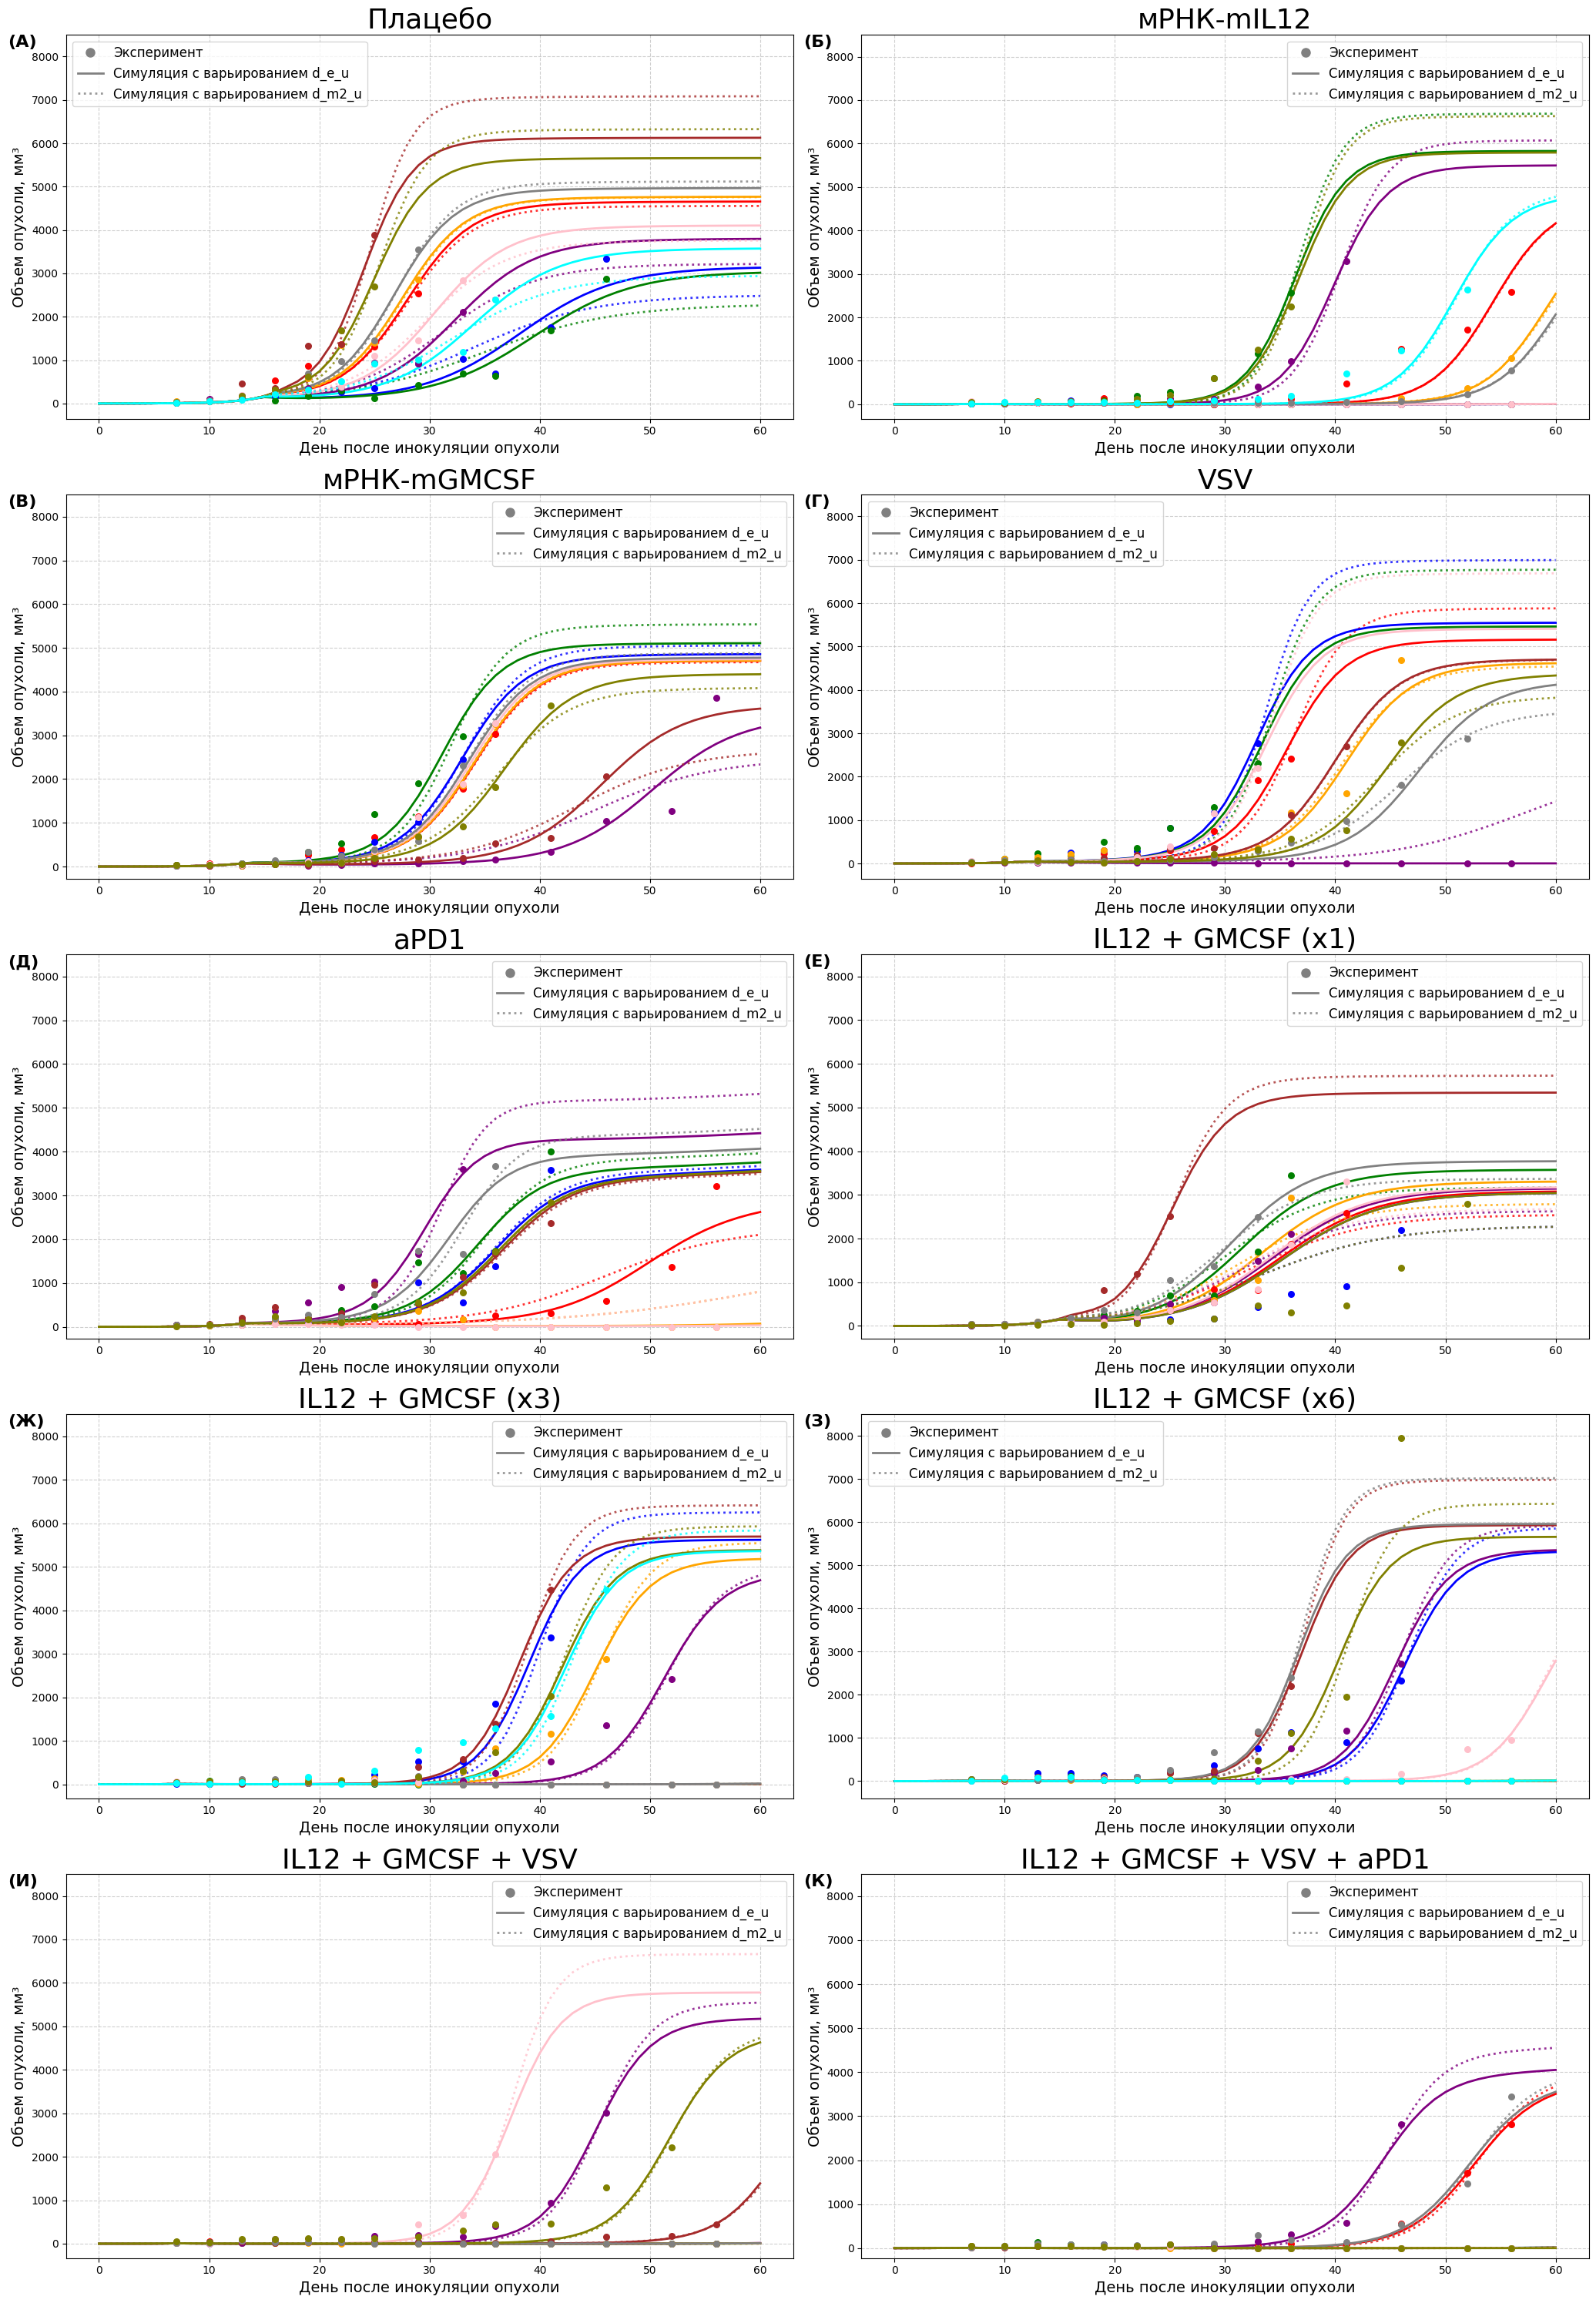

(<Figure size 2000x3000 with 10 Axes>,
 array([[<Axes: title={'center': 'Плацебо'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>,
         <Axes: title={'center': 'мРНК-mIL12'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>],
        [<Axes: title={'center': 'мРНК-mGMCSF'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>,
         <Axes: title={'center': 'VSV'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>],
        [<Axes: title={'center': 'aPD1'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>,
         <Axes: title={'center': 'IL12 + GMCSF (x1)'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>],
        [<Axes: title={'center': 'IL12 + GMCSF (x3)'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>,
         <Axes: title={'center': 'IL12 + GMCSF (x6)'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>],
       

In [16]:
plot_all_mice_together_subplots_multifile(
        excel_files = [
                       "Tables/mice_without_treatment_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_IL12_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_GMCSF_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_VSV_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_aPD1_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_IL12_GMCSF_x1_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_IL12_GMCSF_x3_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_IL12_GMCSF_x6_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_IL12_GMCSF_VSV_d_e_u_d_m2_u.xlsx",
                       "Tables/mice_IL12_GMCSF_VSV_aPD1_d_e_u_d_m2_u.xlsx"
                       ],
        sheet_names_list = [
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9", "mouse_10"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9", "mouse_10"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9", "mouse_10"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9", "mouse_10"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9"],
                            ["mouse_1", "mouse_2", "mouse_3", "mouse_4", "mouse_5", "mouse_6", "mouse_7", "mouse_8", "mouse_9"]
                            ],
        x_col_list = ["Days", "Days", "Days", "Days", "Days", "Days", "Days", "Days", "Days", "Days"],
        exp_col_list = ["Experiment", "Experiment", "Experiment", "Experiment", "Experiment", "Experiment", "Experiment", "Experiment", "Experiment", "Experiment"],
        sim_col_list = ["Simulation_d_e_u", "Simulation_d_e_u", "Simulation_d_e_u", "Simulation_d_e_u", "Simulation_d_e_u", "Simulation_d_e_u", "Simulation_d_e_u", "Simulation_d_e_u", "Simulation_d_e_u", "Simulation_d_e_u"],
        sim2_col_list = ["Simulation_d_m2_u", "Simulation_d_m2_u", "Simulation_d_m2_u", "Simulation_d_m2_u", "Simulation_d_m2_u", "Simulation_d_m2_u", "Simulation_d_m2_u", "Simulation_d_m2_u", "Simulation_d_m2_u", "Simulation_d_m2_u"],
        plot_titles = ["Плацебо", "мРНК-mIL12", "мРНК-mGMCSF", "VSV", "aPD1", "IL12 + GMCSF (x1)", "IL12 + GMCSF (x3)", "IL12 + GMCSF (x6)", "IL12 + GMCSF + VSV", "IL12 + GMCSF + VSV + aPD1"],
        #xlabel = "Days after tumor inoculation",
        #ylabel = "Tumor volume, mm³",
        xlabels = [
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли"
                   ],
        ylabels = [
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³"
                  ],
        colors_list = [
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
                       ],
        exp_type_list = [".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
        y_upper_limits=[8500, 8500, 8500, 8500, 8500, 8500, 8500, 8500, 8500, 8500],
        #legend_labels_list = [["Мышь 1", "Мышь 2", "Мышь 3", "Мышь 4", "Мышь 5", "Мышь 6", "Мышь 7", "Мышь 8", "Мышь 9", "Мышь 10"]],
        #legend_ncol = 5,
        legend_fontsize=12,
        xlabel_fontsize=14,
        ylabel_fontsize=14,
        title_fontsize=26,  # как в plot_tumor_growth_comparison
        plot_width=20,  # как в plot_tumor_growth_comparison
        plot_height=30,   # как в plot_tumor_growth_comparison
        legend_type='simple',
        n_cols=2,
        subplot_signs=['(А)', '(Б)', '(В)', '(Г)', '(Д)', '(Е)', '(Ж)', '(З)', '(И)', '(К)']
    )

## Рисунок 2.4.5.7

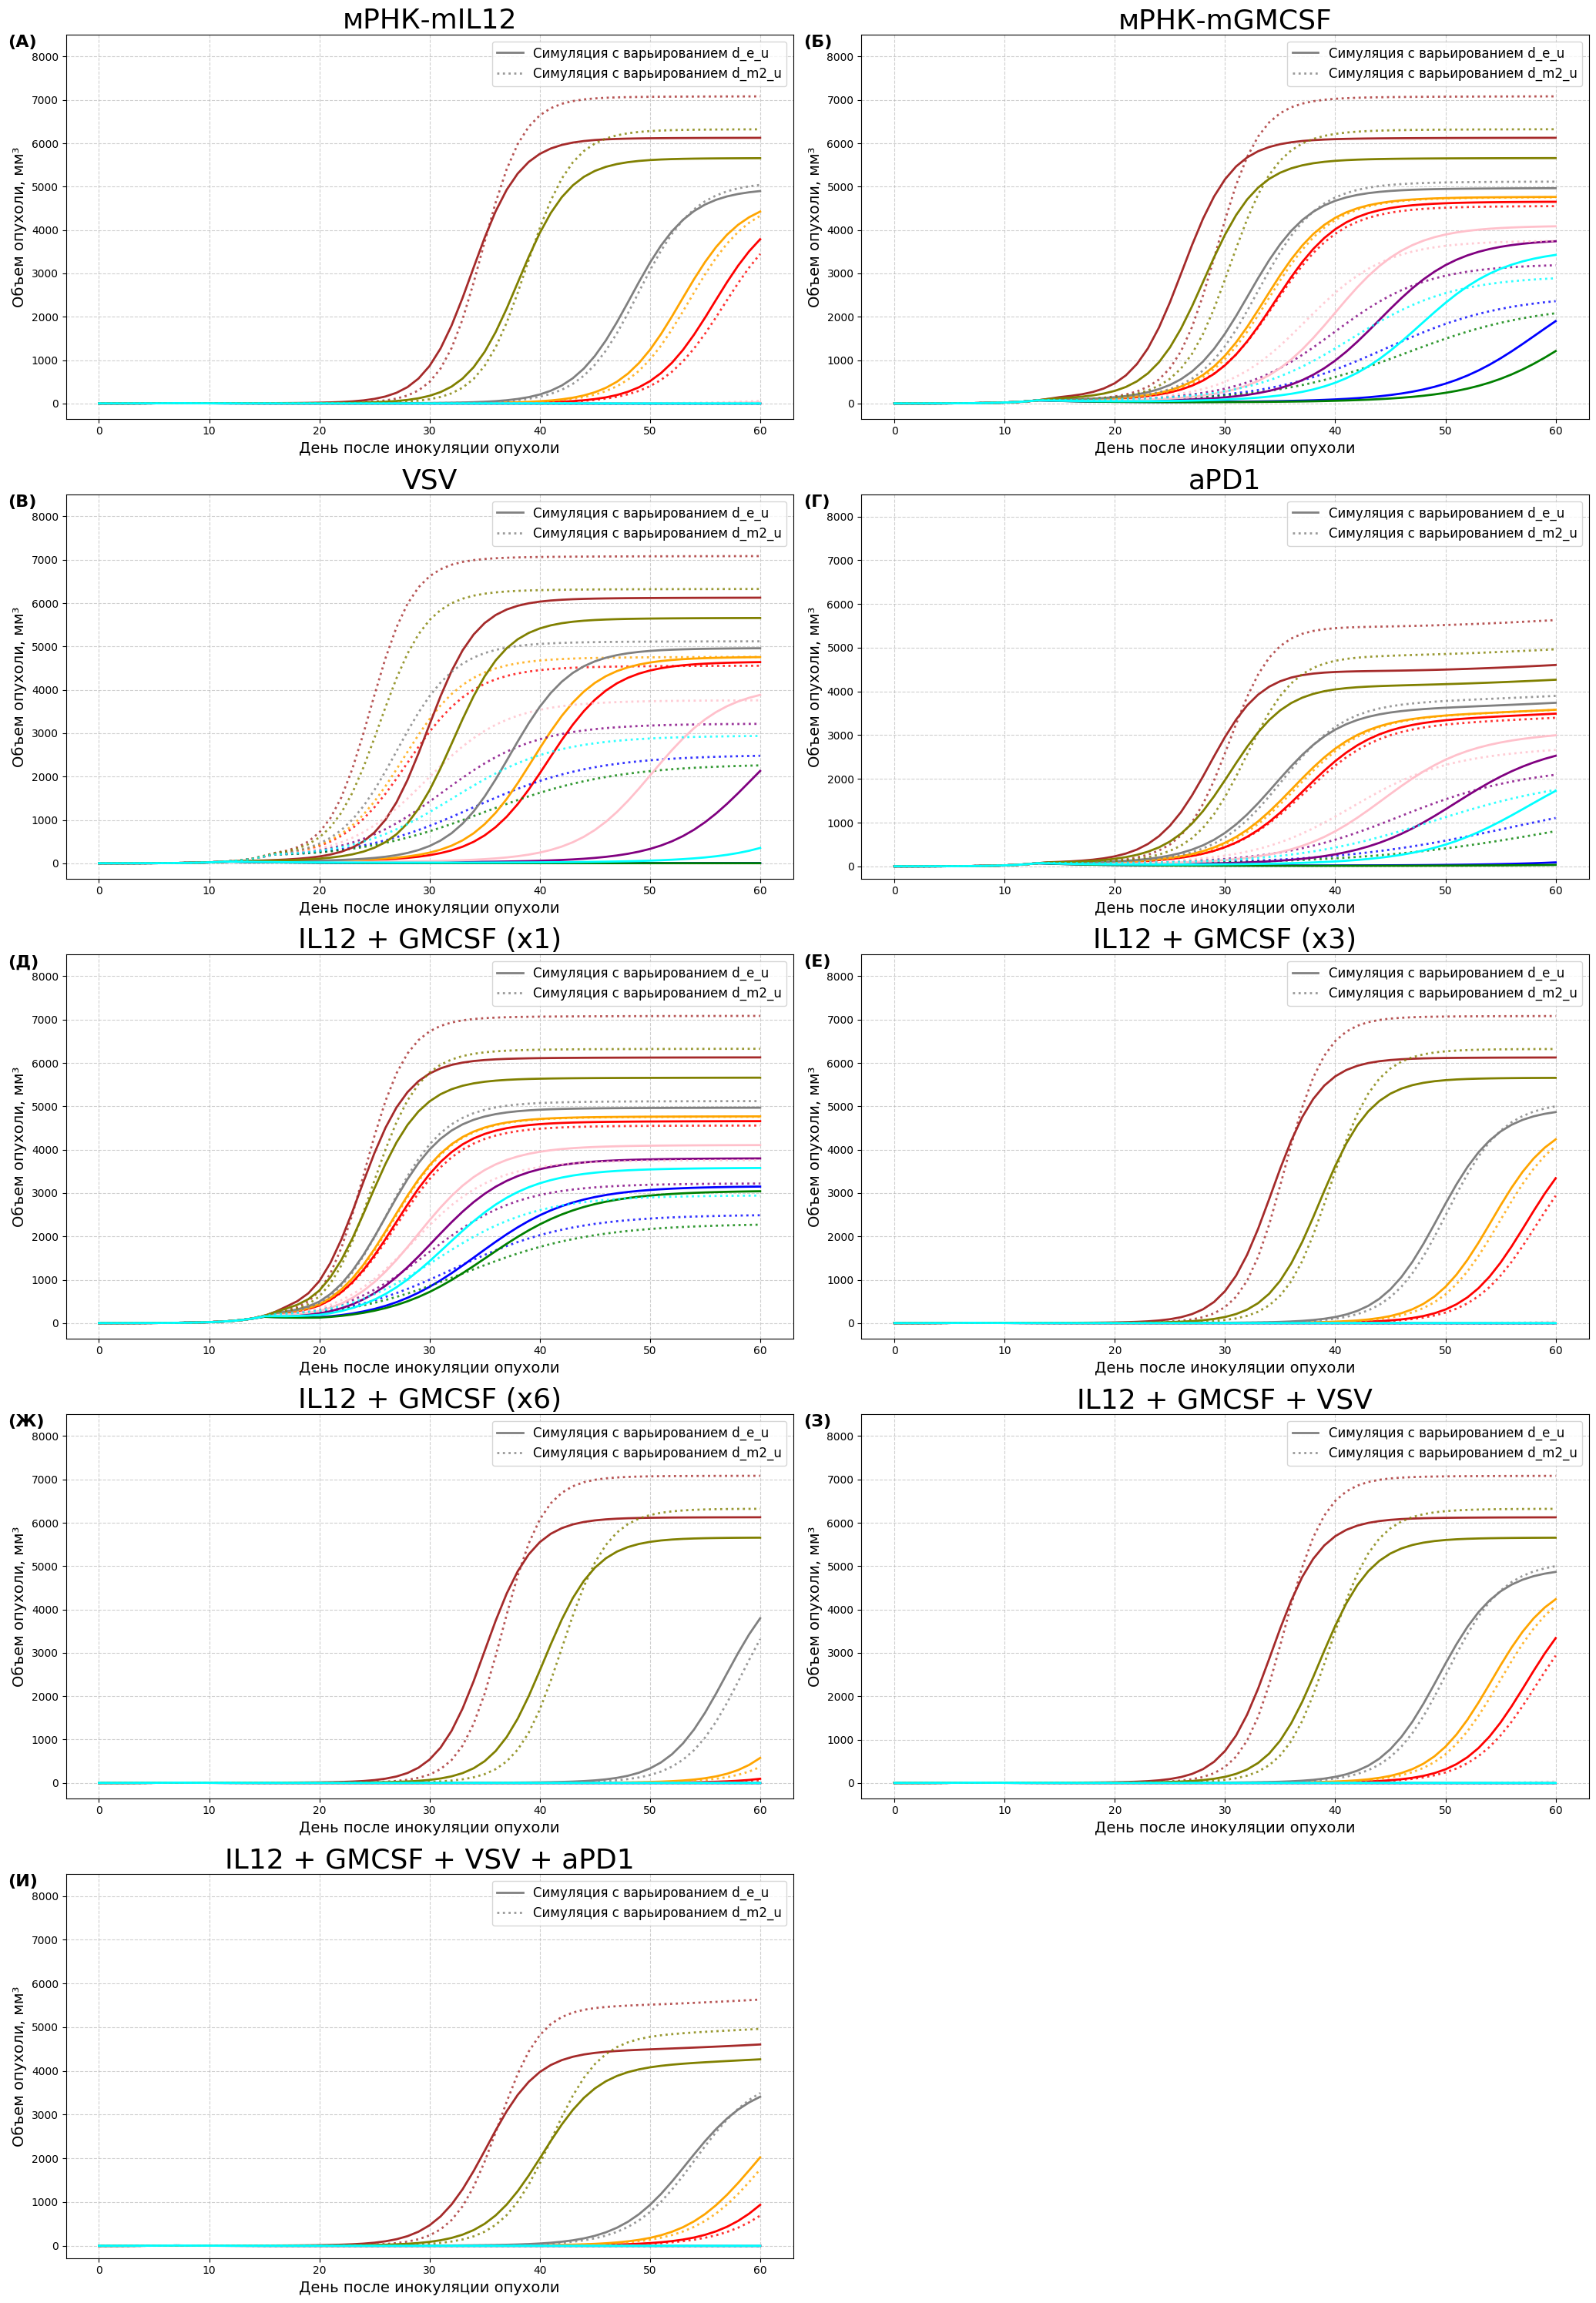

(<Figure size 2000x3000 with 10 Axes>,
 array([[<Axes: title={'center': 'мРНК-mIL12'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>,
         <Axes: title={'center': 'мРНК-mGMCSF'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>],
        [<Axes: title={'center': 'VSV'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>,
         <Axes: title={'center': 'aPD1'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>],
        [<Axes: title={'center': 'IL12 + GMCSF (x1)'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>,
         <Axes: title={'center': 'IL12 + GMCSF (x3)'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>],
        [<Axes: title={'center': 'IL12 + GMCSF (x6)'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'>,
         <Axes: title={'center': 'IL12 + GMCSF + VSV'}, xlabel='День после инокуляции опухоли', ylabel='Объем опухоли, мм³'

In [17]:
plot_all_mice_together_subplots_multifile(
        excel_files = [
                       "Tables/control_mice_treated_IL12.xlsx",
                       "Tables/control_mice_treated_GMCSF.xlsx",
                       "Tables/control_mice_treated_VSV.xlsx",
                       "Tables/control_mice_treated_aPD1.xlsx",
                       "Tables/control_mice_treated_IL12_GMCSF_x1.xlsx",
                       "Tables/control_mice_treated_IL12_GMCSF_x3.xlsx",
                       "Tables/control_mice_treated_IL12_GMCSF_x6.xlsx",
                       "Tables/control_mice_treated_IL12_GMCSF_VSV.xlsx",
                       "Tables/control_mice_treated_IL12_GMCSF_VSV_aPD1.xlsx"
                       ],
        sheet_names_list = [
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"],
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"],
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"],
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"],
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"],
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"],
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"],
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"],
                            ["mouse 1", "mouse 2", "mouse 3", "mouse 4", "mouse 5", "mouse 6", "mouse 7", "mouse 8", "mouse 9", "mouse 10"]
                            ],
        x_col_list = [
                      "Days",
                      "Days",
                      "Days",
                      "Days", 
                      "Days",
                      "Days",
                      "Days",
                      "Days",
                      "Days"
                      ],
        #exp_col_list = [
                #        "Experiment",
                #        "Experiment",
                 #       "Experiment",
                 #       "Experiment",
                  #      "Experiment",
                  #      "Experiment",
                 #       "Experiment",
                   #     "Experiment",
                 #       "Experiment"
                  #      ],
        sim_col_list = [
                        "Simulation_d_e_u",
                        "Simulation_d_e_u",
                        "Simulation_d_e_u",
                        "Simulation_d_e_u",
                        "Simulation_d_e_u",
                        "Simulation_d_e_u",
                        "Simulation_d_e_u",
                        "Simulation_d_e_u",
                        "Simulation_d_e_u"],
        sim2_col_list = [
                        "Simulation_d_m2_u",
                        "Simulation_d_m2_u",
                        "Simulation_d_m2_u",
                        "Simulation_d_m2_u",
                        "Simulation_d_m2_u",
                        "Simulation_d_m2_u",
                        "Simulation_d_m2_u",
                        "Simulation_d_m2_u",
                        "Simulation_d_m2_u"
                        ],
        plot_titles = [
                      "мРНК-mIL12",
                      "мРНК-mGMCSF",
                      "VSV",
                      "aPD1",
                      "IL12 + GMCSF (x1)",
                      "IL12 + GMCSF (x3)",
                      "IL12 + GMCSF (x6)",
                      "IL12 + GMCSF + VSV",
                      "IL12 + GMCSF + VSV + aPD1"
                      ],
        #xlabel = "Days after tumor inoculation",
        #ylabel = "Tumor volume, mm³",
        xlabels = [
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли",
                   "День после инокуляции опухоли"
                   ],
        ylabels = [
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³",
                   "Объем опухоли, мм³"
                  ],
        colors_list = [
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
                       ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
                       ],
        exp_type_list = [".", ".", ".", ".", ".", ".", ".", ".", "."],
        y_upper_limits=[8500, 8500, 8500, 8500, 8500, 8500, 8500, 8500, 8500],
        #legend_labels_list = [["Мышь 1", "Мышь 2", "Мышь 3", "Мышь 4", "Мышь 5", "Мышь 6", "Мышь 7", "Мышь 8", "Мышь 9", "Мышь 10"]],
        #legend_ncol = 5,
        legend_fontsize=12,
        xlabel_fontsize=14,
        ylabel_fontsize=14,
        title_fontsize=26,  # как в plot_tumor_growth_comparison
        plot_width=20,  # как в plot_tumor_growth_comparison
        plot_height=30,   # как в plot_tumor_growth_comparison
        legend_type='simple',
        n_cols=2,
        subplot_signs=['(А)', '(Б)', '(В)', '(Г)', '(Д)', '(Е)', '(Ж)', '(З)', '(И)']
    )

# Функция для сравнения симуляций модели из работы (Yamada, S., Shiono, S., Joo, A., & Yoshimura, A. (2003). Control mechanism of JAK/STAT signal transduction pathway. FEBS letters, 534(1-3), 190–196. https://doi.org/10.1016/s0014-5793(02)03842-5) с симуляциями этой же модели, импортированной в BioUML (Рисунок 2.4.5.9)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_simulations_comparison_two_models(
    file_paths,  # массив с путями к файлам excel
    sheet_names_list,  # массив с массивами названий листов [['-', 'Sim1', 'Sim2'], ...] или [['Sim1', 'Sim2']]
    time_column,  # название колонки со временем ИЛИ массив названий для каждого файла
    concentration_columns,  # массив с названиями колонок концентрации для каждого файла
    n_cols,  # кол-во подграфиков в одной строке
    colors,  # список цветов для отображения данных [color_sim1, color_sim2] или [color_sim1, color_sim2] для каждого файла
    y_limits,  # массив с [min_y, max_y] для каждого файла
    x_limits,  # массив с [min_x, max_x] для каждого файла
    y_axis_type,  # массив с типом оси y для каждого файла ('log' или 'number')
    x_axis_type,  # массив с типом оси x для каждомц файла ('log' или 'number')
    subplot_x_titles,  # массив подписей осей x
    subplot_y_titles,  # массив подписей осей y
    subplot_titles=None,  # ОПЦИОНАЛЬНЫЙ массив названий подграфиков
    lang='eng',  # язык подписей легенды ('eng' или 'rus')
    signs=None,  # опциональный массив подписей подграфиков (А, Б, В и т.д.)
    line_styles=None,  # стили линий для симуляций ['-', '--'] или массив для каждого файла
    model_names=None,  # названия моделей ['Model 1', 'Model 2'] или локализованные
    replace_negatives_with_zero=True,  # заменять ли отрицательные значения на ноль
    markers=None,  # маркеры для точек (если нужны) ['o', 's', '^'] или None
    line_widths=None,  # толщины линий [2, 1.5] или None
    alpha_values=None,  # прозрачность линий [1, 0.8] или None
    convert_to_numeric=True  # Новый параметр: преобразовывать ли данные в числовой формат
):
    """
    Рисует графики сравнения двух моделей симуляции (экспериментальные данные опциональны)
    
    Параметры:
    ----------
    sheet_names_list : list of lists
        Список списков названий листов. Каждый внутренний список может иметь:
        - 2 элемента: [sim1_sheet, sim2_sheet] - только две симуляции
        - 3 элемента: [exp_sheet, sim1_sheet, sim2_sheet] - эксперимент + две симуляции
        - 3 элемента с '-' на первом месте: ['-', sim1_sheet, sim2_sheet] - только симуляции
    
    subplot_titles : list of str, optional
        Опциональный массив названий подграфиков. Если не указан (None), графики будут без заголовков.
    
    convert_to_numeric : bool, optional
        Если True, пытается преобразовать данные в числовой формат (полезно для данных из формул Excel).
        По умолчанию True.
    """
    
    # Словари для локализации
    legend_labels = {
        'eng': {
            'experiment': 'Experiment', 
            'simulation1': 'Simulation 1',
            'simulation2': 'Simulation 2'
        },
        'rus': {
            'experiment': 'Эксперимент', 
            'simulation1': 'Симуляция 1',
            'simulation2': 'Симуляция 2'
        }
    }
    
    # Используем переданные названия моделей или стандартные
    if model_names is not None:
        if lang == 'eng':
            legend_labels[lang]['simulation1'] = model_names[0]
            legend_labels[lang]['simulation2'] = model_names[1]
        elif lang == 'rus':
            legend_labels[lang]['simulation1'] = model_names[0]
            legend_labels[lang]['simulation2'] = model_names[1]
    
    # Настройки по умолчанию для стилей линий
    if line_styles is None:
        line_styles = ['-', '--']  # сплошная для первой модели, пунктир для второй
    
    # Настройки по умолчанию для маркеров
    if markers is None:
        markers = [None, None]  # без маркеров по умолчанию
    
    # Настройки по умолчанию для толщины линий
    if line_widths is None:
        line_widths = [2, 2]  # одинаковая толщина по умолчанию
    
    # Настройки по умолчанию для прозрачности
    if alpha_values is None:
        alpha_values = [1, 1]  # непрозрачные по умолчанию
    
    # Определяем количество графиков
    # Если передано несколько файлов, количество графиков = количеству файлов
    # Если передан один файл, но несколько наборов листов, количество графиков = количеству наборов листов
    if len(file_paths) > 1:
        # Несколько файлов - каждый файл = отдельный график
        n_plots = len(file_paths)
        # Проверяем согласованность параметров
        if len(sheet_names_list) != n_plots:
            print(f"Предупреждение: количество наборов листов ({len(sheet_names_list)}) не соответствует количеству файлов ({n_plots})")
            # Если sheet_names_list содержит один список, используем его для всех файлов
            if len(sheet_names_list) == 1:
                sheet_names_list = [sheet_names_list[0]] * n_plots
                print(f"  Использую один набор листов для всех файлов: {sheet_names_list[0]}")
    else:
        # Один файл, но может быть несколько графиков
        n_plots = len(sheet_names_list)
    
    # Преобразуем параметры в массивы нужной длины
    def ensure_list_length(param, target_length, param_name, default_value=None):
        """Обеспечивает, чтобы параметр имел нужную длину"""
        if param is None:
            # Если параметр None, возвращаем пустой список или список с None
            if default_value is not None:
                if isinstance(default_value, list):
                    return default_value * target_length
                else:
                    return [default_value] * target_length
            else:
                # Возвращаем список None нужной длины
                return [None] * target_length
        elif isinstance(param, (str, list)) and not isinstance(param[0], list) if isinstance(param, list) else True:
            # Если параметр - не список списков, повторяем его
            if isinstance(param, str):
                return [param] * target_length
            elif isinstance(param, list):
                if len(param) == target_length:
                    return param
                elif len(param) == 1:
                    return param * target_length
                else:
                    print(f"Предупреждение: параметр {param_name} имеет длину {len(param)}, но требуется {target_length}")
                    return param[:target_length] if len(param) > target_length else param + [param[-1]] * (target_length - len(param))
        return param
    
    # Обеспечиваем правильную длину всех параметров
    time_column = ensure_list_length(time_column, n_plots, 'time_column')
    concentration_columns = ensure_list_length(concentration_columns, n_plots, 'concentration_columns')
    colors = ensure_list_length(colors, n_plots, 'colors')
    y_limits = ensure_list_length(y_limits, n_plots, 'y_limits')
    x_limits = ensure_list_length(x_limits, n_plots, 'x_limits')
    y_axis_type = ensure_list_length(y_axis_type, n_plots, 'y_axis_type')
    x_axis_type = ensure_list_length(x_axis_type, n_plots, 'x_axis_type')
    subplot_x_titles = ensure_list_length(subplot_x_titles, n_plots, 'subplot_x_titles')
    subplot_y_titles = ensure_list_length(subplot_y_titles, n_plots, 'subplot_y_titles')
    
    # Обработка опционального параметра subplot_titles
    # Если не указан - просто создаем список None
    subplot_titles = ensure_list_length(subplot_titles, n_plots, 'subplot_titles', default_value=None)
    
    if signs is not None:
        signs = ensure_list_length(signs, n_plots, 'signs')
    
    print(f"Количество графиков: {n_plots}")
    print(f"Количество файлов: {len(file_paths)}")
    print(f"Параметры согласованы для {n_plots} графиков")
    
    n_rows = (n_plots + n_cols - 1) // n_cols  # Вычисляем количество строк
    
    # Создаем фигуру с подграфиками
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    
    # Обработка различных случаев размещения подграфиков
    if n_plots == 1 and n_cols == 1:
        # Один подграфик - axes является одиночным объектом Axes
        axes = np.array([[axes]])
    elif n_rows == 1:
        # Одна строка подграфиков
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        # Один столбец подграфиков
        axes = axes.reshape(-1, 1)
    else:
        # Множество строк и столбцов
        axes = axes.reshape(n_rows, n_cols)
    
    # Вспомогательная функция для преобразования данных
    def convert_data(dataframe, column_name):
        """Преобразует данные в числовой формат и обрабатывает ошибки"""
        if column_name not in dataframe.columns:
            print(f"Предупреждение: колонка '{column_name}' не найдена в данных")
            print(f"Доступные колонки: {list(dataframe.columns)}")
            return pd.Series([], dtype=float)
        
        column_data = dataframe[column_name]
        
        # Если флаг convert_to_numeric установлен, пытаемся преобразовать
        if convert_to_numeric:
            try:
                # Пытаемся преобразовать в числовой формат
                converted = pd.to_numeric(column_data, errors='coerce')
                
                # Проверяем, сколько значений успешно преобразовано
                nan_count = converted.isna().sum()
                if nan_count > 0:
                    print(f"Предупреждение: {nan_count} значений не удалось преобразовать в число в колонке '{column_name}'")
                    # Показываем примеры проблемных значений
                    problematic = column_data[converted.isna()].head()
                    if len(problematic) > 0:
                        print(f"Примеры проблемных значений: {list(problematic)}")
                
                return converted
            except Exception as e:
                print(f"Ошибка при преобразовании колонки '{column_name}': {e}")
                return column_data
        else:
            return column_data
    
    # Проходим по всем графикам
    for i in range(n_plots):
        # Определяем, какой файл использовать для этого графика
        if len(file_paths) > 1:
            # Несколько файлов - каждый график использует свой файл
            file_idx = i % len(file_paths)  # Циклически используем файлы
            file_path = file_paths[file_idx]
        else:
            # Один файл - используем его для всех графиков
            file_path = file_paths[0]
        
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col]
        
        # Получаем параметры для текущего графика
        sheet_names = sheet_names_list[i] if i < len(sheet_names_list) else sheet_names_list[-1]
        time_col = time_column[i] if i < len(time_column) else time_column[-1]
        conc_col = concentration_columns[i] if i < len(concentration_columns) else concentration_columns[-1]
        color_set = colors[i] if i < len(colors) else colors[-1]
        y_lim = y_limits[i] if i < len(y_limits) else y_limits[-1]
        x_lim = x_limits[i] if i < len(x_limits) else x_limits[-1]
        y_axis = y_axis_type[i] if i < len(y_axis_type) else y_axis_type[-1]
        x_axis = x_axis_type[i] if i < len(x_axis_type) else x_axis_type[-1]
        subplot_title = subplot_titles[i] if i < len(subplot_titles) else None
        x_title = subplot_x_titles[i] if i < len(subplot_x_titles) else subplot_x_titles[-1]
        y_title = subplot_y_titles[i] if i < len(subplot_y_titles) else subplot_y_titles[-1]
        
        # Добавляем подпись подграфика (если предоставлена)
        if signs is not None and i < len(signs):
            ax.text(-0.1, 1.05, signs[i], transform=ax.transAxes, 
                   fontsize=16, fontweight='bold', va='top', ha='right')
        
        try:
            print(f"\n{'='*60}")
            print(f"График {i+1}/{n_plots}")
            if subplot_title:
                print(f"Заголовок: {subplot_title}")
            print(f"Файл: {os.path.basename(file_path)}")
            print(f"Набор листов: {sheet_names}")
            print(f"Колонка времени: '{time_col}'")
            print(f"Колонка концентрации: '{conc_col}'")
            print(f"{'='*60}")
            
            # Определяем структуру данных
            has_experiment = False
            
            if len(sheet_names) == 2:
                # Только две симуляции
                sim1_sheet = sheet_names[0]
                sim2_sheet = sheet_names[1]
                color_sim1 = color_set[0] if len(color_set) >= 2 else color_set[0]
                color_sim2 = color_set[1] if len(color_set) >= 2 else color_set[0]
            elif len(sheet_names) == 3:
                # Эксперимент + две симуляции или только симуляции
                if sheet_names[0] == '-':
                    # Только симуляции (первый элемент - прочерк)
                    sim1_sheet = sheet_names[1]
                    sim2_sheet = sheet_names[2]
                    color_sim1 = color_set[0] if len(color_set) >= 2 else color_set[0]
                    color_sim2 = color_set[1] if len(color_set) >= 2 else color_set[0]
                else:
                    # Эксперимент + две симуляции
                    has_experiment = True
                    exp_sheet = sheet_names[0]
                    sim1_sheet = sheet_names[1]
                    sim2_sheet = sheet_names[2]
                    color_exp = color_set[0] if len(color_set) >= 3 else color_set[0]
                    color_sim1 = color_set[1] if len(color_set) >= 3 else color_set[0]
                    color_sim2 = color_set[2] if len(color_set) >= 3 else color_set[0]
            
            # Читаем данные из файла
            print(f"Чтение данных...")
            sim_data1 = pd.read_excel(file_path, sheet_name=sim1_sheet)
            sim_data2 = pd.read_excel(file_path, sheet_name=sim2_sheet)
            
            if has_experiment:
                exp_data = pd.read_excel(file_path, sheet_name=exp_sheet)
            
            # Преобразуем данные в числовой формат
            print(f"Преобразование данных в числовой формат...")
            
            # Время для всех наборов данных
            time_data1 = convert_data(sim_data1, time_col)
            time_data2 = convert_data(sim_data2, time_col)
            
            if has_experiment:
                time_data_exp = convert_data(exp_data, time_col)
            
            # Концентрации
            sim1_concentration = convert_data(sim_data1, conc_col)
            sim2_concentration = convert_data(sim_data2, conc_col)
            
            if has_experiment:
                exp_concentration = convert_data(exp_data, conc_col)
            
            # Проверяем, что данные успешно преобразованы
            print(f"  Данные успешно преобразованы:")
            print(f"    {sim1_sheet}: {len(time_data1)} точек времени, {len(sim1_concentration)} точек концентрации")
            print(f"    {sim2_sheet}: {len(time_data2)} точек времени, {len(sim2_concentration)} точек концентрации")
            if has_experiment:
                print(f"    {exp_sheet}: {len(time_data_exp)} точек времени, {len(exp_concentration)} точек концентрации")
            
            # НОВАЯ ФУНКЦИОНАЛЬНОСТЬ: Обработка отрицательных значений
            def replace_negatives(series_data):
                """Заменяет отрицательные значения в Series на 0"""
                if replace_negatives_with_zero and series_data.dtype in [np.float64, np.int64, np.float32, np.int32]:
                    # Создаем копию и заменяем отрицательные значения на 0
                    corrected_data = series_data.copy()
                    negative_mask = corrected_data < 0
                    negative_count = negative_mask.sum()
                    
                    if negative_count > 0:
                        print(f"  Заменено {negative_count} отрицательных значений на 0")
                        corrected_data[negative_mask] = 0
                    
                    return corrected_data
                else:
                    return series_data
            
            # Применяем обработку отрицательных значений
            print(f"Обработка отрицательных значений...")
            sim1_concentration = replace_negatives(sim1_concentration)
            sim2_concentration = replace_negatives(sim2_concentration)
            
            if has_experiment:
                exp_concentration = replace_negatives(exp_concentration)
            
            # Строим графики с обработанными данными
            print(f"Построение графиков...")
            
            # Экспериментальные данные (если есть) - точки
            if has_experiment:
                if markers[0] is not None:
                    ax.scatter(time_data_exp, exp_concentration, 
                              color=color_exp, marker=markers[0], s=30, 
                              label=legend_labels[lang]['experiment'], alpha=0.7, zorder=3)
                else:
                    ax.plot(time_data_exp, exp_concentration, 
                           color=color_exp, linewidth=1, linestyle='-',
                           label=legend_labels[lang]['experiment'], alpha=0.7, zorder=3)
            
            # Данные второй симуляции - линия
            ax.plot(time_data2, sim2_concentration, 
                   color=color_sim2, linewidth=line_widths[1], 
                   linestyle=line_styles[1], alpha=alpha_values[1],
                   label=legend_labels[lang]['simulation2'], zorder=1)
            
            # Данные первой симуляции - линия
            ax.plot(time_data1, sim1_concentration, 
                   color=color_sim1, linewidth=line_widths[0], 
                   linestyle=line_styles[0], alpha=alpha_values[0],
                   label=legend_labels[lang]['simulation1'], zorder=2)
            
            print(f"График построен успешно!")
            
            # Особый случай: если все значения равны 0 и используется логарифмическая шкала
            if y_axis == 'log' and y_lim[0] <= 0:
                # Для логарифмической шкалы нижняя граница должна быть положительной
                all_values = []
                if has_experiment:
                    all_values.append(exp_concentration)
                all_values.extend([sim1_concentration, sim2_concentration])
                
                all_values_combined = pd.concat(all_values) if all_values else pd.Series([])
                positive_values = all_values_combined[all_values_combined > 0]
                
                if len(positive_values) > 0:
                    min_positive = positive_values.min()
                    adjusted_y_min = min_positive * 0.1
                else:
                    adjusted_y_min = 0.001
                
                if y_lim[0] <= 0:
                    y_lim = (adjusted_y_min, y_lim[1])
                    print(f"Для логарифмической шкалы Y нижняя граница скорректирована с {y_lim[0]} до {adjusted_y_min}")
            
            # Настройки осей для текущего файла
            if y_axis == 'log':
                ax.set_yscale('log')
            if x_axis == 'log':
                ax.set_xscale('log')
            
            ax.set_ylim(y_lim)
            ax.set_xlim(x_lim)
            
            # Заголовок и подписи осей
            # Устанавливаем заголовок только если он не None
            if subplot_title:
                ax.set_title(subplot_title, fontsize=12)
            
            ax.set_xlabel(x_title, fontsize=10)
            ax.set_ylabel(y_title, fontsize=10)
            ax.legend(fontsize=9)
            ax.grid(True, alpha=0.3)
            
        except Exception as e:
            print(f"Ошибка при обработке графика {i+1}: {e}")
            import traceback
            traceback.print_exc()
            ax.text(0.5, 0.5, f'Error in plot {i+1}\n{str(e)[:50]}...', 
                   ha='center', va='center', transform=ax.transAxes)
            if subplot_title:
                ax.set_title(subplot_title)
            ax.set_xlabel(x_title)
            ax.set_ylabel(y_title)
    
    # Скрываем пустые подграфики
    for i in range(n_plots, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        if n_rows == 1 and n_cols == 1:
            pass
        else:
            axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Альтернативный вариант для отладки - смотрим, какие колонки на самом деле есть в файле
def inspect_excel_file(file_path):
    """Функция для проверки структуры Excel файла"""
    print(f"\n{'='*60}")
    print(f"Инспекция файла: {file_path}")
    print(f"{'='*60}")
    
    xl = pd.ExcelFile(file_path)
    print(f"Листы в файле: {xl.sheet_names}")
    
    for sheet_name in xl.sheet_names:
        print(f"\nЛист: {sheet_name}")
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        print(f"  Размер: {df.shape[0]} строк, {df.shape[1]} колонок")
        print(f"  Колонки: {list(df.columns)}")
        print(f"  Типы данных:")
        for col in df.columns:
            print(f"    {col}: {df[col].dtype}")
            if len(df) > 0:
                print(f"      Пример: {df[col].iloc[0]}")
        print(f"  Первые 3 строки:")
        print(df.head(3))

## Рисунок 2.4.5.9

Количество графиков: 7
Количество файлов: 7
Параметры согласованы для 7 графиков

График 1/7
Файл: Simulation points from JAK_STAT article.xlsx
Набор листов: ['-', '2A', '2A_my']
Колонка времени: 'time, h'
Колонка концентрации: 'IFNRJ2*, nM'
Чтение данных...
Преобразование данных в числовой формат...
  Данные успешно преобразованы:
    2A: 150 точек времени, 150 точек концентрации
    2A_my: 28801 точек времени, 28801 точек концентрации
Обработка отрицательных значений...
Построение графиков...
График построен успешно!

График 2/7
Файл: Simulation points from JAK_STAT article.xlsx
Набор листов: ['-', '2C', '2C_my']
Колонка времени: 'time, h'
Колонка концентрации: 'STAT1c, nM'
Чтение данных...
Преобразование данных в числовой формат...
  Данные успешно преобразованы:
    2C: 149 точек времени, 149 точек концентрации
    2C_my: 28801 точек времени, 28801 точек концентрации
Обработка отрицательных значений...
Построение графиков...
График построен успешно!

График 3/7
Файл: Simulation poi

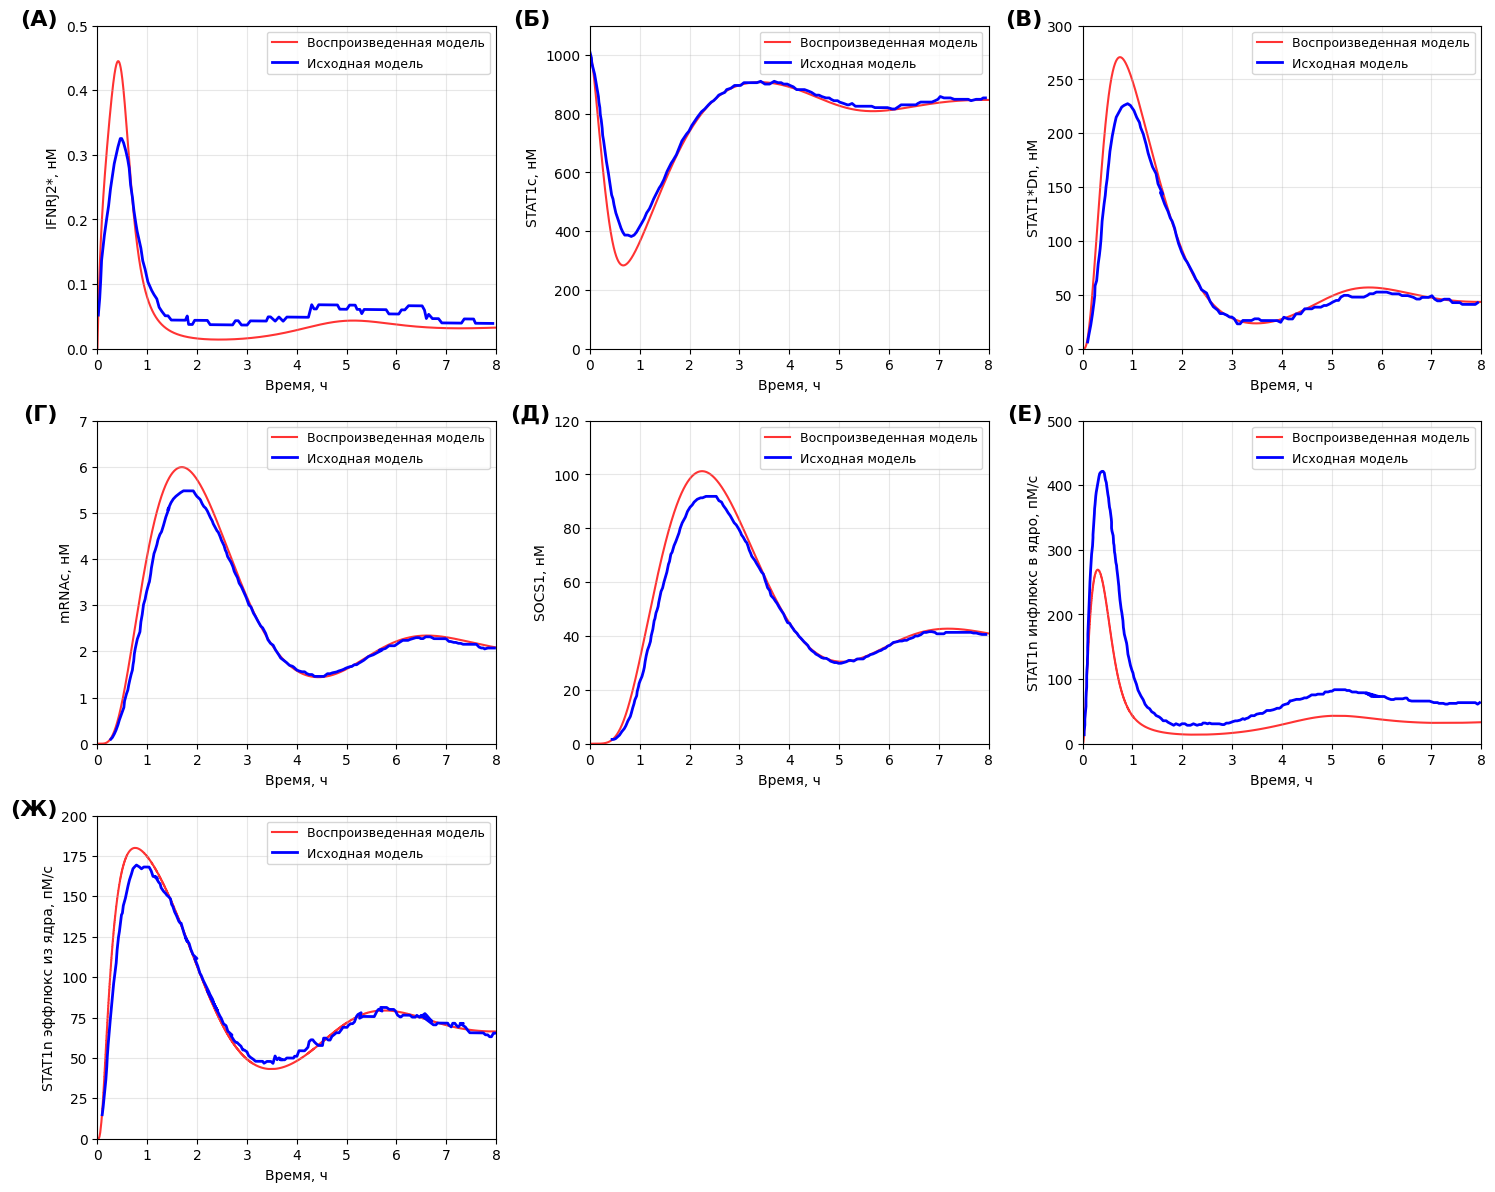

In [20]:
# Вызов модифицированной функции для сравнения двух моделей без экспериментальных данных
plot_simulations_comparison_two_models(
    file_paths=['Tables/Simulation points from JAK_STAT article.xlsx',
                'Tables/Simulation points from JAK_STAT article.xlsx',
                'Tables/Simulation points from JAK_STAT article.xlsx',
                'Tables/Simulation points from JAK_STAT article.xlsx',
                'Tables/Simulation points from JAK_STAT article.xlsx',
                'Tables/Simulation points from JAK_STAT article.xlsx',
                'Tables/Simulation points from JAK_STAT article.xlsx'],  # путь к файлу
    sheet_names_list=[['-', '2A', '2A_my'],
                      ['-', '2C', '2C_my'],
                      ['-', '2E', '2E_my'],
                      ['-', '2G', '2G_my'],
                      ['-', '2I', '2I_my'],
                      ['-', '2K', '2K_my'],
                      ['-', '2M', '2M_my']],  # прочерк вместо эксперимента, затем две симуляции
    time_column='time, h',  # колонка со временем
    concentration_columns=['IFNRJ2*, nM',
                           'STAT1c, nM',
                           'STAT1*Dn, nM',
                           'mRNAc, nM',
                           'SOCS1, nM',
                           'STAT influx, pM/s',
                           'STAT efflux, pM/s'],  # колонка с концентрацией
    n_cols=3,  # 1 график в строке
    colors=[['blue', 'red']],  # цвета для двух моделей
    y_limits=[[0, 0.5],
              [0, 1100],
              [0, 300],
              [0, 7],
              [0, 120],
              [0, 500],
              [0, 200]],  # пределы по оси Y
    x_limits=[[0, 8],
              [0, 8],
              [0, 8],
              [0, 8],
              [0, 8],
              [0, 8],
              [0, 8]],  # пределы по оси X
    y_axis_type=['number',
                 'number',
                 'number',
                 'number',
                 'number',
                 'number',
                 'number'],  # линейная шкала Y
    x_axis_type=['number',
                 'number',
                 'number',
                 'number',
                 'number',
                 'number',
                 'number'],  # линейная шкала X
    #subplot_titles=['Сравнение двух моделей',
                    #'Сравнение двух моделей_2'],  # заголовок графика
    subplot_x_titles=[
                      'Время, ч',
                      'Время, ч',
                      'Время, ч',
                      'Время, ч',
                      'Время, ч',
                      'Время, ч',
                      'Время, ч',
                      ],  # подпись оси X
    subplot_y_titles=['IFNRJ2*, нМ',
                      'STAT1c, нМ',
                      'STAT1*Dn, нМ',
                      'mRNAc, нМ',
                      'SOCS1, нМ',
                      'STAT1n инфлюкс в ядро, пМ/с',
                      'STAT1n эффлюкс из ядра, пМ/с'],  # подпись оси Y
    lang='rus',  # язык подписей
    signs=['(А)', '(Б)', '(В)', '(Г)', '(Д)', '(Е)', '(Ж)'],  # метка графика
    line_styles=['-', '-'],  # стили линий
    model_names=['Исходная модель', 'Воспроизведенная модель'],  # названия моделей
    replace_negatives_with_zero=True,  # заменять отрицательные значения на 0
    markers=[None, None],  # без маркеров
    line_widths=[2, 1.5],  # толщины линий
    alpha_values=[1, 0.8],  # прозрачность
    convert_to_numeric=True  # Преобразовывать данные в числовой формат
)
